# Tabnet 2 - Modelo luego del primer año

In [1]:
!pip install pytorch-tabnet
!pip install tabnet
!pip install wget

import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from pytorch_tabnet.tab_model import TabNetClassifier

import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
np.random.seed(0)


import os
import wget
from pathlib import Path

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/Profesor/data_pre.txt",header=0, sep=",",na_values='\t', encoding='latin-1')
#df['GRAD'] = df.GRAD.map(dict(Y=1, N=0))
target = 'GRAD'
if "Set" not in df.columns:
    df["Set"] = np.random.choice(["train", "valid", "test"], p =[.8, .1, .1], size=(df.shape[0],))

train_indices = df[df.Set=="train"].index
valid_indices = df[df.Set=="valid"].index
test_indices = df[df.Set=="test"].index

In [4]:
df.shape

(18413, 18)

In [5]:
df

,GRAD,Year,Faculty,Major,Apt_Verbal,Aprov_Matem,Apt_Matem,Aprov_Espanol,Aprov_Ingles,INGRESO_FAMILIAR,EDUC_PADRE,EDUC_MADRE,Gender,School_Type,GPA_1ER_ANO,Rel_Stud_GPA,Rel_School_GPA,Set
0,N,2000,Facultad de Artes y Ciencias - Artes,EFEN,530,444,447,453,389,I1_L12.5,HS,HS,M,Private,2.11,0.996736,0.791875,train
1,Y,2000,Facultad de Artes y Ciencias - Artes,CIPO,571,640,541,481,398,I1_L12.5,LHS,LHS,M,Public,2.07,1.073917,0.781648,train
2,N,2000,Facultad de Artes y Ciencias - Ciencias,CIFI,544,630,594,500,369,I1_L12.5,LHS,HS,F,Public,2.51,0.880744,0.692077,train
3,Y,2000,Facultad de Administración de Empresas,ADOF,541,547,479,584,544,I2_B12.5A20,LHS,Assoc or Less,F,Public,3.60,1.017136,0.688084,train
4,N,2000,Facultad de Ciencias Agrícolas,AGGE,686,610,757,340,630,I1_L12.5,Grad,Grad,M,Private,0.83,1.037716,0.802692,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18408,N,1999,Facultad de Artes y Ciencias - Ciencias,CCOM,612,601,618,572,526,I4_B30A50,HS,Grad,M,Private,1.75,0.739071,0.866940,train
18409,N,1999,Facultad de Artes y Ciencias - Ciencias,QUIM,550,584,565,500,452,I3_B20A30,Bachillerato,LHS,F,Public,1.69,1.050959,0.836621,train
18410,Y,1999,Facultad de Ciencias Agrícolas,AGGE,533,646,660,536,462,I2_B12.5A20,LHS,LHS,F,Public,2.56,1.087183,0.739831,train
18411,N,1999,Facultad de Artes y Ciencias - Ciencias,EDMA,533,575,649,410,499,I1_L12.5,LHS,Assoc or Less,M,Public,0.00,1.072113,0.752667,train


In [3]:
nunique = df.nunique()
types = df.dtypes

categorical_columns = []
categorical_dims =  {}
for col in df.columns:
    if types[col] == 'object' or nunique[col] < 200:  #The nunique() function is used to count distinct observations over requested axis.
        print(col, df[col].nunique())
        l_enc = LabelEncoder()
        df[col] = df[col].fillna("VV_likely") 
        df[col] = l_enc.fit_transform(df[col].values)
        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)
    else:
        df.fillna(df.loc[train_indices, col].mean(), inplace=True)

GRAD 2
Year 12
Faculty 5
Major 54
INGRESO_FAMILIAR 5
EDUC_PADRE 6
EDUC_MADRE 6
Gender 2
School_Type 3
Set 3


In [7]:
df

,GRAD,Year,Faculty,Major,Apt_Verbal,Aprov_Matem,Apt_Matem,Aprov_Espanol,Aprov_Ingles,INGRESO_FAMILIAR,EDUC_PADRE,EDUC_MADRE,Gender,School_Type,GPA_1ER_ANO,Rel_Stud_GPA,Rel_School_GPA,Set
0,0,1,1,19,530,444,447,453,389,0,3,3,1,1,2.11,0.996736,0.791875,1
1,1,1,1,11,571,640,541,481,398,0,4,4,1,2,2.07,1.073917,0.781648,1
2,0,1,2,10,544,630,594,500,369,0,4,3,0,2,2.51,0.880744,0.692077,1
3,1,1,0,0,541,547,479,584,544,1,4,0,0,2,3.60,1.017136,0.688084,1
4,0,1,3,1,686,610,757,340,630,0,2,2,1,1,0.83,1.037716,0.802692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18408,0,0,2,9,612,601,618,572,526,3,3,2,1,1,1.75,0.739071,0.866940,1
18409,0,0,2,49,550,584,565,500,452,2,1,4,0,2,1.69,1.050959,0.836621,1
18410,1,0,3,1,533,646,660,536,462,1,4,4,0,2,2.56,1.087183,0.739831,1
18411,0,0,2,17,533,575,649,410,499,0,4,0,1,2,0.00,1.072113,0.752667,1


In [4]:
unused_feat = ['Set']

features = [ col for col in df.columns if col not in unused_feat+[target]] #Select features without target and Set.

cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns] #Select features without target and Set in "features" is categorical.

cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns] #Select features without target and Set in "features" is categorical with count distinct observations.

In [5]:
df[features] = df[features].apply(lambda x: 1/(1+ np.exp(-x)), axis=0)  #Softmax Normalization

X_train = df[features].values[train_indices]
y_train = df[target].values[train_indices]

X_valid = df[features].values[valid_indices]
y_valid = df[target].values[valid_indices]

X_test = df[features].values[test_indices]
y_test = df[target].values[test_indices]

# Tuning 

In [8]:
#hyperparameters

#optimizer_params_list=dict(lr=[2e-2,1])

max_epochs_list = [20,21,22,23,24,25,26,27,28,29,30]
batch_size_list = [1024, 1025, 1026,1027,1028,1029,1030]
virtual_batch_size_list = [128, 129, 130, 131, 132,133, 134]
patience_list = [20,21,22,23,24,25,26]

In [9]:
def tabnet_grid_search(max_epochs,batch_size,virtual_batch_size,patience):
  model = TabNetClassifier(cat_idxs=cat_idxs,
                       cat_dims=cat_dims,
                       cat_emb_dim=1
                      )
  model.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['auc'],
    max_epochs=max_epochs , patience=patience,
    batch_size=batch_size, virtual_batch_size=virtual_batch_size,
    num_workers=0,
    weights=1,
    drop_last=False
    )
  Report = classification_report(y_test,model.predict(X_test),labels=[0,1], output_dict=True)
  return ([max_epochs,batch_size,virtual_batch_size,patience,Report['0']['recall']])

In [10]:
#Loop
result_list = []

for max_epochs in max_epochs_list:
  for batch_size in batch_size_list:
    for virtual_batch_size in virtual_batch_size_list:
      for patience in patience_list:
        result_list.append(tabnet_grid_search(max_epochs,batch_size,virtual_batch_size,patience))

Result_tabnet = pd.DataFrame(result_list, columns=['max_epochs','batch_size','virtual_batch_size','patience', 'Recall'])

Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:16s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:19s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:23s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:26s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:30s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:34s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:37s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:40s
epoch 12 | loss: 0.52366 | train_a

epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:52s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:55s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:58s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:01s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:04s
Stop training because you reached max_epochs = 20 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:16s
epoch 5  | loss: 0.53033 | train_auc: 0

epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:28s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:31s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:34s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:38s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:41s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:44s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:47s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:50s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:54s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:57s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:00s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:03s
Stop training because you reached max_epochs = 20 wi

epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:10s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:17s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:20s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:23s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:27s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:30s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:34s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:37s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:40s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:43s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | vali

epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:58s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:01s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:04s
Stop training because you reached max_epochs = 20 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:16s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:19s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:23s
epoch 7  | loss: 0.52056 | train_auc: 0

epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:36s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:40s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:43s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:46s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:50s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:53s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:57s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:01:00s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:03s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:07s
Stop training because you reached max_epochs = 20 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0

epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:16s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:20s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:23s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:27s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:30s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:33s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:37s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:40s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:43s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:47s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:50s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | vali

epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:08s
Stop training because you reached max_epochs = 20 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:16s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:20s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:23s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:27s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:30s
epoch 9  | loss: 0.51533 | train_auc: 0

epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:43s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:47s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:50s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:53s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:57s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:01:00s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:04s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:07s
Stop training because you reached max_epochs = 20 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0

epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:19s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:23s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:27s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:30s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:33s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:36s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:40s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:43s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:47s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:50s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:54s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:57s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | vali

Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:15s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:18s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:22s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:25s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:28s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:31s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:34s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:37s
epoch 12 | loss: 0.52366 | train_a

epoch 15 | loss: 0.52463 | train_auc: 0.78735 | valid_auc: 0.77769 |  0:00:53s
epoch 16 | loss: 0.52129 | train_auc: 0.76217 | valid_auc: 0.7498  |  0:00:56s
epoch 17 | loss: 0.51898 | train_auc: 0.78274 | valid_auc: 0.7736  |  0:01:00s
epoch 18 | loss: 0.52026 | train_auc: 0.77693 | valid_auc: 0.7661  |  0:01:03s
epoch 19 | loss: 0.52382 | train_auc: 0.81055 | valid_auc: 0.79904 |  0:01:07s
Stop training because you reached max_epochs = 20 with best_epoch = 10 and best_valid_auc = 0.79975
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68704 | train_auc: 0.33137 | valid_auc: 0.34792 |  0:00:03s
epoch 1  | loss: 0.55142 | train_auc: 0.67766 | valid_auc: 0.66144 |  0:00:06s
epoch 2  | loss: 0.5358  | train_auc: 0.71733 | valid_auc: 0.69642 |  0:00:10s
epoch 3  | loss: 0.5294  | train_auc: 0.79603 | valid_auc: 0.77723 |  0:00:13s
epoch 4  | loss: 0.52567 | train_auc: 0.78661 | valid_auc: 0.76865 |  0:00:16s
epoch 5  | loss: 0.52838 | train_auc: 0

epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:28s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:32s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:35s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:38s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:42s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:00:45s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:00:48s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:51s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:55s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:00:58s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:01:01s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:04s
Stop training because you reached max_epochs = 20 wi

epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:09s
epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:16s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:19s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:22s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:25s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:29s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:32s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:35s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:38s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:42s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | vali

epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:00:57s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:01:00s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:03s
Stop training because you reached max_epochs = 20 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:09s
epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:15s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:18s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:21s
epoch 7  | loss: 0.51956 | train_auc: 0

epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:36s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:39s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:42s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:00:45s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:00:48s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:51s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:54s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:00:58s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:01:01s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:04s
Stop training because you reached max_epochs = 20 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0

epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:16s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:19s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:22s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:26s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:29s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:32s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:35s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:38s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:42s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:00:45s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:00:48s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | vali

epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:03s
Stop training because you reached max_epochs = 20 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:09s
epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:16s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:19s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:22s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:26s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:29s
epoch 9  | loss: 0.51601 | train_auc: 0

epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:42s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:00:45s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:00:48s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:51s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:55s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:00:58s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:01:01s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:04s
Stop training because you reached max_epochs = 20 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0

epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:18s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:21s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:25s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:28s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:31s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:35s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:38s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:41s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:00:44s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:00:47s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:51s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:54s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | vali

Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:09s
epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:16s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:19s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:22s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:25s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:28s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:32s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:35s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:38s
epoch 12 | loss: 0.5251  | train_a

epoch 15 | loss: 0.52542 | train_auc: 0.79655 | valid_auc: 0.78792 |  0:00:52s
epoch 16 | loss: 0.52297 | train_auc: 0.80417 | valid_auc: 0.78856 |  0:00:55s
epoch 17 | loss: 0.51929 | train_auc: 0.80177 | valid_auc: 0.7868  |  0:00:58s
epoch 18 | loss: 0.52202 | train_auc: 0.81182 | valid_auc: 0.80086 |  0:01:02s
epoch 19 | loss: 0.52429 | train_auc: 0.8087  | valid_auc: 0.79139 |  0:01:05s
Stop training because you reached max_epochs = 20 with best_epoch = 18 and best_valid_auc = 0.80086
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68888 | train_auc: 0.59575 | valid_auc: 0.57245 |  0:00:03s
epoch 1  | loss: 0.55286 | train_auc: 0.4911  | valid_auc: 0.4976  |  0:00:06s
epoch 2  | loss: 0.53767 | train_auc: 0.41471 | valid_auc: 0.4293  |  0:00:09s
epoch 3  | loss: 0.52628 | train_auc: 0.53177 | valid_auc: 0.52258 |  0:00:13s
epoch 4  | loss: 0.52944 | train_auc: 0.66911 | valid_auc: 0.65105 |  0:00:16s
epoch 5  | loss: 0.5303  | train_auc: 0

epoch 8  | loss: 0.52028 | train_auc: 0.78748 | valid_auc: 0.78169 |  0:00:29s
epoch 9  | loss: 0.51565 | train_auc: 0.73347 | valid_auc: 0.72364 |  0:00:33s
epoch 10 | loss: 0.51855 | train_auc: 0.79073 | valid_auc: 0.77676 |  0:00:36s
epoch 11 | loss: 0.52147 | train_auc: 0.80976 | valid_auc: 0.79355 |  0:00:39s
epoch 12 | loss: 0.52489 | train_auc: 0.80656 | valid_auc: 0.79163 |  0:00:43s
epoch 13 | loss: 0.51948 | train_auc: 0.79769 | valid_auc: 0.78736 |  0:00:46s
epoch 14 | loss: 0.52409 | train_auc: 0.81016 | valid_auc: 0.79529 |  0:00:49s
epoch 15 | loss: 0.52542 | train_auc: 0.79655 | valid_auc: 0.78792 |  0:00:52s
epoch 16 | loss: 0.52297 | train_auc: 0.80417 | valid_auc: 0.78856 |  0:00:56s
epoch 17 | loss: 0.51929 | train_auc: 0.80177 | valid_auc: 0.7868  |  0:00:59s
epoch 18 | loss: 0.52202 | train_auc: 0.81182 | valid_auc: 0.80086 |  0:01:02s
epoch 19 | loss: 0.52429 | train_auc: 0.8087  | valid_auc: 0.79139 |  0:01:05s
Stop training because you reached max_epochs = 20 wi

epoch 1  | loss: 0.54997 | train_auc: 0.43305 | valid_auc: 0.43475 |  0:00:06s
epoch 2  | loss: 0.53535 | train_auc: 0.31781 | valid_auc: 0.32405 |  0:00:09s
epoch 3  | loss: 0.52939 | train_auc: 0.32427 | valid_auc: 0.3334  |  0:00:12s
epoch 4  | loss: 0.52805 | train_auc: 0.52545 | valid_auc: 0.54224 |  0:00:16s
epoch 5  | loss: 0.52799 | train_auc: 0.625   | valid_auc: 0.63307 |  0:00:19s
epoch 6  | loss: 0.52302 | train_auc: 0.62181 | valid_auc: 0.6285  |  0:00:22s
epoch 7  | loss: 0.51856 | train_auc: 0.51076 | valid_auc: 0.53573 |  0:00:25s
epoch 8  | loss: 0.52084 | train_auc: 0.54729 | valid_auc: 0.54961 |  0:00:28s
epoch 9  | loss: 0.51589 | train_auc: 0.74685 | valid_auc: 0.73592 |  0:00:32s
epoch 10 | loss: 0.51634 | train_auc: 0.63952 | valid_auc: 0.65473 |  0:00:35s
epoch 11 | loss: 0.52028 | train_auc: 0.81279 | valid_auc: 0.79739 |  0:00:38s
epoch 12 | loss: 0.52356 | train_auc: 0.71942 | valid_auc: 0.71864 |  0:00:41s
epoch 13 | loss: 0.51927 | train_auc: 0.79986 | vali

epoch 17 | loss: 0.51708 | train_auc: 0.80261 | valid_auc: 0.7939  |  0:00:56s
epoch 18 | loss: 0.52101 | train_auc: 0.80855 | valid_auc: 0.80206 |  0:00:59s
epoch 19 | loss: 0.5258  | train_auc: 0.81046 | valid_auc: 0.80095 |  0:01:02s
Stop training because you reached max_epochs = 20 with best_epoch = 18 and best_valid_auc = 0.80206
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67679 | train_auc: 0.34175 | valid_auc: 0.34689 |  0:00:03s
epoch 1  | loss: 0.54997 | train_auc: 0.43305 | valid_auc: 0.43475 |  0:00:06s
epoch 2  | loss: 0.53535 | train_auc: 0.31781 | valid_auc: 0.32405 |  0:00:09s
epoch 3  | loss: 0.52939 | train_auc: 0.32427 | valid_auc: 0.3334  |  0:00:12s
epoch 4  | loss: 0.52805 | train_auc: 0.52545 | valid_auc: 0.54224 |  0:00:15s
epoch 5  | loss: 0.52799 | train_auc: 0.625   | valid_auc: 0.63307 |  0:00:19s
epoch 6  | loss: 0.52302 | train_auc: 0.62181 | valid_auc: 0.6285  |  0:00:22s
epoch 7  | loss: 0.51856 | train_auc: 0

epoch 10 | loss: 0.51634 | train_auc: 0.63952 | valid_auc: 0.65473 |  0:00:36s
epoch 11 | loss: 0.52028 | train_auc: 0.81279 | valid_auc: 0.79739 |  0:00:39s
epoch 12 | loss: 0.52356 | train_auc: 0.71942 | valid_auc: 0.71864 |  0:00:42s
epoch 13 | loss: 0.51927 | train_auc: 0.79986 | valid_auc: 0.78712 |  0:00:46s
epoch 14 | loss: 0.52439 | train_auc: 0.80609 | valid_auc: 0.79531 |  0:00:49s
epoch 15 | loss: 0.52456 | train_auc: 0.76017 | valid_auc: 0.74914 |  0:00:52s
epoch 16 | loss: 0.52277 | train_auc: 0.77393 | valid_auc: 0.76329 |  0:00:56s
epoch 17 | loss: 0.51708 | train_auc: 0.80261 | valid_auc: 0.7939  |  0:00:59s
epoch 18 | loss: 0.52101 | train_auc: 0.80855 | valid_auc: 0.80206 |  0:01:02s
epoch 19 | loss: 0.5258  | train_auc: 0.81046 | valid_auc: 0.80095 |  0:01:06s
Stop training because you reached max_epochs = 20 with best_epoch = 18 and best_valid_auc = 0.80206
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67679 | train_auc: 0

epoch 3  | loss: 0.52939 | train_auc: 0.32427 | valid_auc: 0.3334  |  0:00:13s
epoch 4  | loss: 0.52805 | train_auc: 0.52545 | valid_auc: 0.54224 |  0:00:16s
epoch 5  | loss: 0.52799 | train_auc: 0.625   | valid_auc: 0.63307 |  0:00:19s
epoch 6  | loss: 0.52302 | train_auc: 0.62181 | valid_auc: 0.6285  |  0:00:23s
epoch 7  | loss: 0.51856 | train_auc: 0.51076 | valid_auc: 0.53573 |  0:00:26s
epoch 8  | loss: 0.52084 | train_auc: 0.54729 | valid_auc: 0.54961 |  0:00:29s
epoch 9  | loss: 0.51589 | train_auc: 0.74685 | valid_auc: 0.73592 |  0:00:32s
epoch 10 | loss: 0.51634 | train_auc: 0.63952 | valid_auc: 0.65473 |  0:00:36s
epoch 11 | loss: 0.52028 | train_auc: 0.81279 | valid_auc: 0.79739 |  0:00:39s
epoch 12 | loss: 0.52356 | train_auc: 0.71942 | valid_auc: 0.71864 |  0:00:42s
epoch 13 | loss: 0.51927 | train_auc: 0.79986 | valid_auc: 0.78712 |  0:00:46s
epoch 14 | loss: 0.52439 | train_auc: 0.80609 | valid_auc: 0.79531 |  0:00:49s
epoch 15 | loss: 0.52456 | train_auc: 0.76017 | vali

epoch 19 | loss: 0.52456 | train_auc: 0.80402 | valid_auc: 0.78646 |  0:01:07s
Stop training because you reached max_epochs = 20 with best_epoch = 17 and best_valid_auc = 0.79569
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67644 | train_auc: 0.34446 | valid_auc: 0.34862 |  0:00:03s
epoch 1  | loss: 0.55715 | train_auc: 0.71894 | valid_auc: 0.70893 |  0:00:06s
epoch 2  | loss: 0.53484 | train_auc: 0.61102 | valid_auc: 0.59314 |  0:00:10s
epoch 3  | loss: 0.52606 | train_auc: 0.71977 | valid_auc: 0.69748 |  0:00:13s
epoch 4  | loss: 0.52727 | train_auc: 0.80315 | valid_auc: 0.78629 |  0:00:16s
epoch 5  | loss: 0.52625 | train_auc: 0.77761 | valid_auc: 0.7677  |  0:00:20s
epoch 6  | loss: 0.5222  | train_auc: 0.79535 | valid_auc: 0.78912 |  0:00:23s
epoch 7  | loss: 0.51718 | train_auc: 0.75058 | valid_auc: 0.74002 |  0:00:26s
epoch 8  | loss: 0.51979 | train_auc: 0.74746 | valid_auc: 0.7393  |  0:00:29s
epoch 9  | loss: 0.5164  | train_auc: 0

epoch 12 | loss: 0.52429 | train_auc: 0.76292 | valid_auc: 0.75014 |  0:00:43s
epoch 13 | loss: 0.51784 | train_auc: 0.76912 | valid_auc: 0.75372 |  0:00:47s
epoch 14 | loss: 0.52305 | train_auc: 0.77962 | valid_auc: 0.76329 |  0:00:50s
epoch 15 | loss: 0.52256 | train_auc: 0.7808  | valid_auc: 0.7636  |  0:00:54s
epoch 16 | loss: 0.5201  | train_auc: 0.78283 | valid_auc: 0.76546 |  0:00:57s
epoch 17 | loss: 0.5179  | train_auc: 0.81056 | valid_auc: 0.79569 |  0:01:00s
epoch 18 | loss: 0.52104 | train_auc: 0.80674 | valid_auc: 0.78875 |  0:01:04s
epoch 19 | loss: 0.52456 | train_auc: 0.80402 | valid_auc: 0.78646 |  0:01:07s
Stop training because you reached max_epochs = 20 with best_epoch = 17 and best_valid_auc = 0.79569
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67644 | train_auc: 0.34446 | valid_auc: 0.34862 |  0:00:03s
epoch 1  | loss: 0.55715 | train_auc: 0.71894 | valid_auc: 0.70893 |  0:00:06s
epoch 2  | loss: 0.53484 | train_auc: 0

epoch 5  | loss: 0.52625 | train_auc: 0.77761 | valid_auc: 0.7677  |  0:00:20s
epoch 6  | loss: 0.5222  | train_auc: 0.79535 | valid_auc: 0.78912 |  0:00:23s
epoch 7  | loss: 0.51718 | train_auc: 0.75058 | valid_auc: 0.74002 |  0:00:26s
epoch 8  | loss: 0.51979 | train_auc: 0.74746 | valid_auc: 0.7393  |  0:00:30s
epoch 9  | loss: 0.5164  | train_auc: 0.77475 | valid_auc: 0.76104 |  0:00:33s
epoch 10 | loss: 0.51724 | train_auc: 0.7562  | valid_auc: 0.74501 |  0:00:36s
epoch 11 | loss: 0.51981 | train_auc: 0.75167 | valid_auc: 0.74158 |  0:00:40s
epoch 12 | loss: 0.52429 | train_auc: 0.76292 | valid_auc: 0.75014 |  0:00:43s
epoch 13 | loss: 0.51784 | train_auc: 0.76912 | valid_auc: 0.75372 |  0:00:46s
epoch 14 | loss: 0.52305 | train_auc: 0.77962 | valid_auc: 0.76329 |  0:00:50s
epoch 15 | loss: 0.52256 | train_auc: 0.7808  | valid_auc: 0.7636  |  0:00:53s
epoch 16 | loss: 0.5201  | train_auc: 0.78283 | valid_auc: 0.76546 |  0:00:57s
epoch 17 | loss: 0.5179  | train_auc: 0.81056 | vali

Device used : cpu
epoch 0  | loss: 0.67644 | train_auc: 0.34446 | valid_auc: 0.34862 |  0:00:03s
epoch 1  | loss: 0.55715 | train_auc: 0.71894 | valid_auc: 0.70893 |  0:00:06s
epoch 2  | loss: 0.53484 | train_auc: 0.61102 | valid_auc: 0.59314 |  0:00:09s
epoch 3  | loss: 0.52606 | train_auc: 0.71977 | valid_auc: 0.69748 |  0:00:13s
epoch 4  | loss: 0.52727 | train_auc: 0.80315 | valid_auc: 0.78629 |  0:00:16s
epoch 5  | loss: 0.52625 | train_auc: 0.77761 | valid_auc: 0.7677  |  0:00:20s
epoch 6  | loss: 0.5222  | train_auc: 0.79535 | valid_auc: 0.78912 |  0:00:23s
epoch 7  | loss: 0.51718 | train_auc: 0.75058 | valid_auc: 0.74002 |  0:00:26s
epoch 8  | loss: 0.51979 | train_auc: 0.74746 | valid_auc: 0.7393  |  0:00:30s
epoch 9  | loss: 0.5164  | train_auc: 0.77475 | valid_auc: 0.76104 |  0:00:33s
epoch 10 | loss: 0.51724 | train_auc: 0.7562  | valid_auc: 0.74501 |  0:00:36s
epoch 11 | loss: 0.51981 | train_auc: 0.75167 | valid_auc: 0.74158 |  0:00:40s
epoch 12 | loss: 0.52429 | train_a

epoch 15 | loss: 0.52256 | train_auc: 0.7808  | valid_auc: 0.7636  |  0:00:53s
epoch 16 | loss: 0.5201  | train_auc: 0.78283 | valid_auc: 0.76546 |  0:00:56s
epoch 17 | loss: 0.5179  | train_auc: 0.81056 | valid_auc: 0.79569 |  0:00:59s
epoch 18 | loss: 0.52104 | train_auc: 0.80674 | valid_auc: 0.78875 |  0:01:03s
epoch 19 | loss: 0.52456 | train_auc: 0.80402 | valid_auc: 0.78646 |  0:01:06s
Stop training because you reached max_epochs = 20 with best_epoch = 17 and best_valid_auc = 0.79569
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67644 | train_auc: 0.34446 | valid_auc: 0.34862 |  0:00:03s
epoch 1  | loss: 0.55715 | train_auc: 0.71894 | valid_auc: 0.70893 |  0:00:06s
epoch 2  | loss: 0.53484 | train_auc: 0.61102 | valid_auc: 0.59314 |  0:00:10s
epoch 3  | loss: 0.52606 | train_auc: 0.71977 | valid_auc: 0.69748 |  0:00:13s
epoch 4  | loss: 0.52727 | train_auc: 0.80315 | valid_auc: 0.78629 |  0:00:16s
epoch 5  | loss: 0.52625 | train_auc: 0

epoch 8  | loss: 0.52045 | train_auc: 0.79906 | valid_auc: 0.78122 |  0:00:31s
epoch 9  | loss: 0.51414 | train_auc: 0.81123 | valid_auc: 0.79896 |  0:00:35s
epoch 10 | loss: 0.51789 | train_auc: 0.80978 | valid_auc: 0.79605 |  0:00:38s
epoch 11 | loss: 0.52218 | train_auc: 0.80328 | valid_auc: 0.78993 |  0:00:42s
epoch 12 | loss: 0.52434 | train_auc: 0.77559 | valid_auc: 0.76165 |  0:00:45s
epoch 13 | loss: 0.51949 | train_auc: 0.76055 | valid_auc: 0.76117 |  0:00:49s
epoch 14 | loss: 0.52485 | train_auc: 0.76917 | valid_auc: 0.76672 |  0:00:52s
epoch 15 | loss: 0.52307 | train_auc: 0.80538 | valid_auc: 0.79187 |  0:00:56s
epoch 16 | loss: 0.52341 | train_auc: 0.80516 | valid_auc: 0.78376 |  0:00:59s
epoch 17 | loss: 0.51922 | train_auc: 0.80581 | valid_auc: 0.7882  |  0:01:02s
epoch 18 | loss: 0.51925 | train_auc: 0.80789 | valid_auc: 0.79723 |  0:01:06s
epoch 19 | loss: 0.52599 | train_auc: 0.81111 | valid_auc: 0.79899 |  0:01:10s
Stop training because you reached max_epochs = 20 wi

epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:10s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:13s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:17s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:20s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:23s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:27s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:30s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:33s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:37s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:40s
epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:43s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | vali

epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:01:00s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:04s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:08s
Stop training because you reached max_epochs = 20 with best_epoch = 14 and best_valid_auc = 0.79053
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:09s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:13s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:16s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:19s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:23s
epoch 7  | loss: 0.51935 | train_auc: 0

epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:36s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:40s
epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:43s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:47s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:50s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:53s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:57s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:01:00s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:03s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:07s
Stop training because you reached max_epochs = 20 with best_epoch = 14 and best_valid_auc = 0.79053
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0

epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:13s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:16s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:20s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:23s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:27s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:30s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:33s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:37s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:40s
epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:44s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:47s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:50s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | vali

epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:04s
Stop training because you reached max_epochs = 20 with best_epoch = 14 and best_valid_auc = 0.79053
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:09s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:12s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:16s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:19s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:22s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:26s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:29s
epoch 9  | loss: 0.51663 | train_auc: 0

epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:43s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:46s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:50s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:53s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:56s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:00:59s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:03s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:06s
Stop training because you reached max_epochs = 20 with best_epoch = 14 and best_valid_auc = 0.79053
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0

epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:19s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:22s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:25s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:28s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:32s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:35s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:38s
epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:41s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:44s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:48s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:51s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:54s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | vali

Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:10s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:13s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:16s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:20s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:23s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:26s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:29s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:32s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:36s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:40s
epoch 12 | loss: 0.5235  | train_a

epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:53s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:57s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:01:00s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:03s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:07s
Stop training because you reached max_epochs = 20 with best_epoch = 14 and best_valid_auc = 0.79053
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:09s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:13s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:16s
epoch 5  | loss: 0.5278  | train_auc: 0

epoch 8  | loss: 0.51949 | train_auc: 0.75916 | valid_auc: 0.7679  |  0:00:32s
epoch 9  | loss: 0.51523 | train_auc: 0.70588 | valid_auc: 0.69442 |  0:00:35s
epoch 10 | loss: 0.51817 | train_auc: 0.69012 | valid_auc: 0.68111 |  0:00:39s
epoch 11 | loss: 0.52251 | train_auc: 0.77521 | valid_auc: 0.76315 |  0:00:42s
epoch 12 | loss: 0.52356 | train_auc: 0.78544 | valid_auc: 0.7648  |  0:00:46s
epoch 13 | loss: 0.51873 | train_auc: 0.8003  | valid_auc: 0.78564 |  0:00:49s
epoch 14 | loss: 0.52338 | train_auc: 0.81259 | valid_auc: 0.80068 |  0:00:53s
epoch 15 | loss: 0.52286 | train_auc: 0.81157 | valid_auc: 0.79938 |  0:00:56s
epoch 16 | loss: 0.52145 | train_auc: 0.81323 | valid_auc: 0.802   |  0:01:00s
epoch 17 | loss: 0.51875 | train_auc: 0.81241 | valid_auc: 0.80216 |  0:01:03s
epoch 18 | loss: 0.52002 | train_auc: 0.80989 | valid_auc: 0.79862 |  0:01:07s
epoch 19 | loss: 0.52569 | train_auc: 0.79896 | valid_auc: 0.78955 |  0:01:10s
Stop training because you reached max_epochs = 20 wi

epoch 1  | loss: 0.53847 | train_auc: 0.24093 | valid_auc: 0.25097 |  0:00:06s
epoch 2  | loss: 0.53192 | train_auc: 0.76021 | valid_auc: 0.74734 |  0:00:09s
epoch 3  | loss: 0.52684 | train_auc: 0.72405 | valid_auc: 0.71538 |  0:00:13s
epoch 4  | loss: 0.52833 | train_auc: 0.7273  | valid_auc: 0.71577 |  0:00:16s
epoch 5  | loss: 0.5311  | train_auc: 0.77135 | valid_auc: 0.75884 |  0:00:20s
epoch 6  | loss: 0.52463 | train_auc: 0.72198 | valid_auc: 0.70957 |  0:00:23s
epoch 7  | loss: 0.51916 | train_auc: 0.7796  | valid_auc: 0.76781 |  0:00:26s
epoch 8  | loss: 0.51949 | train_auc: 0.75916 | valid_auc: 0.7679  |  0:00:30s
epoch 9  | loss: 0.51523 | train_auc: 0.70588 | valid_auc: 0.69442 |  0:00:33s
epoch 10 | loss: 0.51817 | train_auc: 0.69012 | valid_auc: 0.68111 |  0:00:36s
epoch 11 | loss: 0.52251 | train_auc: 0.77521 | valid_auc: 0.76315 |  0:00:40s
epoch 12 | loss: 0.52356 | train_auc: 0.78544 | valid_auc: 0.7648  |  0:00:43s
epoch 13 | loss: 0.51873 | train_auc: 0.8003  | vali

epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:00:59s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:01:02s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:05s
Stop training because you reached max_epochs = 20 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:10s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:13s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:16s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:20s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:23s
epoch 7  | loss: 0.5196  | train_auc: 0

epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:35s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:38s
epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:42s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | valid_auc: 0.75631 |  0:00:45s
epoch 14 | loss: 0.52374 | train_auc: 0.79209 | valid_auc: 0.78716 |  0:00:48s
epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:52s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:55s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:00:58s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:01:01s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:05s
Stop training because you reached max_epochs = 20 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0

epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:13s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:16s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:19s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:22s
epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:25s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:29s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:32s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:35s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:39s
epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:42s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | valid_auc: 0.75631 |  0:00:46s
epoch 14 | loss: 0.52374 | train_auc: 0.79209 | valid_auc: 0.78716 |  0:00:49s
epoch 15 | loss: 0.52329 | train_auc: 0.81383 | vali

epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:07s
Stop training because you reached max_epochs = 20 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:09s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:13s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:16s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:19s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:22s
epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:26s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:29s
epoch 9  | loss: 0.51524 | train_auc: 0

epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:42s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | valid_auc: 0.75631 |  0:00:45s
epoch 14 | loss: 0.52374 | train_auc: 0.79209 | valid_auc: 0.78716 |  0:00:48s
epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:51s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:54s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:00:58s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:01:01s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:04s
Stop training because you reached max_epochs = 20 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0

epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:19s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:22s
epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:25s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:28s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:32s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:35s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:38s
epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:41s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | valid_auc: 0.75631 |  0:00:44s
epoch 14 | loss: 0.52374 | train_auc: 0.79209 | valid_auc: 0.78716 |  0:00:48s
epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:51s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:54s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | vali

Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:09s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:13s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:16s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:19s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:22s
epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:26s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:29s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:32s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:35s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:39s
epoch 12 | loss: 0.52398 | train_a

epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:54s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:57s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:01:00s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:01:04s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:07s
Stop training because you reached max_epochs = 20 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:10s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:13s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:16s
epoch 5  | loss: 0.52951 | train_auc: 0

epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:30s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:33s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:37s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:40s
epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:44s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | valid_auc: 0.75631 |  0:00:47s
epoch 14 | loss: 0.52374 | train_auc: 0.79209 | valid_auc: 0.78716 |  0:00:50s
epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:54s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:57s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:01:00s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:01:04s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:07s
Stop training because you reached max_epochs = 20 wi

epoch 1  | loss: 0.55004 | train_auc: 0.7841  | valid_auc: 0.78111 |  0:00:07s
epoch 2  | loss: 0.53623 | train_auc: 0.7936  | valid_auc: 0.79355 |  0:00:10s
epoch 3  | loss: 0.52722 | train_auc: 0.80617 | valid_auc: 0.80074 |  0:00:14s
epoch 4  | loss: 0.52824 | train_auc: 0.68534 | valid_auc: 0.67149 |  0:00:17s
epoch 5  | loss: 0.53353 | train_auc: 0.77305 | valid_auc: 0.75421 |  0:00:21s
epoch 6  | loss: 0.53858 | train_auc: 0.56626 | valid_auc: 0.54957 |  0:00:24s
epoch 7  | loss: 0.52713 | train_auc: 0.67993 | valid_auc: 0.66102 |  0:00:28s
epoch 8  | loss: 0.52316 | train_auc: 0.66974 | valid_auc: 0.65354 |  0:00:31s
epoch 9  | loss: 0.51758 | train_auc: 0.67579 | valid_auc: 0.65826 |  0:00:35s
epoch 10 | loss: 0.51749 | train_auc: 0.76069 | valid_auc: 0.73753 |  0:00:38s
epoch 11 | loss: 0.52169 | train_auc: 0.76036 | valid_auc: 0.74809 |  0:00:42s
epoch 12 | loss: 0.52412 | train_auc: 0.74822 | valid_auc: 0.73443 |  0:00:45s
epoch 13 | loss: 0.51908 | train_auc: 0.77836 | vali

epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:01:00s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:04s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | valid_auc: 0.79784 |  0:01:07s
Stop training because you reached max_epochs = 20 with best_epoch = 19 and best_valid_auc = 0.79784
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:03s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0.36244 | valid_auc: 0.3737  |  0:00:10s
epoch 3  | loss: 0.52884 | train_auc: 0.54519 | valid_auc: 0.51575 |  0:00:13s
epoch 4  | loss: 0.53132 | train_auc: 0.6666  | valid_auc: 0.67365 |  0:00:16s
epoch 5  | loss: 0.53188 | train_auc: 0.57234 | valid_auc: 0.59278 |  0:00:20s
epoch 6  | loss: 0.52679 | train_auc: 0.69038 | valid_auc: 0.67987 |  0:00:23s
epoch 7  | loss: 0.52326 | train_auc: 0

epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:36s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:40s
epoch 12 | loss: 0.52615 | train_auc: 0.71766 | valid_auc: 0.70973 |  0:00:43s
epoch 13 | loss: 0.51934 | train_auc: 0.72231 | valid_auc: 0.71392 |  0:00:47s
epoch 14 | loss: 0.52545 | train_auc: 0.75391 | valid_auc: 0.74441 |  0:00:50s
epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:53s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:57s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:01:00s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:03s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | valid_auc: 0.79784 |  0:01:07s
Stop training because you reached max_epochs = 20 with best_epoch = 19 and best_valid_auc = 0.79784
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0

epoch 3  | loss: 0.52884 | train_auc: 0.54519 | valid_auc: 0.51575 |  0:00:13s
epoch 4  | loss: 0.53132 | train_auc: 0.6666  | valid_auc: 0.67365 |  0:00:16s
epoch 5  | loss: 0.53188 | train_auc: 0.57234 | valid_auc: 0.59278 |  0:00:20s
epoch 6  | loss: 0.52679 | train_auc: 0.69038 | valid_auc: 0.67987 |  0:00:23s
epoch 7  | loss: 0.52326 | train_auc: 0.70056 | valid_auc: 0.69464 |  0:00:26s
epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:29s
epoch 9  | loss: 0.51603 | train_auc: 0.71793 | valid_auc: 0.70858 |  0:00:33s
epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:36s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:40s
epoch 12 | loss: 0.52615 | train_auc: 0.71766 | valid_auc: 0.70973 |  0:00:43s
epoch 13 | loss: 0.51934 | train_auc: 0.72231 | valid_auc: 0.71392 |  0:00:46s
epoch 14 | loss: 0.52545 | train_auc: 0.75391 | valid_auc: 0.74441 |  0:00:50s
epoch 15 | loss: 0.52442 | train_auc: 0.74923 | vali

epoch 19 | loss: 0.52571 | train_auc: 0.81163 | valid_auc: 0.79784 |  0:01:07s
Stop training because you reached max_epochs = 20 with best_epoch = 19 and best_valid_auc = 0.79784
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:03s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0.36244 | valid_auc: 0.3737  |  0:00:10s
epoch 3  | loss: 0.52884 | train_auc: 0.54519 | valid_auc: 0.51575 |  0:00:13s
epoch 4  | loss: 0.53132 | train_auc: 0.6666  | valid_auc: 0.67365 |  0:00:16s
epoch 5  | loss: 0.53188 | train_auc: 0.57234 | valid_auc: 0.59278 |  0:00:20s
epoch 6  | loss: 0.52679 | train_auc: 0.69038 | valid_auc: 0.67987 |  0:00:23s
epoch 7  | loss: 0.52326 | train_auc: 0.70056 | valid_auc: 0.69464 |  0:00:26s
epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:30s
epoch 9  | loss: 0.51603 | train_auc: 0

epoch 12 | loss: 0.52615 | train_auc: 0.71766 | valid_auc: 0.70973 |  0:00:43s
epoch 13 | loss: 0.51934 | train_auc: 0.72231 | valid_auc: 0.71392 |  0:00:47s
epoch 14 | loss: 0.52545 | train_auc: 0.75391 | valid_auc: 0.74441 |  0:00:50s
epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:54s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:57s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:01:00s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:04s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | valid_auc: 0.79784 |  0:01:07s
Stop training because you reached max_epochs = 20 with best_epoch = 19 and best_valid_auc = 0.79784
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:03s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0

epoch 5  | loss: 0.53188 | train_auc: 0.57234 | valid_auc: 0.59278 |  0:00:20s
epoch 6  | loss: 0.52679 | train_auc: 0.69038 | valid_auc: 0.67987 |  0:00:23s
epoch 7  | loss: 0.52326 | train_auc: 0.70056 | valid_auc: 0.69464 |  0:00:26s
epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:30s
epoch 9  | loss: 0.51603 | train_auc: 0.71793 | valid_auc: 0.70858 |  0:00:34s
epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:37s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:41s
epoch 12 | loss: 0.52615 | train_auc: 0.71766 | valid_auc: 0.70973 |  0:00:44s
epoch 13 | loss: 0.51934 | train_auc: 0.72231 | valid_auc: 0.71392 |  0:00:47s
epoch 14 | loss: 0.52545 | train_auc: 0.75391 | valid_auc: 0.74441 |  0:00:51s
epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:54s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:57s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | vali

Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:03s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0.36244 | valid_auc: 0.3737  |  0:00:09s
epoch 3  | loss: 0.52884 | train_auc: 0.54519 | valid_auc: 0.51575 |  0:00:13s
epoch 4  | loss: 0.53132 | train_auc: 0.6666  | valid_auc: 0.67365 |  0:00:16s
epoch 5  | loss: 0.53188 | train_auc: 0.57234 | valid_auc: 0.59278 |  0:00:19s
epoch 6  | loss: 0.52679 | train_auc: 0.69038 | valid_auc: 0.67987 |  0:00:22s
epoch 7  | loss: 0.52326 | train_auc: 0.70056 | valid_auc: 0.69464 |  0:00:26s
epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:29s
epoch 9  | loss: 0.51603 | train_auc: 0.71793 | valid_auc: 0.70858 |  0:00:32s
epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:36s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:39s
epoch 12 | loss: 0.52615 | train_a

epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:53s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:56s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:01:00s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:03s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | valid_auc: 0.79784 |  0:01:07s
Stop training because you reached max_epochs = 20 with best_epoch = 19 and best_valid_auc = 0.79784
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:03s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0.36244 | valid_auc: 0.3737  |  0:00:09s
epoch 3  | loss: 0.52884 | train_auc: 0.54519 | valid_auc: 0.51575 |  0:00:13s
epoch 4  | loss: 0.53132 | train_auc: 0.6666  | valid_auc: 0.67365 |  0:00:16s
epoch 5  | loss: 0.53188 | train_auc: 0

epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:30s
epoch 9  | loss: 0.51603 | train_auc: 0.71793 | valid_auc: 0.70858 |  0:00:33s
epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:36s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:40s
epoch 12 | loss: 0.52615 | train_auc: 0.71766 | valid_auc: 0.70973 |  0:00:43s
epoch 13 | loss: 0.51934 | train_auc: 0.72231 | valid_auc: 0.71392 |  0:00:47s
epoch 14 | loss: 0.52545 | train_auc: 0.75391 | valid_auc: 0.74441 |  0:00:50s
epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:53s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:57s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:01:00s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:03s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | valid_auc: 0.79784 |  0:01:07s
Stop training because you reached max_epochs = 20 wi

epoch 1  | loss: 0.55325 | train_auc: 0.6869  | valid_auc: 0.67828 |  0:00:06s
epoch 2  | loss: 0.53476 | train_auc: 0.61644 | valid_auc: 0.59115 |  0:00:10s
epoch 3  | loss: 0.52741 | train_auc: 0.7263  | valid_auc: 0.70786 |  0:00:13s
epoch 4  | loss: 0.52836 | train_auc: 0.80747 | valid_auc: 0.79507 |  0:00:17s
epoch 5  | loss: 0.5305  | train_auc: 0.7913  | valid_auc: 0.77461 |  0:00:20s
epoch 6  | loss: 0.52601 | train_auc: 0.78652 | valid_auc: 0.76971 |  0:00:24s
epoch 7  | loss: 0.52196 | train_auc: 0.76657 | valid_auc: 0.75304 |  0:00:27s
epoch 8  | loss: 0.52088 | train_auc: 0.70259 | valid_auc: 0.69416 |  0:00:31s
epoch 9  | loss: 0.51866 | train_auc: 0.76137 | valid_auc: 0.75052 |  0:00:34s
epoch 10 | loss: 0.51955 | train_auc: 0.80861 | valid_auc: 0.79435 |  0:00:38s
epoch 11 | loss: 0.52254 | train_auc: 0.80944 | valid_auc: 0.79873 |  0:00:41s
epoch 12 | loss: 0.52546 | train_auc: 0.78604 | valid_auc: 0.77843 |  0:00:45s
epoch 13 | loss: 0.52061 | train_auc: 0.74215 | vali

epoch 17 | loss: 0.52232 | train_auc: 0.81315 | valid_auc: 0.79958 |  0:01:00s
epoch 18 | loss: 0.5228  | train_auc: 0.80826 | valid_auc: 0.79992 |  0:01:04s
epoch 19 | loss: 0.52815 | train_auc: 0.77031 | valid_auc: 0.75659 |  0:01:07s
Stop training because you reached max_epochs = 20 with best_epoch = 16 and best_valid_auc = 0.80142
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:03s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0.73097 | valid_auc: 0.72166 |  0:00:09s
epoch 3  | loss: 0.5286  | train_auc: 0.7291  | valid_auc: 0.70912 |  0:00:13s
epoch 4  | loss: 0.52711 | train_auc: 0.78427 | valid_auc: 0.76393 |  0:00:16s
epoch 5  | loss: 0.53238 | train_auc: 0.73473 | valid_auc: 0.71244 |  0:00:19s
epoch 6  | loss: 0.52403 | train_auc: 0.70092 | valid_auc: 0.68377 |  0:00:22s
epoch 7  | loss: 0.52173 | train_auc: 0

epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:36s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:39s
epoch 12 | loss: 0.5263  | train_auc: 0.75191 | valid_auc: 0.73441 |  0:00:42s
epoch 13 | loss: 0.51984 | train_auc: 0.79408 | valid_auc: 0.77402 |  0:00:46s
epoch 14 | loss: 0.52466 | train_auc: 0.81063 | valid_auc: 0.79636 |  0:00:49s
epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:52s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:55s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:00:58s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:01:02s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | valid_auc: 0.79243 |  0:01:05s
Stop training because you reached max_epochs = 20 with best_epoch = 18 and best_valid_auc = 0.79668
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0

epoch 3  | loss: 0.5286  | train_auc: 0.7291  | valid_auc: 0.70912 |  0:00:13s
epoch 4  | loss: 0.52711 | train_auc: 0.78427 | valid_auc: 0.76393 |  0:00:16s
epoch 5  | loss: 0.53238 | train_auc: 0.73473 | valid_auc: 0.71244 |  0:00:19s
epoch 6  | loss: 0.52403 | train_auc: 0.70092 | valid_auc: 0.68377 |  0:00:23s
epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:26s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:29s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:32s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:36s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:39s
epoch 12 | loss: 0.5263  | train_auc: 0.75191 | valid_auc: 0.73441 |  0:00:42s
epoch 13 | loss: 0.51984 | train_auc: 0.79408 | valid_auc: 0.77402 |  0:00:46s
epoch 14 | loss: 0.52466 | train_auc: 0.81063 | valid_auc: 0.79636 |  0:00:49s
epoch 15 | loss: 0.52495 | train_auc: 0.80819 | vali

epoch 19 | loss: 0.52653 | train_auc: 0.80735 | valid_auc: 0.79243 |  0:01:05s
Stop training because you reached max_epochs = 20 with best_epoch = 18 and best_valid_auc = 0.79668
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:03s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:07s
epoch 2  | loss: 0.53392 | train_auc: 0.73097 | valid_auc: 0.72166 |  0:00:10s
epoch 3  | loss: 0.5286  | train_auc: 0.7291  | valid_auc: 0.70912 |  0:00:13s
epoch 4  | loss: 0.52711 | train_auc: 0.78427 | valid_auc: 0.76393 |  0:00:17s
epoch 5  | loss: 0.53238 | train_auc: 0.73473 | valid_auc: 0.71244 |  0:00:20s
epoch 6  | loss: 0.52403 | train_auc: 0.70092 | valid_auc: 0.68377 |  0:00:24s
epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:27s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:30s
epoch 9  | loss: 0.51726 | train_auc: 0

epoch 12 | loss: 0.5263  | train_auc: 0.75191 | valid_auc: 0.73441 |  0:00:41s
epoch 13 | loss: 0.51984 | train_auc: 0.79408 | valid_auc: 0.77402 |  0:00:45s
epoch 14 | loss: 0.52466 | train_auc: 0.81063 | valid_auc: 0.79636 |  0:00:48s
epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:51s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:55s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:00:58s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:01:01s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | valid_auc: 0.79243 |  0:01:04s
Stop training because you reached max_epochs = 20 with best_epoch = 18 and best_valid_auc = 0.79668
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:03s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0

epoch 5  | loss: 0.53238 | train_auc: 0.73473 | valid_auc: 0.71244 |  0:00:19s
epoch 6  | loss: 0.52403 | train_auc: 0.70092 | valid_auc: 0.68377 |  0:00:22s
epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:25s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:28s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:32s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:35s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:38s
epoch 12 | loss: 0.5263  | train_auc: 0.75191 | valid_auc: 0.73441 |  0:00:41s
epoch 13 | loss: 0.51984 | train_auc: 0.79408 | valid_auc: 0.77402 |  0:00:45s
epoch 14 | loss: 0.52466 | train_auc: 0.81063 | valid_auc: 0.79636 |  0:00:48s
epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:51s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:54s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | vali

Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:03s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0.73097 | valid_auc: 0.72166 |  0:00:10s
epoch 3  | loss: 0.5286  | train_auc: 0.7291  | valid_auc: 0.70912 |  0:00:13s
epoch 4  | loss: 0.52711 | train_auc: 0.78427 | valid_auc: 0.76393 |  0:00:16s
epoch 5  | loss: 0.53238 | train_auc: 0.73473 | valid_auc: 0.71244 |  0:00:19s
epoch 6  | loss: 0.52403 | train_auc: 0.70092 | valid_auc: 0.68377 |  0:00:23s
epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:26s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:29s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:32s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:35s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:39s
epoch 12 | loss: 0.5263  | train_a

epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:52s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:55s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:00:58s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:01:01s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | valid_auc: 0.79243 |  0:01:05s
Stop training because you reached max_epochs = 20 with best_epoch = 18 and best_valid_auc = 0.79668
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:03s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0.73097 | valid_auc: 0.72166 |  0:00:09s
epoch 3  | loss: 0.5286  | train_auc: 0.7291  | valid_auc: 0.70912 |  0:00:12s
epoch 4  | loss: 0.52711 | train_auc: 0.78427 | valid_auc: 0.76393 |  0:00:16s
epoch 5  | loss: 0.53238 | train_auc: 0

epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:29s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:32s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:36s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:39s
epoch 12 | loss: 0.5263  | train_auc: 0.75191 | valid_auc: 0.73441 |  0:00:42s
epoch 13 | loss: 0.51984 | train_auc: 0.79408 | valid_auc: 0.77402 |  0:00:45s
epoch 14 | loss: 0.52466 | train_auc: 0.81063 | valid_auc: 0.79636 |  0:00:48s
epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:52s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:55s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:00:58s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:01:01s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | valid_auc: 0.79243 |  0:01:04s
Stop training because you reached max_epochs = 20 wi

epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:07s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:11s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:14s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:17s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:20s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:24s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:27s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:30s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:33s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:37s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:40s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:43s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | vali

epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:45s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:48s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:52s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:55s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:58s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:01s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:05s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:08s
Stop training because you reached max_epochs = 21 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0

epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:16s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:19s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:22s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:26s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:29s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:32s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:36s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:39s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:43s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | vali

epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:45s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:49s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:52s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:55s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:58s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:01s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:05s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:08s
Stop training because you reached max_epochs = 21 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0

epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:16s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:19s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:23s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:26s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:29s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:32s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:36s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:39s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:42s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | vali

epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:45s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:48s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:52s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:55s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:58s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:01s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:04s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:08s
Stop training because you reached max_epochs = 21 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0

epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:16s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:19s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:22s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:26s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:29s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:32s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:35s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:39s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:42s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | vali

epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:45s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:48s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:52s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:55s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:58s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:02s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:05s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:08s
Stop training because you reached max_epochs = 21 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0

epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:10s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:16s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:19s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:23s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:26s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:29s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:33s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:36s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:39s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:43s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | vali

epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:46s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:49s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:52s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:56s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:59s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:03s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:06s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:09s
Stop training because you reached max_epochs = 21 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0

epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:16s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:19s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:23s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:26s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:29s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:33s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:36s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:39s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:43s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | vali

epoch 13 | loss: 0.52061 | train_auc: 0.73901 | valid_auc: 0.72625 |  0:00:48s
epoch 14 | loss: 0.52449 | train_auc: 0.75798 | valid_auc: 0.747   |  0:00:52s
epoch 15 | loss: 0.52463 | train_auc: 0.78735 | valid_auc: 0.77769 |  0:00:55s
epoch 16 | loss: 0.52129 | train_auc: 0.76217 | valid_auc: 0.7498  |  0:00:59s
epoch 17 | loss: 0.51898 | train_auc: 0.78274 | valid_auc: 0.7736  |  0:01:02s
epoch 18 | loss: 0.52026 | train_auc: 0.77693 | valid_auc: 0.7661  |  0:01:06s
epoch 19 | loss: 0.52382 | train_auc: 0.81055 | valid_auc: 0.79904 |  0:01:09s
epoch 20 | loss: 0.51881 | train_auc: 0.81321 | valid_auc: 0.80185 |  0:01:13s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.80185
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68704 | train_auc: 0.33137 | valid_auc: 0.34792 |  0:00:03s
epoch 1  | loss: 0.55142 | train_auc: 0.67766 | valid_auc: 0.66144 |  0:00:06s
epoch 2  | loss: 0.5358  | train_auc: 0

epoch 1  | loss: 0.55142 | train_auc: 0.67766 | valid_auc: 0.66144 |  0:00:06s
epoch 2  | loss: 0.5358  | train_auc: 0.71733 | valid_auc: 0.69642 |  0:00:10s
epoch 3  | loss: 0.5294  | train_auc: 0.79603 | valid_auc: 0.77723 |  0:00:13s
epoch 4  | loss: 0.52567 | train_auc: 0.78661 | valid_auc: 0.76865 |  0:00:17s
epoch 5  | loss: 0.52838 | train_auc: 0.80824 | valid_auc: 0.79179 |  0:00:20s
epoch 6  | loss: 0.52473 | train_auc: 0.81129 | valid_auc: 0.79604 |  0:00:23s
epoch 7  | loss: 0.51952 | train_auc: 0.812   | valid_auc: 0.79721 |  0:00:27s
epoch 8  | loss: 0.5209  | train_auc: 0.81029 | valid_auc: 0.79866 |  0:00:30s
epoch 9  | loss: 0.51492 | train_auc: 0.80979 | valid_auc: 0.79839 |  0:00:34s
epoch 10 | loss: 0.51723 | train_auc: 0.81044 | valid_auc: 0.79975 |  0:00:37s
epoch 11 | loss: 0.52024 | train_auc: 0.76082 | valid_auc: 0.75066 |  0:00:41s
epoch 12 | loss: 0.52393 | train_auc: 0.76683 | valid_auc: 0.75583 |  0:00:44s
epoch 13 | loss: 0.52061 | train_auc: 0.73901 | vali

epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:00:46s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:00:49s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:52s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:55s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:00:58s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:01:02s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:05s
epoch 20 | loss: 0.51846 | train_auc: 0.76766 | valid_auc: 0.74831 |  0:01:08s
Stop training because you reached max_epochs = 21 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0

epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:09s
epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:16s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:19s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:23s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:26s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:29s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:32s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:36s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:39s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:42s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | vali

epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:00:46s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:00:49s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:52s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:56s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:00:59s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:01:02s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:05s
epoch 20 | loss: 0.51846 | train_auc: 0.76766 | valid_auc: 0.74831 |  0:01:08s
Stop training because you reached max_epochs = 21 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0

epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:09s
epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:16s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:19s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:22s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:25s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:29s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:32s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:35s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:38s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:41s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | vali

epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:00:47s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:00:50s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:54s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:57s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:01:00s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:01:04s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:07s
epoch 20 | loss: 0.51846 | train_auc: 0.76766 | valid_auc: 0.74831 |  0:01:10s
Stop training because you reached max_epochs = 21 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0

epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:09s
epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:16s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:19s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:22s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:26s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:29s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:33s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:36s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:39s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:42s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | vali

epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:00:45s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:00:48s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:52s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:55s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:00:58s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:01:01s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:05s
epoch 20 | loss: 0.51846 | train_auc: 0.76766 | valid_auc: 0.74831 |  0:01:08s
Stop training because you reached max_epochs = 21 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0

epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:10s
epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:16s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:19s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:22s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:26s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:29s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:32s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:36s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:39s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:43s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | vali

epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:00:45s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:00:48s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:52s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:55s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:00:58s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:01:01s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:04s
epoch 20 | loss: 0.51846 | train_auc: 0.76766 | valid_auc: 0.74831 |  0:01:08s
Stop training because you reached max_epochs = 21 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0

epoch 1  | loss: 0.55286 | train_auc: 0.4911  | valid_auc: 0.4976  |  0:00:06s
epoch 2  | loss: 0.53767 | train_auc: 0.41471 | valid_auc: 0.4293  |  0:00:10s
epoch 3  | loss: 0.52628 | train_auc: 0.53177 | valid_auc: 0.52258 |  0:00:13s
epoch 4  | loss: 0.52944 | train_auc: 0.66911 | valid_auc: 0.65105 |  0:00:16s
epoch 5  | loss: 0.5303  | train_auc: 0.74497 | valid_auc: 0.72641 |  0:00:20s
epoch 6  | loss: 0.52423 | train_auc: 0.61861 | valid_auc: 0.63633 |  0:00:23s
epoch 7  | loss: 0.51894 | train_auc: 0.69467 | valid_auc: 0.70333 |  0:00:27s
epoch 8  | loss: 0.52028 | train_auc: 0.78748 | valid_auc: 0.78169 |  0:00:30s
epoch 9  | loss: 0.51565 | train_auc: 0.73347 | valid_auc: 0.72364 |  0:00:33s
epoch 10 | loss: 0.51855 | train_auc: 0.79073 | valid_auc: 0.77676 |  0:00:36s
epoch 11 | loss: 0.52147 | train_auc: 0.80976 | valid_auc: 0.79355 |  0:00:40s
epoch 12 | loss: 0.52489 | train_auc: 0.80656 | valid_auc: 0.79163 |  0:00:43s
epoch 13 | loss: 0.51948 | train_auc: 0.79769 | vali

epoch 13 | loss: 0.51948 | train_auc: 0.79769 | valid_auc: 0.78736 |  0:00:48s
epoch 14 | loss: 0.52409 | train_auc: 0.81016 | valid_auc: 0.79529 |  0:00:51s
epoch 15 | loss: 0.52542 | train_auc: 0.79655 | valid_auc: 0.78792 |  0:00:55s
epoch 16 | loss: 0.52297 | train_auc: 0.80417 | valid_auc: 0.78856 |  0:00:58s
epoch 17 | loss: 0.51929 | train_auc: 0.80177 | valid_auc: 0.7868  |  0:01:01s
epoch 18 | loss: 0.52202 | train_auc: 0.81182 | valid_auc: 0.80086 |  0:01:05s
epoch 19 | loss: 0.52429 | train_auc: 0.8087  | valid_auc: 0.79139 |  0:01:08s
epoch 20 | loss: 0.51757 | train_auc: 0.81287 | valid_auc: 0.80211 |  0:01:12s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.80211
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68888 | train_auc: 0.59575 | valid_auc: 0.57245 |  0:00:03s
epoch 1  | loss: 0.55286 | train_auc: 0.4911  | valid_auc: 0.4976  |  0:00:06s
epoch 2  | loss: 0.53767 | train_auc: 0

epoch 1  | loss: 0.54997 | train_auc: 0.43305 | valid_auc: 0.43475 |  0:00:06s
epoch 2  | loss: 0.53535 | train_auc: 0.31781 | valid_auc: 0.32405 |  0:00:10s
epoch 3  | loss: 0.52939 | train_auc: 0.32427 | valid_auc: 0.3334  |  0:00:13s
epoch 4  | loss: 0.52805 | train_auc: 0.52545 | valid_auc: 0.54224 |  0:00:16s
epoch 5  | loss: 0.52799 | train_auc: 0.625   | valid_auc: 0.63307 |  0:00:19s
epoch 6  | loss: 0.52302 | train_auc: 0.62181 | valid_auc: 0.6285  |  0:00:22s
epoch 7  | loss: 0.51856 | train_auc: 0.51076 | valid_auc: 0.53573 |  0:00:25s
epoch 8  | loss: 0.52084 | train_auc: 0.54729 | valid_auc: 0.54961 |  0:00:29s
epoch 9  | loss: 0.51589 | train_auc: 0.74685 | valid_auc: 0.73592 |  0:00:32s
epoch 10 | loss: 0.51634 | train_auc: 0.63952 | valid_auc: 0.65473 |  0:00:35s
epoch 11 | loss: 0.52028 | train_auc: 0.81279 | valid_auc: 0.79739 |  0:00:38s
epoch 12 | loss: 0.52356 | train_auc: 0.71942 | valid_auc: 0.71864 |  0:00:42s
epoch 13 | loss: 0.51927 | train_auc: 0.79986 | vali

epoch 13 | loss: 0.51927 | train_auc: 0.79986 | valid_auc: 0.78712 |  0:00:45s
epoch 14 | loss: 0.52439 | train_auc: 0.80609 | valid_auc: 0.79531 |  0:00:48s
epoch 15 | loss: 0.52456 | train_auc: 0.76017 | valid_auc: 0.74914 |  0:00:52s
epoch 16 | loss: 0.52277 | train_auc: 0.77393 | valid_auc: 0.76329 |  0:00:55s
epoch 17 | loss: 0.51708 | train_auc: 0.80261 | valid_auc: 0.7939  |  0:00:58s
epoch 18 | loss: 0.52101 | train_auc: 0.80855 | valid_auc: 0.80206 |  0:01:01s
epoch 19 | loss: 0.5258  | train_auc: 0.81046 | valid_auc: 0.80095 |  0:01:05s
epoch 20 | loss: 0.51765 | train_auc: 0.81202 | valid_auc: 0.80236 |  0:01:08s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.80236
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67679 | train_auc: 0.34175 | valid_auc: 0.34689 |  0:00:03s
epoch 1  | loss: 0.54997 | train_auc: 0.43305 | valid_auc: 0.43475 |  0:00:06s
epoch 2  | loss: 0.53535 | train_auc: 0

epoch 1  | loss: 0.54997 | train_auc: 0.43305 | valid_auc: 0.43475 |  0:00:06s
epoch 2  | loss: 0.53535 | train_auc: 0.31781 | valid_auc: 0.32405 |  0:00:09s
epoch 3  | loss: 0.52939 | train_auc: 0.32427 | valid_auc: 0.3334  |  0:00:12s
epoch 4  | loss: 0.52805 | train_auc: 0.52545 | valid_auc: 0.54224 |  0:00:16s
epoch 5  | loss: 0.52799 | train_auc: 0.625   | valid_auc: 0.63307 |  0:00:19s
epoch 6  | loss: 0.52302 | train_auc: 0.62181 | valid_auc: 0.6285  |  0:00:22s
epoch 7  | loss: 0.51856 | train_auc: 0.51076 | valid_auc: 0.53573 |  0:00:25s
epoch 8  | loss: 0.52084 | train_auc: 0.54729 | valid_auc: 0.54961 |  0:00:29s
epoch 9  | loss: 0.51589 | train_auc: 0.74685 | valid_auc: 0.73592 |  0:00:32s
epoch 10 | loss: 0.51634 | train_auc: 0.63952 | valid_auc: 0.65473 |  0:00:35s
epoch 11 | loss: 0.52028 | train_auc: 0.81279 | valid_auc: 0.79739 |  0:00:38s
epoch 12 | loss: 0.52356 | train_auc: 0.71942 | valid_auc: 0.71864 |  0:00:42s
epoch 13 | loss: 0.51927 | train_auc: 0.79986 | vali

epoch 13 | loss: 0.51927 | train_auc: 0.79986 | valid_auc: 0.78712 |  0:00:45s
epoch 14 | loss: 0.52439 | train_auc: 0.80609 | valid_auc: 0.79531 |  0:00:48s
epoch 15 | loss: 0.52456 | train_auc: 0.76017 | valid_auc: 0.74914 |  0:00:52s
epoch 16 | loss: 0.52277 | train_auc: 0.77393 | valid_auc: 0.76329 |  0:00:55s
epoch 17 | loss: 0.51708 | train_auc: 0.80261 | valid_auc: 0.7939  |  0:00:58s
epoch 18 | loss: 0.52101 | train_auc: 0.80855 | valid_auc: 0.80206 |  0:01:01s
epoch 19 | loss: 0.5258  | train_auc: 0.81046 | valid_auc: 0.80095 |  0:01:05s
epoch 20 | loss: 0.51765 | train_auc: 0.81202 | valid_auc: 0.80236 |  0:01:08s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.80236
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67679 | train_auc: 0.34175 | valid_auc: 0.34689 |  0:00:03s
epoch 1  | loss: 0.54997 | train_auc: 0.43305 | valid_auc: 0.43475 |  0:00:06s
epoch 2  | loss: 0.53535 | train_auc: 0

epoch 1  | loss: 0.55715 | train_auc: 0.71894 | valid_auc: 0.70893 |  0:00:06s
epoch 2  | loss: 0.53484 | train_auc: 0.61102 | valid_auc: 0.59314 |  0:00:09s
epoch 3  | loss: 0.52606 | train_auc: 0.71977 | valid_auc: 0.69748 |  0:00:13s
epoch 4  | loss: 0.52727 | train_auc: 0.80315 | valid_auc: 0.78629 |  0:00:16s
epoch 5  | loss: 0.52625 | train_auc: 0.77761 | valid_auc: 0.7677  |  0:00:19s
epoch 6  | loss: 0.5222  | train_auc: 0.79535 | valid_auc: 0.78912 |  0:00:22s
epoch 7  | loss: 0.51718 | train_auc: 0.75058 | valid_auc: 0.74002 |  0:00:26s
epoch 8  | loss: 0.51979 | train_auc: 0.74746 | valid_auc: 0.7393  |  0:00:29s
epoch 9  | loss: 0.5164  | train_auc: 0.77475 | valid_auc: 0.76104 |  0:00:32s
epoch 10 | loss: 0.51724 | train_auc: 0.7562  | valid_auc: 0.74501 |  0:00:35s
epoch 11 | loss: 0.51981 | train_auc: 0.75167 | valid_auc: 0.74158 |  0:00:39s
epoch 12 | loss: 0.52429 | train_auc: 0.76292 | valid_auc: 0.75014 |  0:00:42s
epoch 13 | loss: 0.51784 | train_auc: 0.76912 | vali

epoch 13 | loss: 0.51784 | train_auc: 0.76912 | valid_auc: 0.75372 |  0:00:45s
epoch 14 | loss: 0.52305 | train_auc: 0.77962 | valid_auc: 0.76329 |  0:00:48s
epoch 15 | loss: 0.52256 | train_auc: 0.7808  | valid_auc: 0.7636  |  0:00:51s
epoch 16 | loss: 0.5201  | train_auc: 0.78283 | valid_auc: 0.76546 |  0:00:54s
epoch 17 | loss: 0.5179  | train_auc: 0.81056 | valid_auc: 0.79569 |  0:00:58s
epoch 18 | loss: 0.52104 | train_auc: 0.80674 | valid_auc: 0.78875 |  0:01:01s
epoch 19 | loss: 0.52456 | train_auc: 0.80402 | valid_auc: 0.78646 |  0:01:04s
epoch 20 | loss: 0.51696 | train_auc: 0.80982 | valid_auc: 0.7965  |  0:01:07s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.7965
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67644 | train_auc: 0.34446 | valid_auc: 0.34862 |  0:00:03s
epoch 1  | loss: 0.55715 | train_auc: 0.71894 | valid_auc: 0.70893 |  0:00:06s
epoch 2  | loss: 0.53484 | train_auc: 0.

epoch 1  | loss: 0.55715 | train_auc: 0.71894 | valid_auc: 0.70893 |  0:00:07s
epoch 2  | loss: 0.53484 | train_auc: 0.61102 | valid_auc: 0.59314 |  0:00:10s
epoch 3  | loss: 0.52606 | train_auc: 0.71977 | valid_auc: 0.69748 |  0:00:13s
epoch 4  | loss: 0.52727 | train_auc: 0.80315 | valid_auc: 0.78629 |  0:00:16s
epoch 5  | loss: 0.52625 | train_auc: 0.77761 | valid_auc: 0.7677  |  0:00:20s
epoch 6  | loss: 0.5222  | train_auc: 0.79535 | valid_auc: 0.78912 |  0:00:23s
epoch 7  | loss: 0.51718 | train_auc: 0.75058 | valid_auc: 0.74002 |  0:00:27s
epoch 8  | loss: 0.51979 | train_auc: 0.74746 | valid_auc: 0.7393  |  0:00:30s
epoch 9  | loss: 0.5164  | train_auc: 0.77475 | valid_auc: 0.76104 |  0:00:34s
epoch 10 | loss: 0.51724 | train_auc: 0.7562  | valid_auc: 0.74501 |  0:00:37s
epoch 11 | loss: 0.51981 | train_auc: 0.75167 | valid_auc: 0.74158 |  0:00:40s
epoch 12 | loss: 0.52429 | train_auc: 0.76292 | valid_auc: 0.75014 |  0:00:44s
epoch 13 | loss: 0.51784 | train_auc: 0.76912 | vali

epoch 13 | loss: 0.51784 | train_auc: 0.76912 | valid_auc: 0.75372 |  0:00:45s
epoch 14 | loss: 0.52305 | train_auc: 0.77962 | valid_auc: 0.76329 |  0:00:48s
epoch 15 | loss: 0.52256 | train_auc: 0.7808  | valid_auc: 0.7636  |  0:00:51s
epoch 16 | loss: 0.5201  | train_auc: 0.78283 | valid_auc: 0.76546 |  0:00:55s
epoch 17 | loss: 0.5179  | train_auc: 0.81056 | valid_auc: 0.79569 |  0:00:58s
epoch 18 | loss: 0.52104 | train_auc: 0.80674 | valid_auc: 0.78875 |  0:01:01s
epoch 19 | loss: 0.52456 | train_auc: 0.80402 | valid_auc: 0.78646 |  0:01:04s
epoch 20 | loss: 0.51696 | train_auc: 0.80982 | valid_auc: 0.7965  |  0:01:07s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.7965
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67644 | train_auc: 0.34446 | valid_auc: 0.34862 |  0:00:03s
epoch 1  | loss: 0.55715 | train_auc: 0.71894 | valid_auc: 0.70893 |  0:00:06s
epoch 2  | loss: 0.53484 | train_auc: 0.

epoch 1  | loss: 0.55715 | train_auc: 0.71894 | valid_auc: 0.70893 |  0:00:07s
epoch 2  | loss: 0.53484 | train_auc: 0.61102 | valid_auc: 0.59314 |  0:00:10s
epoch 3  | loss: 0.52606 | train_auc: 0.71977 | valid_auc: 0.69748 |  0:00:13s
epoch 4  | loss: 0.52727 | train_auc: 0.80315 | valid_auc: 0.78629 |  0:00:17s
epoch 5  | loss: 0.52625 | train_auc: 0.77761 | valid_auc: 0.7677  |  0:00:20s
epoch 6  | loss: 0.5222  | train_auc: 0.79535 | valid_auc: 0.78912 |  0:00:23s
epoch 7  | loss: 0.51718 | train_auc: 0.75058 | valid_auc: 0.74002 |  0:00:26s
epoch 8  | loss: 0.51979 | train_auc: 0.74746 | valid_auc: 0.7393  |  0:00:30s
epoch 9  | loss: 0.5164  | train_auc: 0.77475 | valid_auc: 0.76104 |  0:00:33s
epoch 10 | loss: 0.51724 | train_auc: 0.7562  | valid_auc: 0.74501 |  0:00:36s
epoch 11 | loss: 0.51981 | train_auc: 0.75167 | valid_auc: 0.74158 |  0:00:39s
epoch 12 | loss: 0.52429 | train_auc: 0.76292 | valid_auc: 0.75014 |  0:00:42s
epoch 13 | loss: 0.51784 | train_auc: 0.76912 | vali

epoch 13 | loss: 0.51949 | train_auc: 0.76055 | valid_auc: 0.76117 |  0:00:47s
epoch 14 | loss: 0.52485 | train_auc: 0.76917 | valid_auc: 0.76672 |  0:00:50s
epoch 15 | loss: 0.52307 | train_auc: 0.80538 | valid_auc: 0.79187 |  0:00:54s
epoch 16 | loss: 0.52341 | train_auc: 0.80516 | valid_auc: 0.78376 |  0:00:57s
epoch 17 | loss: 0.51922 | train_auc: 0.80581 | valid_auc: 0.7882  |  0:01:01s
epoch 18 | loss: 0.51925 | train_auc: 0.80789 | valid_auc: 0.79723 |  0:01:04s
epoch 19 | loss: 0.52599 | train_auc: 0.81111 | valid_auc: 0.79899 |  0:01:07s
epoch 20 | loss: 0.51695 | train_auc: 0.8118  | valid_auc: 0.7999  |  0:01:10s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.7999
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.63789 | train_auc: 0.71953 | valid_auc: 0.70749 |  0:00:03s
epoch 1  | loss: 0.5414  | train_auc: 0.69702 | valid_auc: 0.70152 |  0:00:07s
epoch 2  | loss: 0.53188 | train_auc: 0.

epoch 1  | loss: 0.5414  | train_auc: 0.69702 | valid_auc: 0.70152 |  0:00:07s
epoch 2  | loss: 0.53188 | train_auc: 0.55078 | valid_auc: 0.56359 |  0:00:10s
epoch 3  | loss: 0.52574 | train_auc: 0.76628 | valid_auc: 0.75319 |  0:00:13s
epoch 4  | loss: 0.53246 | train_auc: 0.78079 | valid_auc: 0.76499 |  0:00:17s
epoch 5  | loss: 0.53188 | train_auc: 0.70806 | valid_auc: 0.68817 |  0:00:20s
epoch 6  | loss: 0.52436 | train_auc: 0.80054 | valid_auc: 0.79259 |  0:00:24s
epoch 7  | loss: 0.51997 | train_auc: 0.81061 | valid_auc: 0.79577 |  0:00:27s
epoch 8  | loss: 0.52045 | train_auc: 0.79906 | valid_auc: 0.78122 |  0:00:31s
epoch 9  | loss: 0.51414 | train_auc: 0.81123 | valid_auc: 0.79896 |  0:00:35s
epoch 10 | loss: 0.51789 | train_auc: 0.80978 | valid_auc: 0.79605 |  0:00:38s
epoch 11 | loss: 0.52218 | train_auc: 0.80328 | valid_auc: 0.78993 |  0:00:41s
epoch 12 | loss: 0.52434 | train_auc: 0.77559 | valid_auc: 0.76165 |  0:00:45s
epoch 13 | loss: 0.51949 | train_auc: 0.76055 | vali

epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:45s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:49s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:52s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:56s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:00:59s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:02s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:06s
epoch 20 | loss: 0.51868 | train_auc: 0.80992 | valid_auc: 0.79772 |  0:01:09s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.79772
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0

epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:10s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:13s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:16s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:19s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:22s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:26s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:29s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:32s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:35s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:39s
epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:42s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | vali

epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:45s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:48s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:51s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:55s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:00:58s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:01s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:05s
epoch 20 | loss: 0.51868 | train_auc: 0.80992 | valid_auc: 0.79772 |  0:01:08s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.79772
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0

epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:09s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:13s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:16s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:19s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:23s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:26s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:29s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:32s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:35s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:39s
epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:42s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | vali

epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:45s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:48s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:52s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:55s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:00:58s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:01s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:05s
epoch 20 | loss: 0.51868 | train_auc: 0.80992 | valid_auc: 0.79772 |  0:01:08s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.79772
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0

epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:09s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:13s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:16s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:20s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:23s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:26s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:29s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:33s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:36s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:40s
epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:43s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | vali

epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:47s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:50s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:54s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:57s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:01:01s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:04s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:07s
epoch 20 | loss: 0.51868 | train_auc: 0.80992 | valid_auc: 0.79772 |  0:01:11s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.79772
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0

epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:09s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:13s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:16s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:20s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:23s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:26s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:30s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:33s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:37s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:40s
epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:43s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | vali

epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:46s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:49s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:53s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:56s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:01:00s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:03s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:06s
epoch 20 | loss: 0.51868 | train_auc: 0.80992 | valid_auc: 0.79772 |  0:01:10s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.79772
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0

epoch 1  | loss: 0.53847 | train_auc: 0.24093 | valid_auc: 0.25097 |  0:00:06s
epoch 2  | loss: 0.53192 | train_auc: 0.76021 | valid_auc: 0.74734 |  0:00:10s
epoch 3  | loss: 0.52684 | train_auc: 0.72405 | valid_auc: 0.71538 |  0:00:13s
epoch 4  | loss: 0.52833 | train_auc: 0.7273  | valid_auc: 0.71577 |  0:00:17s
epoch 5  | loss: 0.5311  | train_auc: 0.77135 | valid_auc: 0.75884 |  0:00:20s
epoch 6  | loss: 0.52463 | train_auc: 0.72198 | valid_auc: 0.70957 |  0:00:23s
epoch 7  | loss: 0.51916 | train_auc: 0.7796  | valid_auc: 0.76781 |  0:00:27s
epoch 8  | loss: 0.51949 | train_auc: 0.75916 | valid_auc: 0.7679  |  0:00:30s
epoch 9  | loss: 0.51523 | train_auc: 0.70588 | valid_auc: 0.69442 |  0:00:34s
epoch 10 | loss: 0.51817 | train_auc: 0.69012 | valid_auc: 0.68111 |  0:00:37s
epoch 11 | loss: 0.52251 | train_auc: 0.77521 | valid_auc: 0.76315 |  0:00:40s
epoch 12 | loss: 0.52356 | train_auc: 0.78544 | valid_auc: 0.7648  |  0:00:44s
epoch 13 | loss: 0.51873 | train_auc: 0.8003  | vali

epoch 13 | loss: 0.51873 | train_auc: 0.8003  | valid_auc: 0.78564 |  0:00:48s
epoch 14 | loss: 0.52338 | train_auc: 0.81259 | valid_auc: 0.80068 |  0:00:52s
epoch 15 | loss: 0.52286 | train_auc: 0.81157 | valid_auc: 0.79938 |  0:00:55s
epoch 16 | loss: 0.52145 | train_auc: 0.81323 | valid_auc: 0.802   |  0:00:58s
epoch 17 | loss: 0.51875 | train_auc: 0.81241 | valid_auc: 0.80216 |  0:01:02s
epoch 18 | loss: 0.52002 | train_auc: 0.80989 | valid_auc: 0.79862 |  0:01:05s
epoch 19 | loss: 0.52569 | train_auc: 0.79896 | valid_auc: 0.78955 |  0:01:09s
epoch 20 | loss: 0.51533 | train_auc: 0.8104  | valid_auc: 0.80101 |  0:01:12s
Stop training because you reached max_epochs = 21 with best_epoch = 17 and best_valid_auc = 0.80216
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0

epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:09s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:13s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:16s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:19s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:22s
epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:25s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:29s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:32s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:35s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:38s
epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:42s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | vali

epoch 13 | loss: 0.52037 | train_auc: 0.77191 | valid_auc: 0.75631 |  0:00:45s
epoch 14 | loss: 0.52374 | train_auc: 0.79209 | valid_auc: 0.78716 |  0:00:48s
epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:52s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:55s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:00:59s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:01:02s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:05s
epoch 20 | loss: 0.51691 | train_auc: 0.74361 | valid_auc: 0.72989 |  0:01:08s
Stop training because you reached max_epochs = 21 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0

epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:09s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:13s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:16s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:19s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:22s
epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:26s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:29s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:32s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:35s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:38s
epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:42s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | vali

epoch 13 | loss: 0.52037 | train_auc: 0.77191 | valid_auc: 0.75631 |  0:00:45s
epoch 14 | loss: 0.52374 | train_auc: 0.79209 | valid_auc: 0.78716 |  0:00:48s
epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:51s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:55s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:00:58s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:01:01s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:04s
epoch 20 | loss: 0.51691 | train_auc: 0.74361 | valid_auc: 0.72989 |  0:01:08s
Stop training because you reached max_epochs = 21 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0

epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:09s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:12s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:15s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:18s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:21s
epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:24s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:28s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:31s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:34s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:37s
epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:40s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | vali

epoch 13 | loss: 0.52037 | train_auc: 0.77191 | valid_auc: 0.75631 |  0:00:43s
epoch 14 | loss: 0.52374 | train_auc: 0.79209 | valid_auc: 0.78716 |  0:00:46s
epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:49s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:52s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:00:56s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:00:59s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:02s
epoch 20 | loss: 0.51691 | train_auc: 0.74361 | valid_auc: 0.72989 |  0:01:06s
Stop training because you reached max_epochs = 21 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:02s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0

epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:10s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:13s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:16s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:19s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:22s
epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:25s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:29s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:32s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:35s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:38s
epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:41s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | vali

epoch 13 | loss: 0.52037 | train_auc: 0.77191 | valid_auc: 0.75631 |  0:00:44s
epoch 14 | loss: 0.52374 | train_auc: 0.79209 | valid_auc: 0.78716 |  0:00:47s
epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:50s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:53s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:00:57s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:01:00s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:03s
epoch 20 | loss: 0.51691 | train_auc: 0.74361 | valid_auc: 0.72989 |  0:01:05s
Stop training because you reached max_epochs = 21 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0

epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:09s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:12s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:15s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:18s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:21s
epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:25s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:28s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:31s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:34s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:37s
epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:40s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | vali

epoch 13 | loss: 0.51908 | train_auc: 0.77836 | valid_auc: 0.76537 |  0:00:46s
epoch 14 | loss: 0.525   | train_auc: 0.78647 | valid_auc: 0.77924 |  0:00:50s
epoch 15 | loss: 0.52374 | train_auc: 0.7996  | valid_auc: 0.79115 |  0:00:54s
epoch 16 | loss: 0.5215  | train_auc: 0.79524 | valid_auc: 0.78795 |  0:00:57s
epoch 17 | loss: 0.52007 | train_auc: 0.80728 | valid_auc: 0.79838 |  0:01:00s
epoch 18 | loss: 0.52135 | train_auc: 0.8097  | valid_auc: 0.7998  |  0:01:04s
epoch 19 | loss: 0.52615 | train_auc: 0.81292 | valid_auc: 0.80035 |  0:01:07s
epoch 20 | loss: 0.51613 | train_auc: 0.80448 | valid_auc: 0.79488 |  0:01:10s
Stop training because you reached max_epochs = 21 with best_epoch = 3 and best_valid_auc = 0.80074
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6694  | train_auc: 0.60131 | valid_auc: 0.57357 |  0:00:03s
epoch 1  | loss: 0.55004 | train_auc: 0.7841  | valid_auc: 0.78111 |  0:00:06s
epoch 2  | loss: 0.53623 | train_auc: 0.

epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0.36244 | valid_auc: 0.3737  |  0:00:09s
epoch 3  | loss: 0.52884 | train_auc: 0.54519 | valid_auc: 0.51575 |  0:00:12s
epoch 4  | loss: 0.53132 | train_auc: 0.6666  | valid_auc: 0.67365 |  0:00:15s
epoch 5  | loss: 0.53188 | train_auc: 0.57234 | valid_auc: 0.59278 |  0:00:18s
epoch 6  | loss: 0.52679 | train_auc: 0.69038 | valid_auc: 0.67987 |  0:00:21s
epoch 7  | loss: 0.52326 | train_auc: 0.70056 | valid_auc: 0.69464 |  0:00:25s
epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:28s
epoch 9  | loss: 0.51603 | train_auc: 0.71793 | valid_auc: 0.70858 |  0:00:31s
epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:34s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:37s
epoch 12 | loss: 0.52615 | train_auc: 0.71766 | valid_auc: 0.70973 |  0:00:40s
epoch 13 | loss: 0.51934 | train_auc: 0.72231 | vali

epoch 13 | loss: 0.51934 | train_auc: 0.72231 | valid_auc: 0.71392 |  0:00:44s
epoch 14 | loss: 0.52545 | train_auc: 0.75391 | valid_auc: 0.74441 |  0:00:47s
epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:50s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:53s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:00:57s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:00s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | valid_auc: 0.79784 |  0:01:03s
epoch 20 | loss: 0.51751 | train_auc: 0.80749 | valid_auc: 0.79266 |  0:01:06s
Stop training because you reached max_epochs = 21 with best_epoch = 19 and best_valid_auc = 0.79784
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:03s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0

epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0.36244 | valid_auc: 0.3737  |  0:00:09s
epoch 3  | loss: 0.52884 | train_auc: 0.54519 | valid_auc: 0.51575 |  0:00:12s
epoch 4  | loss: 0.53132 | train_auc: 0.6666  | valid_auc: 0.67365 |  0:00:15s
epoch 5  | loss: 0.53188 | train_auc: 0.57234 | valid_auc: 0.59278 |  0:00:18s
epoch 6  | loss: 0.52679 | train_auc: 0.69038 | valid_auc: 0.67987 |  0:00:21s
epoch 7  | loss: 0.52326 | train_auc: 0.70056 | valid_auc: 0.69464 |  0:00:24s
epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:27s
epoch 9  | loss: 0.51603 | train_auc: 0.71793 | valid_auc: 0.70858 |  0:00:30s
epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:33s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:36s
epoch 12 | loss: 0.52615 | train_auc: 0.71766 | valid_auc: 0.70973 |  0:00:40s
epoch 13 | loss: 0.51934 | train_auc: 0.72231 | vali

epoch 13 | loss: 0.51934 | train_auc: 0.72231 | valid_auc: 0.71392 |  0:00:45s
epoch 14 | loss: 0.52545 | train_auc: 0.75391 | valid_auc: 0.74441 |  0:00:48s
epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:51s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:54s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:00:57s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:00s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | valid_auc: 0.79784 |  0:01:04s
epoch 20 | loss: 0.51751 | train_auc: 0.80749 | valid_auc: 0.79266 |  0:01:07s
Stop training because you reached max_epochs = 21 with best_epoch = 19 and best_valid_auc = 0.79784
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:03s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:05s
epoch 2  | loss: 0.53253 | train_auc: 0

epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:08s
epoch 2  | loss: 0.53253 | train_auc: 0.36244 | valid_auc: 0.3737  |  0:00:11s
epoch 3  | loss: 0.52884 | train_auc: 0.54519 | valid_auc: 0.51575 |  0:00:14s
epoch 4  | loss: 0.53132 | train_auc: 0.6666  | valid_auc: 0.67365 |  0:00:17s
epoch 5  | loss: 0.53188 | train_auc: 0.57234 | valid_auc: 0.59278 |  0:00:21s
epoch 6  | loss: 0.52679 | train_auc: 0.69038 | valid_auc: 0.67987 |  0:00:24s
epoch 7  | loss: 0.52326 | train_auc: 0.70056 | valid_auc: 0.69464 |  0:00:27s
epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:30s
epoch 9  | loss: 0.51603 | train_auc: 0.71793 | valid_auc: 0.70858 |  0:00:33s
epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:36s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:39s
epoch 12 | loss: 0.52615 | train_auc: 0.71766 | valid_auc: 0.70973 |  0:00:42s
epoch 13 | loss: 0.51934 | train_auc: 0.72231 | vali

epoch 13 | loss: 0.51934 | train_auc: 0.72231 | valid_auc: 0.71392 |  0:00:44s
epoch 14 | loss: 0.52545 | train_auc: 0.75391 | valid_auc: 0.74441 |  0:00:47s
epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:50s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:54s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:00:57s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:00s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | valid_auc: 0.79784 |  0:01:03s
epoch 20 | loss: 0.51751 | train_auc: 0.80749 | valid_auc: 0.79266 |  0:01:06s
Stop training because you reached max_epochs = 21 with best_epoch = 19 and best_valid_auc = 0.79784
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:03s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0

epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0.36244 | valid_auc: 0.3737  |  0:00:09s
epoch 3  | loss: 0.52884 | train_auc: 0.54519 | valid_auc: 0.51575 |  0:00:12s
epoch 4  | loss: 0.53132 | train_auc: 0.6666  | valid_auc: 0.67365 |  0:00:15s
epoch 5  | loss: 0.53188 | train_auc: 0.57234 | valid_auc: 0.59278 |  0:00:19s
epoch 6  | loss: 0.52679 | train_auc: 0.69038 | valid_auc: 0.67987 |  0:00:22s
epoch 7  | loss: 0.52326 | train_auc: 0.70056 | valid_auc: 0.69464 |  0:00:25s
epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:28s
epoch 9  | loss: 0.51603 | train_auc: 0.71793 | valid_auc: 0.70858 |  0:00:32s
epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:35s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:38s
epoch 12 | loss: 0.52615 | train_auc: 0.71766 | valid_auc: 0.70973 |  0:00:41s
epoch 13 | loss: 0.51934 | train_auc: 0.72231 | vali

epoch 13 | loss: 0.51934 | train_auc: 0.72231 | valid_auc: 0.71392 |  0:00:44s
epoch 14 | loss: 0.52545 | train_auc: 0.75391 | valid_auc: 0.74441 |  0:00:47s
epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:51s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:54s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:00:57s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:00s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | valid_auc: 0.79784 |  0:01:03s
epoch 20 | loss: 0.51751 | train_auc: 0.80749 | valid_auc: 0.79266 |  0:01:06s
Stop training because you reached max_epochs = 21 with best_epoch = 19 and best_valid_auc = 0.79784
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:03s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0

epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0.36244 | valid_auc: 0.3737  |  0:00:09s
epoch 3  | loss: 0.52884 | train_auc: 0.54519 | valid_auc: 0.51575 |  0:00:12s
epoch 4  | loss: 0.53132 | train_auc: 0.6666  | valid_auc: 0.67365 |  0:00:15s
epoch 5  | loss: 0.53188 | train_auc: 0.57234 | valid_auc: 0.59278 |  0:00:18s
epoch 6  | loss: 0.52679 | train_auc: 0.69038 | valid_auc: 0.67987 |  0:00:21s
epoch 7  | loss: 0.52326 | train_auc: 0.70056 | valid_auc: 0.69464 |  0:00:24s
epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:27s
epoch 9  | loss: 0.51603 | train_auc: 0.71793 | valid_auc: 0.70858 |  0:00:31s
epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:34s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:37s
epoch 12 | loss: 0.52615 | train_auc: 0.71766 | valid_auc: 0.70973 |  0:00:40s
epoch 13 | loss: 0.51934 | train_auc: 0.72231 | vali

epoch 13 | loss: 0.51934 | train_auc: 0.72231 | valid_auc: 0.71392 |  0:00:45s
epoch 14 | loss: 0.52545 | train_auc: 0.75391 | valid_auc: 0.74441 |  0:00:48s
epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:51s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:54s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:00:57s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:00s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | valid_auc: 0.79784 |  0:01:03s
epoch 20 | loss: 0.51751 | train_auc: 0.80749 | valid_auc: 0.79266 |  0:01:07s
Stop training because you reached max_epochs = 21 with best_epoch = 19 and best_valid_auc = 0.79784
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:03s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0

epoch 1  | loss: 0.55325 | train_auc: 0.6869  | valid_auc: 0.67828 |  0:00:06s
epoch 2  | loss: 0.53476 | train_auc: 0.61644 | valid_auc: 0.59115 |  0:00:10s
epoch 3  | loss: 0.52741 | train_auc: 0.7263  | valid_auc: 0.70786 |  0:00:13s
epoch 4  | loss: 0.52836 | train_auc: 0.80747 | valid_auc: 0.79507 |  0:00:16s
epoch 5  | loss: 0.5305  | train_auc: 0.7913  | valid_auc: 0.77461 |  0:00:20s
epoch 6  | loss: 0.52601 | train_auc: 0.78652 | valid_auc: 0.76971 |  0:00:23s
epoch 7  | loss: 0.52196 | train_auc: 0.76657 | valid_auc: 0.75304 |  0:00:26s
epoch 8  | loss: 0.52088 | train_auc: 0.70259 | valid_auc: 0.69416 |  0:00:29s
epoch 9  | loss: 0.51866 | train_auc: 0.76137 | valid_auc: 0.75052 |  0:00:33s
epoch 10 | loss: 0.51955 | train_auc: 0.80861 | valid_auc: 0.79435 |  0:00:36s
epoch 11 | loss: 0.52254 | train_auc: 0.80944 | valid_auc: 0.79873 |  0:00:39s
epoch 12 | loss: 0.52546 | train_auc: 0.78604 | valid_auc: 0.77843 |  0:00:43s
epoch 13 | loss: 0.52061 | train_auc: 0.74215 | vali

epoch 13 | loss: 0.51984 | train_auc: 0.79408 | valid_auc: 0.77402 |  0:00:44s
epoch 14 | loss: 0.52466 | train_auc: 0.81063 | valid_auc: 0.79636 |  0:00:47s
epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:51s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:54s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:00:57s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:01:00s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | valid_auc: 0.79243 |  0:01:04s
epoch 20 | loss: 0.51744 | train_auc: 0.8115  | valid_auc: 0.80056 |  0:01:07s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.80056
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:03s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0

epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0.73097 | valid_auc: 0.72166 |  0:00:09s
epoch 3  | loss: 0.5286  | train_auc: 0.7291  | valid_auc: 0.70912 |  0:00:12s
epoch 4  | loss: 0.52711 | train_auc: 0.78427 | valid_auc: 0.76393 |  0:00:16s
epoch 5  | loss: 0.53238 | train_auc: 0.73473 | valid_auc: 0.71244 |  0:00:19s
epoch 6  | loss: 0.52403 | train_auc: 0.70092 | valid_auc: 0.68377 |  0:00:22s
epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:26s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:29s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:32s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:35s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:39s
epoch 12 | loss: 0.5263  | train_auc: 0.75191 | valid_auc: 0.73441 |  0:00:42s
epoch 13 | loss: 0.51984 | train_auc: 0.79408 | vali

epoch 13 | loss: 0.51984 | train_auc: 0.79408 | valid_auc: 0.77402 |  0:00:44s
epoch 14 | loss: 0.52466 | train_auc: 0.81063 | valid_auc: 0.79636 |  0:00:47s
epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:50s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:53s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:00:57s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:01:00s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | valid_auc: 0.79243 |  0:01:03s
epoch 20 | loss: 0.51744 | train_auc: 0.8115  | valid_auc: 0.80056 |  0:01:06s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.80056
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:03s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0

epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0.73097 | valid_auc: 0.72166 |  0:00:09s
epoch 3  | loss: 0.5286  | train_auc: 0.7291  | valid_auc: 0.70912 |  0:00:12s
epoch 4  | loss: 0.52711 | train_auc: 0.78427 | valid_auc: 0.76393 |  0:00:15s
epoch 5  | loss: 0.53238 | train_auc: 0.73473 | valid_auc: 0.71244 |  0:00:19s
epoch 6  | loss: 0.52403 | train_auc: 0.70092 | valid_auc: 0.68377 |  0:00:22s
epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:25s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:28s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:31s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:35s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:38s
epoch 12 | loss: 0.5263  | train_auc: 0.75191 | valid_auc: 0.73441 |  0:00:41s
epoch 13 | loss: 0.51984 | train_auc: 0.79408 | vali

epoch 13 | loss: 0.51984 | train_auc: 0.79408 | valid_auc: 0.77402 |  0:00:44s
epoch 14 | loss: 0.52466 | train_auc: 0.81063 | valid_auc: 0.79636 |  0:00:47s
epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:50s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:53s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:00:56s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:00:59s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | valid_auc: 0.79243 |  0:01:02s
epoch 20 | loss: 0.51744 | train_auc: 0.8115  | valid_auc: 0.80056 |  0:01:05s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.80056
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:03s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0

epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0.73097 | valid_auc: 0.72166 |  0:00:09s
epoch 3  | loss: 0.5286  | train_auc: 0.7291  | valid_auc: 0.70912 |  0:00:12s
epoch 4  | loss: 0.52711 | train_auc: 0.78427 | valid_auc: 0.76393 |  0:00:16s
epoch 5  | loss: 0.53238 | train_auc: 0.73473 | valid_auc: 0.71244 |  0:00:19s
epoch 6  | loss: 0.52403 | train_auc: 0.70092 | valid_auc: 0.68377 |  0:00:22s
epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:25s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:28s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:31s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:34s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:38s
epoch 12 | loss: 0.5263  | train_auc: 0.75191 | valid_auc: 0.73441 |  0:00:41s
epoch 13 | loss: 0.51984 | train_auc: 0.79408 | vali

epoch 13 | loss: 0.51984 | train_auc: 0.79408 | valid_auc: 0.77402 |  0:00:44s
epoch 14 | loss: 0.52466 | train_auc: 0.81063 | valid_auc: 0.79636 |  0:00:47s
epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:50s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:53s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:00:57s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:01:00s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | valid_auc: 0.79243 |  0:01:03s
epoch 20 | loss: 0.51744 | train_auc: 0.8115  | valid_auc: 0.80056 |  0:01:06s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.80056
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:03s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0

epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0.73097 | valid_auc: 0.72166 |  0:00:10s
epoch 3  | loss: 0.5286  | train_auc: 0.7291  | valid_auc: 0.70912 |  0:00:13s
epoch 4  | loss: 0.52711 | train_auc: 0.78427 | valid_auc: 0.76393 |  0:00:16s
epoch 5  | loss: 0.53238 | train_auc: 0.73473 | valid_auc: 0.71244 |  0:00:19s
epoch 6  | loss: 0.52403 | train_auc: 0.70092 | valid_auc: 0.68377 |  0:00:22s
epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:25s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:29s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:32s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:35s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:38s
epoch 12 | loss: 0.5263  | train_auc: 0.75191 | valid_auc: 0.73441 |  0:00:41s
epoch 13 | loss: 0.51984 | train_auc: 0.79408 | vali

epoch 13 | loss: 0.51984 | train_auc: 0.79408 | valid_auc: 0.77402 |  0:00:44s
epoch 14 | loss: 0.52466 | train_auc: 0.81063 | valid_auc: 0.79636 |  0:00:47s
epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:51s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:54s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:00:57s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:01:00s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | valid_auc: 0.79243 |  0:01:03s
epoch 20 | loss: 0.51744 | train_auc: 0.8115  | valid_auc: 0.80056 |  0:01:07s
Stop training because you reached max_epochs = 21 with best_epoch = 20 and best_valid_auc = 0.80056
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:03s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0

epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0.73097 | valid_auc: 0.72166 |  0:00:09s
epoch 3  | loss: 0.5286  | train_auc: 0.7291  | valid_auc: 0.70912 |  0:00:12s
epoch 4  | loss: 0.52711 | train_auc: 0.78427 | valid_auc: 0.76393 |  0:00:15s
epoch 5  | loss: 0.53238 | train_auc: 0.73473 | valid_auc: 0.71244 |  0:00:18s
epoch 6  | loss: 0.52403 | train_auc: 0.70092 | valid_auc: 0.68377 |  0:00:22s
epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:25s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:28s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:31s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:34s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:37s
epoch 12 | loss: 0.5263  | train_auc: 0.75191 | valid_auc: 0.73441 |  0:00:40s
epoch 13 | loss: 0.51984 | train_auc: 0.79408 | vali

epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:35s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:38s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:41s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:44s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:48s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:51s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:54s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:58s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:01s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:04s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:07s
epoch 21 | loss: 0.52312 | train_auc: 0.77592 | valid_auc: 0.77101 |  0:01:11s
Stop training because you reached max_epochs = 22 wi

epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:00s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:03s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:06s
epoch 21 | loss: 0.52312 | train_auc: 0.77592 | valid_auc: 0.77101 |  0:01:09s
Stop training because you reached max_epochs = 22 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:16s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:19s
epoch 6  | loss: 0.52332 | train_auc: 0

epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:15s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:18s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:22s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:25s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:28s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:31s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:35s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:38s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:41s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | vali

epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:33s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:36s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:39s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:43s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:46s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:49s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:52s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:55s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:58s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:02s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:05s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:08s
epoch 21 | loss: 0.52312 | train_auc: 0.77592 | vali

epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:59s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:02s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:05s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:09s
epoch 21 | loss: 0.52312 | train_auc: 0.77592 | valid_auc: 0.77101 |  0:01:12s
Stop training because you reached max_epochs = 22 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:15s
epoch 5  | loss: 0.53033 | train_auc: 0

epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:15s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:19s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:22s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:25s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:28s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:31s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:35s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:38s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | vali

epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:27s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:30s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:33s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:36s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:39s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:42s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:45s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:48s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:51s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:54s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:00:58s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:01s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | vali

epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:52s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:56s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:00:59s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:02s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:05s
epoch 21 | loss: 0.52312 | train_auc: 0.77592 | valid_auc: 0.77101 |  0:01:08s
Stop training because you reached max_epochs = 22 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:15s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:18s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:22s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:25s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:28s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:31s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:34s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:37s
epoch 12 | loss: 0.52366 | train_a

epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:24s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:27s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:30s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:33s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:36s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:39s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:42s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:46s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:49s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:52s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:55s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:00:58s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | vali

epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:50s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:53s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:56s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:00:59s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:02s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:05s
epoch 21 | loss: 0.52312 | train_auc: 0.77592 | valid_auc: 0.77101 |  0:01:08s
Stop training because you reached max_epochs = 22 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.68704 | train_auc: 0.33137 | valid_auc: 0.34792 |  0:00:03s
epoch 1  | loss: 0.55142 | train_auc: 0.67766 | valid_auc: 0.66144 |  0:00:06s
epoch 2  | loss: 0.5358  | train_auc: 0.71733 | valid_auc: 0.69642 |  0:00:09s
epoch 3  | loss: 0.5294  | train_auc: 0.79603 | valid_auc: 0.77723 |  0:00:12s
epoch 4  | loss: 0.52567 | train_auc: 0.78661 | valid_auc: 0.76865 |  0:00:16s
epoch 5  | loss: 0.52838 | train_auc: 0.80824 | valid_auc: 0.79179 |  0:00:19s
epoch 6  | loss: 0.52473 | train_auc: 0.81129 | valid_auc: 0.79604 |  0:00:22s
epoch 7  | loss: 0.51952 | train_auc: 0.812   | valid_auc: 0.79721 |  0:00:25s
epoch 8  | loss: 0.5209  | train_auc: 0.81029 | valid_auc: 0.79866 |  0:00:29s
epoch 9  | loss: 0.51492 | train_auc: 0.80979 | valid_auc: 0.79839 |  0:00:32s
epoch 10 | loss: 0.51723 | train_auc: 0.81044 | valid_auc: 0.79975 |  0:00:35s
epoch 11 | loss: 0.52024 | train_auc: 0.76082 | valid_auc: 0.75066 |  0:00:38s
epoch 12 | loss: 0.52393 | train_a

epoch 7  | loss: 0.51952 | train_auc: 0.812   | valid_auc: 0.79721 |  0:00:26s
epoch 8  | loss: 0.5209  | train_auc: 0.81029 | valid_auc: 0.79866 |  0:00:29s
epoch 9  | loss: 0.51492 | train_auc: 0.80979 | valid_auc: 0.79839 |  0:00:32s
epoch 10 | loss: 0.51723 | train_auc: 0.81044 | valid_auc: 0.79975 |  0:00:36s
epoch 11 | loss: 0.52024 | train_auc: 0.76082 | valid_auc: 0.75066 |  0:00:39s
epoch 12 | loss: 0.52393 | train_auc: 0.76683 | valid_auc: 0.75583 |  0:00:42s
epoch 13 | loss: 0.52061 | train_auc: 0.73901 | valid_auc: 0.72625 |  0:00:45s
epoch 14 | loss: 0.52449 | train_auc: 0.75798 | valid_auc: 0.747   |  0:00:49s
epoch 15 | loss: 0.52463 | train_auc: 0.78735 | valid_auc: 0.77769 |  0:00:52s
epoch 16 | loss: 0.52129 | train_auc: 0.76217 | valid_auc: 0.7498  |  0:00:55s
epoch 17 | loss: 0.51898 | train_auc: 0.78274 | valid_auc: 0.7736  |  0:00:58s
epoch 18 | loss: 0.52026 | train_auc: 0.77693 | valid_auc: 0.7661  |  0:01:02s
epoch 19 | loss: 0.52382 | train_auc: 0.81055 | vali

epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:50s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:53s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:00:56s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:00:59s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:02s
epoch 20 | loss: 0.51846 | train_auc: 0.76766 | valid_auc: 0.74831 |  0:01:05s
epoch 21 | loss: 0.52419 | train_auc: 0.77268 | valid_auc: 0.75829 |  0:01:08s
Stop training because you reached max_epochs = 22 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:09s
epoch 3  | loss: 0.5297  | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:09s
epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:15s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:18s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:21s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:24s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:27s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:30s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:33s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:36s
epoch 12 | loss: 0.5251  | train_a

epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:24s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:27s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:30s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:33s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:36s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:39s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:00:42s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:00:46s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:49s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:52s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:00:55s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:00:58s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | vali

epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:51s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:54s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:00:57s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:01:00s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:04s
epoch 20 | loss: 0.51846 | train_auc: 0.76766 | valid_auc: 0.74831 |  0:01:07s
epoch 21 | loss: 0.52419 | train_auc: 0.77268 | valid_auc: 0.75829 |  0:01:10s
Stop training because you reached max_epochs = 22 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:02s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:09s
epoch 3  | loss: 0.5297  | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:02s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:09s
epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:15s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:18s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:21s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:24s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:27s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:30s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:33s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:36s
epoch 12 | loss: 0.5251  | train_a

epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:24s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:27s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:30s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:33s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:36s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:39s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:00:42s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:00:45s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:49s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:52s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:00:55s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:00:58s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | vali

epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:49s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:52s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:00:55s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:00:58s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:02s
epoch 20 | loss: 0.51846 | train_auc: 0.76766 | valid_auc: 0.74831 |  0:01:05s
epoch 21 | loss: 0.52419 | train_auc: 0.77268 | valid_auc: 0.75829 |  0:01:08s
Stop training because you reached max_epochs = 22 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:02s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:09s
epoch 3  | loss: 0.5297  | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:09s
epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:15s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:18s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:22s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:25s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:28s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:31s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:34s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:37s
epoch 12 | loss: 0.5251  | train_a

epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:24s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:27s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:30s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:33s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:36s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:39s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:00:43s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:00:46s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:49s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:52s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:00:55s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:00:58s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | vali

epoch 15 | loss: 0.52542 | train_auc: 0.79655 | valid_auc: 0.78792 |  0:00:51s
epoch 16 | loss: 0.52297 | train_auc: 0.80417 | valid_auc: 0.78856 |  0:00:55s
epoch 17 | loss: 0.51929 | train_auc: 0.80177 | valid_auc: 0.7868  |  0:00:58s
epoch 18 | loss: 0.52202 | train_auc: 0.81182 | valid_auc: 0.80086 |  0:01:01s
epoch 19 | loss: 0.52429 | train_auc: 0.8087  | valid_auc: 0.79139 |  0:01:04s
epoch 20 | loss: 0.51757 | train_auc: 0.81287 | valid_auc: 0.80211 |  0:01:07s
epoch 21 | loss: 0.52539 | train_auc: 0.81012 | valid_auc: 0.79507 |  0:01:11s
Stop training because you reached max_epochs = 22 with best_epoch = 20 and best_valid_auc = 0.80211
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68888 | train_auc: 0.59575 | valid_auc: 0.57245 |  0:00:03s
epoch 1  | loss: 0.55286 | train_auc: 0.4911  | valid_auc: 0.4976  |  0:00:06s
epoch 2  | loss: 0.53767 | train_auc: 0.41471 | valid_auc: 0.4293  |  0:00:09s
epoch 3  | loss: 0.52628 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.68888 | train_auc: 0.59575 | valid_auc: 0.57245 |  0:00:03s
epoch 1  | loss: 0.55286 | train_auc: 0.4911  | valid_auc: 0.4976  |  0:00:06s
epoch 2  | loss: 0.53767 | train_auc: 0.41471 | valid_auc: 0.4293  |  0:00:09s
epoch 3  | loss: 0.52628 | train_auc: 0.53177 | valid_auc: 0.52258 |  0:00:12s
epoch 4  | loss: 0.52944 | train_auc: 0.66911 | valid_auc: 0.65105 |  0:00:15s
epoch 5  | loss: 0.5303  | train_auc: 0.74497 | valid_auc: 0.72641 |  0:00:18s
epoch 6  | loss: 0.52423 | train_auc: 0.61861 | valid_auc: 0.63633 |  0:00:22s
epoch 7  | loss: 0.51894 | train_auc: 0.69467 | valid_auc: 0.70333 |  0:00:25s
epoch 8  | loss: 0.52028 | train_auc: 0.78748 | valid_auc: 0.78169 |  0:00:28s
epoch 9  | loss: 0.51565 | train_auc: 0.73347 | valid_auc: 0.72364 |  0:00:31s
epoch 10 | loss: 0.51855 | train_auc: 0.79073 | valid_auc: 0.77676 |  0:00:34s
epoch 11 | loss: 0.52147 | train_auc: 0.80976 | valid_auc: 0.79355 |  0:00:37s
epoch 12 | loss: 0.52489 | train_a

epoch 7  | loss: 0.51856 | train_auc: 0.51076 | valid_auc: 0.53573 |  0:00:24s
epoch 8  | loss: 0.52084 | train_auc: 0.54729 | valid_auc: 0.54961 |  0:00:27s
epoch 9  | loss: 0.51589 | train_auc: 0.74685 | valid_auc: 0.73592 |  0:00:30s
epoch 10 | loss: 0.51634 | train_auc: 0.63952 | valid_auc: 0.65473 |  0:00:33s
epoch 11 | loss: 0.52028 | train_auc: 0.81279 | valid_auc: 0.79739 |  0:00:36s
epoch 12 | loss: 0.52356 | train_auc: 0.71942 | valid_auc: 0.71864 |  0:00:39s
epoch 13 | loss: 0.51927 | train_auc: 0.79986 | valid_auc: 0.78712 |  0:00:42s
epoch 14 | loss: 0.52439 | train_auc: 0.80609 | valid_auc: 0.79531 |  0:00:46s
epoch 15 | loss: 0.52456 | train_auc: 0.76017 | valid_auc: 0.74914 |  0:00:48s
epoch 16 | loss: 0.52277 | train_auc: 0.77393 | valid_auc: 0.76329 |  0:00:52s
epoch 17 | loss: 0.51708 | train_auc: 0.80261 | valid_auc: 0.7939  |  0:00:55s
epoch 18 | loss: 0.52101 | train_auc: 0.80855 | valid_auc: 0.80206 |  0:00:58s
epoch 19 | loss: 0.5258  | train_auc: 0.81046 | vali

epoch 15 | loss: 0.52456 | train_auc: 0.76017 | valid_auc: 0.74914 |  0:00:50s
epoch 16 | loss: 0.52277 | train_auc: 0.77393 | valid_auc: 0.76329 |  0:00:53s
epoch 17 | loss: 0.51708 | train_auc: 0.80261 | valid_auc: 0.7939  |  0:00:56s
epoch 18 | loss: 0.52101 | train_auc: 0.80855 | valid_auc: 0.80206 |  0:00:59s
epoch 19 | loss: 0.5258  | train_auc: 0.81046 | valid_auc: 0.80095 |  0:01:02s
epoch 20 | loss: 0.51765 | train_auc: 0.81202 | valid_auc: 0.80236 |  0:01:05s
epoch 21 | loss: 0.52441 | train_auc: 0.80851 | valid_auc: 0.7958  |  0:01:08s
Stop training because you reached max_epochs = 22 with best_epoch = 20 and best_valid_auc = 0.80236
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67679 | train_auc: 0.34175 | valid_auc: 0.34689 |  0:00:03s
epoch 1  | loss: 0.54997 | train_auc: 0.43305 | valid_auc: 0.43475 |  0:00:06s
epoch 2  | loss: 0.53535 | train_auc: 0.31781 | valid_auc: 0.32405 |  0:00:09s
epoch 3  | loss: 0.52939 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.67679 | train_auc: 0.34175 | valid_auc: 0.34689 |  0:00:03s
epoch 1  | loss: 0.54997 | train_auc: 0.43305 | valid_auc: 0.43475 |  0:00:06s
epoch 2  | loss: 0.53535 | train_auc: 0.31781 | valid_auc: 0.32405 |  0:00:09s
epoch 3  | loss: 0.52939 | train_auc: 0.32427 | valid_auc: 0.3334  |  0:00:12s
epoch 4  | loss: 0.52805 | train_auc: 0.52545 | valid_auc: 0.54224 |  0:00:15s
epoch 5  | loss: 0.52799 | train_auc: 0.625   | valid_auc: 0.63307 |  0:00:19s
epoch 6  | loss: 0.52302 | train_auc: 0.62181 | valid_auc: 0.6285  |  0:00:22s
epoch 7  | loss: 0.51856 | train_auc: 0.51076 | valid_auc: 0.53573 |  0:00:25s
epoch 8  | loss: 0.52084 | train_auc: 0.54729 | valid_auc: 0.54961 |  0:00:28s
epoch 9  | loss: 0.51589 | train_auc: 0.74685 | valid_auc: 0.73592 |  0:00:31s
epoch 10 | loss: 0.51634 | train_auc: 0.63952 | valid_auc: 0.65473 |  0:00:34s
epoch 11 | loss: 0.52028 | train_auc: 0.81279 | valid_auc: 0.79739 |  0:00:37s
epoch 12 | loss: 0.52356 | train_a

epoch 7  | loss: 0.51856 | train_auc: 0.51076 | valid_auc: 0.53573 |  0:00:24s
epoch 8  | loss: 0.52084 | train_auc: 0.54729 | valid_auc: 0.54961 |  0:00:27s
epoch 9  | loss: 0.51589 | train_auc: 0.74685 | valid_auc: 0.73592 |  0:00:30s
epoch 10 | loss: 0.51634 | train_auc: 0.63952 | valid_auc: 0.65473 |  0:00:33s
epoch 11 | loss: 0.52028 | train_auc: 0.81279 | valid_auc: 0.79739 |  0:00:36s
epoch 12 | loss: 0.52356 | train_auc: 0.71942 | valid_auc: 0.71864 |  0:00:39s
epoch 13 | loss: 0.51927 | train_auc: 0.79986 | valid_auc: 0.78712 |  0:00:43s
epoch 14 | loss: 0.52439 | train_auc: 0.80609 | valid_auc: 0.79531 |  0:00:46s
epoch 15 | loss: 0.52456 | train_auc: 0.76017 | valid_auc: 0.74914 |  0:00:49s
epoch 16 | loss: 0.52277 | train_auc: 0.77393 | valid_auc: 0.76329 |  0:00:52s
epoch 17 | loss: 0.51708 | train_auc: 0.80261 | valid_auc: 0.7939  |  0:00:55s
epoch 18 | loss: 0.52101 | train_auc: 0.80855 | valid_auc: 0.80206 |  0:00:58s
epoch 19 | loss: 0.5258  | train_auc: 0.81046 | vali

epoch 15 | loss: 0.52456 | train_auc: 0.76017 | valid_auc: 0.74914 |  0:00:51s
epoch 16 | loss: 0.52277 | train_auc: 0.77393 | valid_auc: 0.76329 |  0:00:54s
epoch 17 | loss: 0.51708 | train_auc: 0.80261 | valid_auc: 0.7939  |  0:00:57s
epoch 18 | loss: 0.52101 | train_auc: 0.80855 | valid_auc: 0.80206 |  0:01:00s
epoch 19 | loss: 0.5258  | train_auc: 0.81046 | valid_auc: 0.80095 |  0:01:03s
epoch 20 | loss: 0.51765 | train_auc: 0.81202 | valid_auc: 0.80236 |  0:01:06s
epoch 21 | loss: 0.52441 | train_auc: 0.80851 | valid_auc: 0.7958  |  0:01:09s
Stop training because you reached max_epochs = 22 with best_epoch = 20 and best_valid_auc = 0.80236
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67679 | train_auc: 0.34175 | valid_auc: 0.34689 |  0:00:03s
epoch 1  | loss: 0.54997 | train_auc: 0.43305 | valid_auc: 0.43475 |  0:00:06s
epoch 2  | loss: 0.53535 | train_auc: 0.31781 | valid_auc: 0.32405 |  0:00:09s
epoch 3  | loss: 0.52939 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.67644 | train_auc: 0.34446 | valid_auc: 0.34862 |  0:00:02s
epoch 1  | loss: 0.55715 | train_auc: 0.71894 | valid_auc: 0.70893 |  0:00:06s
epoch 2  | loss: 0.53484 | train_auc: 0.61102 | valid_auc: 0.59314 |  0:00:09s
epoch 3  | loss: 0.52606 | train_auc: 0.71977 | valid_auc: 0.69748 |  0:00:12s
epoch 4  | loss: 0.52727 | train_auc: 0.80315 | valid_auc: 0.78629 |  0:00:15s
epoch 5  | loss: 0.52625 | train_auc: 0.77761 | valid_auc: 0.7677  |  0:00:18s
epoch 6  | loss: 0.5222  | train_auc: 0.79535 | valid_auc: 0.78912 |  0:00:21s
epoch 7  | loss: 0.51718 | train_auc: 0.75058 | valid_auc: 0.74002 |  0:00:24s
epoch 8  | loss: 0.51979 | train_auc: 0.74746 | valid_auc: 0.7393  |  0:00:27s
epoch 9  | loss: 0.5164  | train_auc: 0.77475 | valid_auc: 0.76104 |  0:00:30s
epoch 10 | loss: 0.51724 | train_auc: 0.7562  | valid_auc: 0.74501 |  0:00:33s
epoch 11 | loss: 0.51981 | train_auc: 0.75167 | valid_auc: 0.74158 |  0:00:36s
epoch 12 | loss: 0.52429 | train_a

epoch 7  | loss: 0.51718 | train_auc: 0.75058 | valid_auc: 0.74002 |  0:00:24s
epoch 8  | loss: 0.51979 | train_auc: 0.74746 | valid_auc: 0.7393  |  0:00:27s
epoch 9  | loss: 0.5164  | train_auc: 0.77475 | valid_auc: 0.76104 |  0:00:30s
epoch 10 | loss: 0.51724 | train_auc: 0.7562  | valid_auc: 0.74501 |  0:00:33s
epoch 11 | loss: 0.51981 | train_auc: 0.75167 | valid_auc: 0.74158 |  0:00:36s
epoch 12 | loss: 0.52429 | train_auc: 0.76292 | valid_auc: 0.75014 |  0:00:39s
epoch 13 | loss: 0.51784 | train_auc: 0.76912 | valid_auc: 0.75372 |  0:00:42s
epoch 14 | loss: 0.52305 | train_auc: 0.77962 | valid_auc: 0.76329 |  0:00:45s
epoch 15 | loss: 0.52256 | train_auc: 0.7808  | valid_auc: 0.7636  |  0:00:48s
epoch 16 | loss: 0.5201  | train_auc: 0.78283 | valid_auc: 0.76546 |  0:00:51s
epoch 17 | loss: 0.5179  | train_auc: 0.81056 | valid_auc: 0.79569 |  0:00:54s
epoch 18 | loss: 0.52104 | train_auc: 0.80674 | valid_auc: 0.78875 |  0:00:57s
epoch 19 | loss: 0.52456 | train_auc: 0.80402 | vali

epoch 15 | loss: 0.52256 | train_auc: 0.7808  | valid_auc: 0.7636  |  0:00:49s
epoch 16 | loss: 0.5201  | train_auc: 0.78283 | valid_auc: 0.76546 |  0:00:52s
epoch 17 | loss: 0.5179  | train_auc: 0.81056 | valid_auc: 0.79569 |  0:00:55s
epoch 18 | loss: 0.52104 | train_auc: 0.80674 | valid_auc: 0.78875 |  0:00:58s
epoch 19 | loss: 0.52456 | train_auc: 0.80402 | valid_auc: 0.78646 |  0:01:01s
epoch 20 | loss: 0.51696 | train_auc: 0.80982 | valid_auc: 0.7965  |  0:01:04s
epoch 21 | loss: 0.52327 | train_auc: 0.80846 | valid_auc: 0.78872 |  0:01:07s
Stop training because you reached max_epochs = 22 with best_epoch = 20 and best_valid_auc = 0.7965
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67644 | train_auc: 0.34446 | valid_auc: 0.34862 |  0:00:03s
epoch 1  | loss: 0.55715 | train_auc: 0.71894 | valid_auc: 0.70893 |  0:00:06s
epoch 2  | loss: 0.53484 | train_auc: 0.61102 | valid_auc: 0.59314 |  0:00:09s
epoch 3  | loss: 0.52606 | train_auc: 0.

Device used : cpu
epoch 0  | loss: 0.67644 | train_auc: 0.34446 | valid_auc: 0.34862 |  0:00:03s
epoch 1  | loss: 0.55715 | train_auc: 0.71894 | valid_auc: 0.70893 |  0:00:06s
epoch 2  | loss: 0.53484 | train_auc: 0.61102 | valid_auc: 0.59314 |  0:00:09s
epoch 3  | loss: 0.52606 | train_auc: 0.71977 | valid_auc: 0.69748 |  0:00:12s
epoch 4  | loss: 0.52727 | train_auc: 0.80315 | valid_auc: 0.78629 |  0:00:15s
epoch 5  | loss: 0.52625 | train_auc: 0.77761 | valid_auc: 0.7677  |  0:00:18s
epoch 6  | loss: 0.5222  | train_auc: 0.79535 | valid_auc: 0.78912 |  0:00:21s
epoch 7  | loss: 0.51718 | train_auc: 0.75058 | valid_auc: 0.74002 |  0:00:24s
epoch 8  | loss: 0.51979 | train_auc: 0.74746 | valid_auc: 0.7393  |  0:00:27s
epoch 9  | loss: 0.5164  | train_auc: 0.77475 | valid_auc: 0.76104 |  0:00:30s
epoch 10 | loss: 0.51724 | train_auc: 0.7562  | valid_auc: 0.74501 |  0:00:33s
epoch 11 | loss: 0.51981 | train_auc: 0.75167 | valid_auc: 0.74158 |  0:00:36s
epoch 12 | loss: 0.52429 | train_a

epoch 7  | loss: 0.51718 | train_auc: 0.75058 | valid_auc: 0.74002 |  0:00:25s
epoch 8  | loss: 0.51979 | train_auc: 0.74746 | valid_auc: 0.7393  |  0:00:28s
epoch 9  | loss: 0.5164  | train_auc: 0.77475 | valid_auc: 0.76104 |  0:00:31s
epoch 10 | loss: 0.51724 | train_auc: 0.7562  | valid_auc: 0.74501 |  0:00:34s
epoch 11 | loss: 0.51981 | train_auc: 0.75167 | valid_auc: 0.74158 |  0:00:37s
epoch 12 | loss: 0.52429 | train_auc: 0.76292 | valid_auc: 0.75014 |  0:00:40s
epoch 13 | loss: 0.51784 | train_auc: 0.76912 | valid_auc: 0.75372 |  0:00:43s
epoch 14 | loss: 0.52305 | train_auc: 0.77962 | valid_auc: 0.76329 |  0:00:46s
epoch 15 | loss: 0.52256 | train_auc: 0.7808  | valid_auc: 0.7636  |  0:00:49s
epoch 16 | loss: 0.5201  | train_auc: 0.78283 | valid_auc: 0.76546 |  0:00:52s
epoch 17 | loss: 0.5179  | train_auc: 0.81056 | valid_auc: 0.79569 |  0:00:55s
epoch 18 | loss: 0.52104 | train_auc: 0.80674 | valid_auc: 0.78875 |  0:00:58s
epoch 19 | loss: 0.52456 | train_auc: 0.80402 | vali

epoch 15 | loss: 0.52307 | train_auc: 0.80538 | valid_auc: 0.79187 |  0:00:58s
epoch 16 | loss: 0.52341 | train_auc: 0.80516 | valid_auc: 0.78376 |  0:01:01s
epoch 17 | loss: 0.51922 | train_auc: 0.80581 | valid_auc: 0.7882  |  0:01:05s
epoch 18 | loss: 0.51925 | train_auc: 0.80789 | valid_auc: 0.79723 |  0:01:09s
epoch 19 | loss: 0.52599 | train_auc: 0.81111 | valid_auc: 0.79899 |  0:01:12s
epoch 20 | loss: 0.51695 | train_auc: 0.8118  | valid_auc: 0.7999  |  0:01:16s
epoch 21 | loss: 0.52459 | train_auc: 0.80972 | valid_auc: 0.79532 |  0:01:19s
Stop training because you reached max_epochs = 22 with best_epoch = 20 and best_valid_auc = 0.7999
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.63789 | train_auc: 0.71953 | valid_auc: 0.70749 |  0:00:03s
epoch 1  | loss: 0.5414  | train_auc: 0.69702 | valid_auc: 0.70152 |  0:00:07s
epoch 2  | loss: 0.53188 | train_auc: 0.55078 | valid_auc: 0.56359 |  0:00:11s
epoch 3  | loss: 0.52574 | train_auc: 0.

Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:09s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:12s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:15s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:18s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:21s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:24s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:27s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:30s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:34s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:37s
epoch 12 | loss: 0.5235  | train_a

epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:28s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:32s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:36s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:39s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:42s
epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:45s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:49s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:53s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:57s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:01:00s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:01:04s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:07s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | vali

epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:01:04s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:01:07s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:01:11s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:14s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:17s
epoch 20 | loss: 0.51868 | train_auc: 0.80992 | valid_auc: 0.79772 |  0:01:21s
epoch 21 | loss: 0.52567 | train_auc: 0.80711 | valid_auc: 0.79384 |  0:01:24s
Stop training because you reached max_epochs = 22 with best_epoch = 20 and best_valid_auc = 0.79772
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:10s
epoch 3  | loss: 0.52701 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:09s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:12s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:15s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:18s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:21s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:24s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:27s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:30s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:33s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:36s
epoch 12 | loss: 0.5235  | train_a

epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:25s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:29s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:32s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:35s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:38s
epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:41s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:44s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:49s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:53s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:59s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:01:02s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:05s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | vali

epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:55s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:59s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:01:02s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:06s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:09s
epoch 20 | loss: 0.51868 | train_auc: 0.80992 | valid_auc: 0.79772 |  0:01:13s
epoch 21 | loss: 0.52567 | train_auc: 0.80711 | valid_auc: 0.79384 |  0:01:16s
Stop training because you reached max_epochs = 22 with best_epoch = 20 and best_valid_auc = 0.79772
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:07s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:10s
epoch 3  | loss: 0.52701 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:07s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:10s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:14s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:17s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:21s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:24s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:28s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:32s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:35s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:39s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:42s
epoch 12 | loss: 0.5235  | train_a

epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:27s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:30s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:34s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:37s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:41s
epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:44s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:47s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:51s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:54s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:57s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:01:01s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:04s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | vali

epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:54s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:57s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:01:00s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:03s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:07s
epoch 20 | loss: 0.51868 | train_auc: 0.80992 | valid_auc: 0.79772 |  0:01:11s
epoch 21 | loss: 0.52567 | train_auc: 0.80711 | valid_auc: 0.79384 |  0:01:14s
Stop training because you reached max_epochs = 22 with best_epoch = 20 and best_valid_auc = 0.79772
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:07s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:11s
epoch 3  | loss: 0.52701 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:07s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:10s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:14s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:17s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:20s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:24s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:27s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:31s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:35s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:38s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:41s
epoch 12 | loss: 0.5235  | train_a

epoch 7  | loss: 0.51916 | train_auc: 0.7796  | valid_auc: 0.76781 |  0:00:25s
epoch 8  | loss: 0.51949 | train_auc: 0.75916 | valid_auc: 0.7679  |  0:00:29s
epoch 9  | loss: 0.51523 | train_auc: 0.70588 | valid_auc: 0.69442 |  0:00:32s
epoch 10 | loss: 0.51817 | train_auc: 0.69012 | valid_auc: 0.68111 |  0:00:35s
epoch 11 | loss: 0.52251 | train_auc: 0.77521 | valid_auc: 0.76315 |  0:00:38s
epoch 12 | loss: 0.52356 | train_auc: 0.78544 | valid_auc: 0.7648  |  0:00:41s
epoch 13 | loss: 0.51873 | train_auc: 0.8003  | valid_auc: 0.78564 |  0:00:44s
epoch 14 | loss: 0.52338 | train_auc: 0.81259 | valid_auc: 0.80068 |  0:00:48s
epoch 15 | loss: 0.52286 | train_auc: 0.81157 | valid_auc: 0.79938 |  0:00:51s
epoch 16 | loss: 0.52145 | train_auc: 0.81323 | valid_auc: 0.802   |  0:00:54s
epoch 17 | loss: 0.51875 | train_auc: 0.81241 | valid_auc: 0.80216 |  0:00:57s
epoch 18 | loss: 0.52002 | train_auc: 0.80989 | valid_auc: 0.79862 |  0:01:01s
epoch 19 | loss: 0.52569 | train_auc: 0.79896 | vali

epoch 15 | loss: 0.52286 | train_auc: 0.81157 | valid_auc: 0.79938 |  0:00:52s
epoch 16 | loss: 0.52145 | train_auc: 0.81323 | valid_auc: 0.802   |  0:00:55s
epoch 17 | loss: 0.51875 | train_auc: 0.81241 | valid_auc: 0.80216 |  0:00:58s
epoch 18 | loss: 0.52002 | train_auc: 0.80989 | valid_auc: 0.79862 |  0:01:02s
epoch 19 | loss: 0.52569 | train_auc: 0.79896 | valid_auc: 0.78955 |  0:01:05s
epoch 20 | loss: 0.51533 | train_auc: 0.8104  | valid_auc: 0.80101 |  0:01:08s
epoch 21 | loss: 0.52503 | train_auc: 0.81284 | valid_auc: 0.80253 |  0:01:11s
Stop training because you reached max_epochs = 22 with best_epoch = 21 and best_valid_auc = 0.80253
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:09s
epoch 3  | loss: 0.5295  | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:09s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:12s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:15s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:18s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:21s
epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:24s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:27s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:30s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:33s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:37s
epoch 12 | loss: 0.52398 | train_a

epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:24s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:27s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:31s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:34s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:37s
epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:40s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | valid_auc: 0.75631 |  0:00:43s
epoch 14 | loss: 0.52374 | train_auc: 0.79209 | valid_auc: 0.78716 |  0:00:46s
epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:49s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:53s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:00:56s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:00:59s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | vali

epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:50s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:53s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:00:56s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:00:59s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:02s
epoch 20 | loss: 0.51691 | train_auc: 0.74361 | valid_auc: 0.72989 |  0:01:05s
epoch 21 | loss: 0.52419 | train_auc: 0.79587 | valid_auc: 0.78482 |  0:01:08s
Stop training because you reached max_epochs = 22 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:09s
epoch 3  | loss: 0.5295  | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:02s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:09s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:12s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:15s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:18s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:21s
epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:25s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:28s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:31s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:34s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:37s
epoch 12 | loss: 0.52398 | train_a

epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:24s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:27s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:30s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:34s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:37s
epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:40s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | valid_auc: 0.75631 |  0:00:43s
epoch 14 | loss: 0.52374 | train_auc: 0.79209 | valid_auc: 0.78716 |  0:00:46s
epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:49s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:52s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:00:56s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:00:59s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | vali

epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:55s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:58s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:01:02s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:01:05s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:09s
epoch 20 | loss: 0.51691 | train_auc: 0.74361 | valid_auc: 0.72989 |  0:01:12s
epoch 21 | loss: 0.52419 | train_auc: 0.79587 | valid_auc: 0.78482 |  0:01:15s
Stop training because you reached max_epochs = 22 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:10s
epoch 3  | loss: 0.5295  | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:08s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:12s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:15s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:19s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:22s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:26s
epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:29s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:33s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:36s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:40s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:43s
epoch 12 | loss: 0.52398 | train_a

epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:28s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:31s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:35s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:38s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:42s
epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:45s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | valid_auc: 0.75631 |  0:00:49s
epoch 14 | loss: 0.52374 | train_auc: 0.79209 | valid_auc: 0.78716 |  0:00:52s
epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:56s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:59s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:01:03s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:01:06s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | vali

epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:56s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:59s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:01:03s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:01:07s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:10s
epoch 20 | loss: 0.51691 | train_auc: 0.74361 | valid_auc: 0.72989 |  0:01:14s
epoch 21 | loss: 0.52419 | train_auc: 0.79587 | valid_auc: 0.78482 |  0:01:17s
Stop training because you reached max_epochs = 22 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:07s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:10s
epoch 3  | loss: 0.5295  | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.6694  | train_auc: 0.60131 | valid_auc: 0.57357 |  0:00:03s
epoch 1  | loss: 0.55004 | train_auc: 0.7841  | valid_auc: 0.78111 |  0:00:07s
epoch 2  | loss: 0.53623 | train_auc: 0.7936  | valid_auc: 0.79355 |  0:00:10s
epoch 3  | loss: 0.52722 | train_auc: 0.80617 | valid_auc: 0.80074 |  0:00:14s
epoch 4  | loss: 0.52824 | train_auc: 0.68534 | valid_auc: 0.67149 |  0:00:18s
epoch 5  | loss: 0.53353 | train_auc: 0.77305 | valid_auc: 0.75421 |  0:00:21s
epoch 6  | loss: 0.53858 | train_auc: 0.56626 | valid_auc: 0.54957 |  0:00:25s
epoch 7  | loss: 0.52713 | train_auc: 0.67993 | valid_auc: 0.66102 |  0:00:28s
epoch 8  | loss: 0.52316 | train_auc: 0.66974 | valid_auc: 0.65354 |  0:00:32s
epoch 9  | loss: 0.51758 | train_auc: 0.67579 | valid_auc: 0.65826 |  0:00:35s
epoch 10 | loss: 0.51749 | train_auc: 0.76069 | valid_auc: 0.73753 |  0:00:39s
epoch 11 | loss: 0.52169 | train_auc: 0.76036 | valid_auc: 0.74809 |  0:00:43s
epoch 12 | loss: 0.52412 | train_a

epoch 7  | loss: 0.52713 | train_auc: 0.67993 | valid_auc: 0.66102 |  0:00:28s
epoch 8  | loss: 0.52316 | train_auc: 0.66974 | valid_auc: 0.65354 |  0:00:31s
epoch 9  | loss: 0.51758 | train_auc: 0.67579 | valid_auc: 0.65826 |  0:00:35s
epoch 10 | loss: 0.51749 | train_auc: 0.76069 | valid_auc: 0.73753 |  0:00:39s
epoch 11 | loss: 0.52169 | train_auc: 0.76036 | valid_auc: 0.74809 |  0:00:43s
epoch 12 | loss: 0.52412 | train_auc: 0.74822 | valid_auc: 0.73443 |  0:00:46s
epoch 13 | loss: 0.51908 | train_auc: 0.77836 | valid_auc: 0.76537 |  0:00:49s
epoch 14 | loss: 0.525   | train_auc: 0.78647 | valid_auc: 0.77924 |  0:00:53s
epoch 15 | loss: 0.52374 | train_auc: 0.7996  | valid_auc: 0.79115 |  0:00:57s
epoch 16 | loss: 0.5215  | train_auc: 0.79524 | valid_auc: 0.78795 |  0:01:00s
epoch 17 | loss: 0.52007 | train_auc: 0.80728 | valid_auc: 0.79838 |  0:01:03s
epoch 18 | loss: 0.52135 | train_auc: 0.8097  | valid_auc: 0.7998  |  0:01:06s
epoch 19 | loss: 0.52615 | train_auc: 0.81292 | vali

epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:50s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:53s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:00:56s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:00:59s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | valid_auc: 0.79784 |  0:01:02s
epoch 20 | loss: 0.51751 | train_auc: 0.80749 | valid_auc: 0.79266 |  0:01:05s
epoch 21 | loss: 0.52494 | train_auc: 0.81224 | valid_auc: 0.79975 |  0:01:08s
Stop training because you reached max_epochs = 22 with best_epoch = 21 and best_valid_auc = 0.79975
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:03s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0.36244 | valid_auc: 0.3737  |  0:00:09s
epoch 3  | loss: 0.52884 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:03s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0.36244 | valid_auc: 0.3737  |  0:00:09s
epoch 3  | loss: 0.52884 | train_auc: 0.54519 | valid_auc: 0.51575 |  0:00:12s
epoch 4  | loss: 0.53132 | train_auc: 0.6666  | valid_auc: 0.67365 |  0:00:15s
epoch 5  | loss: 0.53188 | train_auc: 0.57234 | valid_auc: 0.59278 |  0:00:18s
epoch 6  | loss: 0.52679 | train_auc: 0.69038 | valid_auc: 0.67987 |  0:00:21s
epoch 7  | loss: 0.52326 | train_auc: 0.70056 | valid_auc: 0.69464 |  0:00:24s
epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:28s
epoch 9  | loss: 0.51603 | train_auc: 0.71793 | valid_auc: 0.70858 |  0:00:31s
epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:34s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:37s
epoch 12 | loss: 0.52615 | train_a

epoch 7  | loss: 0.52326 | train_auc: 0.70056 | valid_auc: 0.69464 |  0:00:30s
epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:33s
epoch 9  | loss: 0.51603 | train_auc: 0.71793 | valid_auc: 0.70858 |  0:00:37s
epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:41s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:44s
epoch 12 | loss: 0.52615 | train_auc: 0.71766 | valid_auc: 0.70973 |  0:00:48s
epoch 13 | loss: 0.51934 | train_auc: 0.72231 | valid_auc: 0.71392 |  0:00:51s
epoch 14 | loss: 0.52545 | train_auc: 0.75391 | valid_auc: 0.74441 |  0:00:55s
epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:58s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:01:01s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:01:05s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:08s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | vali

epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:51s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:55s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:00:59s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:03s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | valid_auc: 0.79784 |  0:01:07s
epoch 20 | loss: 0.51751 | train_auc: 0.80749 | valid_auc: 0.79266 |  0:01:11s
epoch 21 | loss: 0.52494 | train_auc: 0.81224 | valid_auc: 0.79975 |  0:01:14s
Stop training because you reached max_epochs = 22 with best_epoch = 21 and best_valid_auc = 0.79975
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:03s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:07s
epoch 2  | loss: 0.53253 | train_auc: 0.36244 | valid_auc: 0.3737  |  0:00:11s
epoch 3  | loss: 0.52884 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:03s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:07s
epoch 2  | loss: 0.53253 | train_auc: 0.36244 | valid_auc: 0.3737  |  0:00:10s
epoch 3  | loss: 0.52884 | train_auc: 0.54519 | valid_auc: 0.51575 |  0:00:14s
epoch 4  | loss: 0.53132 | train_auc: 0.6666  | valid_auc: 0.67365 |  0:00:17s
epoch 5  | loss: 0.53188 | train_auc: 0.57234 | valid_auc: 0.59278 |  0:00:21s
epoch 6  | loss: 0.52679 | train_auc: 0.69038 | valid_auc: 0.67987 |  0:00:25s
epoch 7  | loss: 0.52326 | train_auc: 0.70056 | valid_auc: 0.69464 |  0:00:28s
epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:32s
epoch 9  | loss: 0.51603 | train_auc: 0.71793 | valid_auc: 0.70858 |  0:00:35s
epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:39s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:43s
epoch 12 | loss: 0.52615 | train_a

epoch 7  | loss: 0.52326 | train_auc: 0.70056 | valid_auc: 0.69464 |  0:00:24s
epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:28s
epoch 9  | loss: 0.51603 | train_auc: 0.71793 | valid_auc: 0.70858 |  0:00:31s
epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:35s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:38s
epoch 12 | loss: 0.52615 | train_auc: 0.71766 | valid_auc: 0.70973 |  0:00:42s
epoch 13 | loss: 0.51934 | train_auc: 0.72231 | valid_auc: 0.71392 |  0:00:45s
epoch 14 | loss: 0.52545 | train_auc: 0.75391 | valid_auc: 0.74441 |  0:00:49s
epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:52s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:56s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:00:59s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:03s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | vali

epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:51s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:54s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:00:57s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:01s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | valid_auc: 0.79784 |  0:01:04s
epoch 20 | loss: 0.51751 | train_auc: 0.80749 | valid_auc: 0.79266 |  0:01:07s
epoch 21 | loss: 0.52494 | train_auc: 0.81224 | valid_auc: 0.79975 |  0:01:10s
Stop training because you reached max_epochs = 22 with best_epoch = 21 and best_valid_auc = 0.79975
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:03s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0.36244 | valid_auc: 0.3737  |  0:00:09s
epoch 3  | loss: 0.52884 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.65594 | train_auc: 0.33742 | valid_auc: 0.34481 |  0:00:02s
epoch 1  | loss: 0.55085 | train_auc: 0.33008 | valid_auc: 0.33616 |  0:00:06s
epoch 2  | loss: 0.53253 | train_auc: 0.36244 | valid_auc: 0.3737  |  0:00:09s
epoch 3  | loss: 0.52884 | train_auc: 0.54519 | valid_auc: 0.51575 |  0:00:12s
epoch 4  | loss: 0.53132 | train_auc: 0.6666  | valid_auc: 0.67365 |  0:00:15s
epoch 5  | loss: 0.53188 | train_auc: 0.57234 | valid_auc: 0.59278 |  0:00:18s
epoch 6  | loss: 0.52679 | train_auc: 0.69038 | valid_auc: 0.67987 |  0:00:21s
epoch 7  | loss: 0.52326 | train_auc: 0.70056 | valid_auc: 0.69464 |  0:00:24s
epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:27s
epoch 9  | loss: 0.51603 | train_auc: 0.71793 | valid_auc: 0.70858 |  0:00:30s
epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:33s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:36s
epoch 12 | loss: 0.52615 | train_a

epoch 7  | loss: 0.52326 | train_auc: 0.70056 | valid_auc: 0.69464 |  0:00:26s
epoch 8  | loss: 0.52149 | train_auc: 0.70807 | valid_auc: 0.70063 |  0:00:29s
epoch 9  | loss: 0.51603 | train_auc: 0.71793 | valid_auc: 0.70858 |  0:00:33s
epoch 10 | loss: 0.51941 | train_auc: 0.7404  | valid_auc: 0.73267 |  0:00:36s
epoch 11 | loss: 0.52071 | train_auc: 0.71063 | valid_auc: 0.70322 |  0:00:39s
epoch 12 | loss: 0.52615 | train_auc: 0.71766 | valid_auc: 0.70973 |  0:00:42s
epoch 13 | loss: 0.51934 | train_auc: 0.72231 | valid_auc: 0.71392 |  0:00:46s
epoch 14 | loss: 0.52545 | train_auc: 0.75391 | valid_auc: 0.74441 |  0:00:49s
epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:52s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:55s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:00:58s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:01s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | vali

epoch 15 | loss: 0.52442 | train_auc: 0.74923 | valid_auc: 0.74036 |  0:00:50s
epoch 16 | loss: 0.52164 | train_auc: 0.80274 | valid_auc: 0.78684 |  0:00:53s
epoch 17 | loss: 0.51895 | train_auc: 0.79585 | valid_auc: 0.78051 |  0:00:57s
epoch 18 | loss: 0.52072 | train_auc: 0.81171 | valid_auc: 0.79599 |  0:01:00s
epoch 19 | loss: 0.52571 | train_auc: 0.81163 | valid_auc: 0.79784 |  0:01:03s
epoch 20 | loss: 0.51751 | train_auc: 0.80749 | valid_auc: 0.79266 |  0:01:06s
epoch 21 | loss: 0.52494 | train_auc: 0.81224 | valid_auc: 0.79975 |  0:01:10s
Stop training because you reached max_epochs = 22 with best_epoch = 21 and best_valid_auc = 0.79975
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67155 | train_auc: 0.3659  | valid_auc: 0.38257 |  0:00:03s
epoch 1  | loss: 0.55325 | train_auc: 0.6869  | valid_auc: 0.67828 |  0:00:06s
epoch 2  | loss: 0.53476 | train_auc: 0.61644 | valid_auc: 0.59115 |  0:00:10s
epoch 3  | loss: 0.52741 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.67155 | train_auc: 0.3659  | valid_auc: 0.38257 |  0:00:03s
epoch 1  | loss: 0.55325 | train_auc: 0.6869  | valid_auc: 0.67828 |  0:00:06s
epoch 2  | loss: 0.53476 | train_auc: 0.61644 | valid_auc: 0.59115 |  0:00:10s
epoch 3  | loss: 0.52741 | train_auc: 0.7263  | valid_auc: 0.70786 |  0:00:13s
epoch 4  | loss: 0.52836 | train_auc: 0.80747 | valid_auc: 0.79507 |  0:00:17s
epoch 5  | loss: 0.5305  | train_auc: 0.7913  | valid_auc: 0.77461 |  0:00:20s
epoch 6  | loss: 0.52601 | train_auc: 0.78652 | valid_auc: 0.76971 |  0:00:23s
epoch 7  | loss: 0.52196 | train_auc: 0.76657 | valid_auc: 0.75304 |  0:00:27s
epoch 8  | loss: 0.52088 | train_auc: 0.70259 | valid_auc: 0.69416 |  0:00:30s
epoch 9  | loss: 0.51866 | train_auc: 0.76137 | valid_auc: 0.75052 |  0:00:34s
epoch 10 | loss: 0.51955 | train_auc: 0.80861 | valid_auc: 0.79435 |  0:00:37s
epoch 11 | loss: 0.52254 | train_auc: 0.80944 | valid_auc: 0.79873 |  0:00:40s
epoch 12 | loss: 0.52546 | train_a

epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:26s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:29s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:32s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:36s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:39s
epoch 12 | loss: 0.5263  | train_auc: 0.75191 | valid_auc: 0.73441 |  0:00:42s
epoch 13 | loss: 0.51984 | train_auc: 0.79408 | valid_auc: 0.77402 |  0:00:46s
epoch 14 | loss: 0.52466 | train_auc: 0.81063 | valid_auc: 0.79636 |  0:00:49s
epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:52s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:55s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:00:59s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:01:02s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | vali

epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:51s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:55s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:00:58s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:01:01s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | valid_auc: 0.79243 |  0:01:05s
epoch 20 | loss: 0.51744 | train_auc: 0.8115  | valid_auc: 0.80056 |  0:01:08s
epoch 21 | loss: 0.5249  | train_auc: 0.81067 | valid_auc: 0.79613 |  0:01:11s
Stop training because you reached max_epochs = 22 with best_epoch = 20 and best_valid_auc = 0.80056
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:03s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0.73097 | valid_auc: 0.72166 |  0:00:09s
epoch 3  | loss: 0.5286  | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:03s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0.73097 | valid_auc: 0.72166 |  0:00:09s
epoch 3  | loss: 0.5286  | train_auc: 0.7291  | valid_auc: 0.70912 |  0:00:12s
epoch 4  | loss: 0.52711 | train_auc: 0.78427 | valid_auc: 0.76393 |  0:00:15s
epoch 5  | loss: 0.53238 | train_auc: 0.73473 | valid_auc: 0.71244 |  0:00:18s
epoch 6  | loss: 0.52403 | train_auc: 0.70092 | valid_auc: 0.68377 |  0:00:21s
epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:24s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:27s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:31s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:34s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:37s
epoch 12 | loss: 0.5263  | train_a

epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:24s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:27s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:30s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:33s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:36s
epoch 12 | loss: 0.5263  | train_auc: 0.75191 | valid_auc: 0.73441 |  0:00:39s
epoch 13 | loss: 0.51984 | train_auc: 0.79408 | valid_auc: 0.77402 |  0:00:43s
epoch 14 | loss: 0.52466 | train_auc: 0.81063 | valid_auc: 0.79636 |  0:00:46s
epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:49s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:52s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:00:55s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:00:58s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | vali

epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:49s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:52s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:00:55s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:00:58s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | valid_auc: 0.79243 |  0:01:02s
epoch 20 | loss: 0.51744 | train_auc: 0.8115  | valid_auc: 0.80056 |  0:01:05s
epoch 21 | loss: 0.5249  | train_auc: 0.81067 | valid_auc: 0.79613 |  0:01:08s
Stop training because you reached max_epochs = 22 with best_epoch = 20 and best_valid_auc = 0.80056
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:02s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0.73097 | valid_auc: 0.72166 |  0:00:09s
epoch 3  | loss: 0.5286  | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:03s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0.73097 | valid_auc: 0.72166 |  0:00:09s
epoch 3  | loss: 0.5286  | train_auc: 0.7291  | valid_auc: 0.70912 |  0:00:12s
epoch 4  | loss: 0.52711 | train_auc: 0.78427 | valid_auc: 0.76393 |  0:00:15s
epoch 5  | loss: 0.53238 | train_auc: 0.73473 | valid_auc: 0.71244 |  0:00:18s
epoch 6  | loss: 0.52403 | train_auc: 0.70092 | valid_auc: 0.68377 |  0:00:21s
epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:25s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:28s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:31s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:34s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:38s
epoch 12 | loss: 0.5263  | train_a

epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:24s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:28s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:31s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:34s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:37s
epoch 12 | loss: 0.5263  | train_auc: 0.75191 | valid_auc: 0.73441 |  0:00:41s
epoch 13 | loss: 0.51984 | train_auc: 0.79408 | valid_auc: 0.77402 |  0:00:44s
epoch 14 | loss: 0.52466 | train_auc: 0.81063 | valid_auc: 0.79636 |  0:00:47s
epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:50s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:53s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:00:57s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:01:00s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | vali

epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:51s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:54s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:00:57s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:01:00s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | valid_auc: 0.79243 |  0:01:03s
epoch 20 | loss: 0.51744 | train_auc: 0.8115  | valid_auc: 0.80056 |  0:01:06s
epoch 21 | loss: 0.5249  | train_auc: 0.81067 | valid_auc: 0.79613 |  0:01:09s
Stop training because you reached max_epochs = 22 with best_epoch = 20 and best_valid_auc = 0.80056
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:03s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0.73097 | valid_auc: 0.72166 |  0:00:10s
epoch 3  | loss: 0.5286  | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.68052 | train_auc: 0.68465 | valid_auc: 0.67898 |  0:00:03s
epoch 1  | loss: 0.5618  | train_auc: 0.71162 | valid_auc: 0.70267 |  0:00:06s
epoch 2  | loss: 0.53392 | train_auc: 0.73097 | valid_auc: 0.72166 |  0:00:09s
epoch 3  | loss: 0.5286  | train_auc: 0.7291  | valid_auc: 0.70912 |  0:00:12s
epoch 4  | loss: 0.52711 | train_auc: 0.78427 | valid_auc: 0.76393 |  0:00:15s
epoch 5  | loss: 0.53238 | train_auc: 0.73473 | valid_auc: 0.71244 |  0:00:19s
epoch 6  | loss: 0.52403 | train_auc: 0.70092 | valid_auc: 0.68377 |  0:00:22s
epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:25s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:29s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:32s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:35s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:38s
epoch 12 | loss: 0.5263  | train_a

epoch 7  | loss: 0.52173 | train_auc: 0.75935 | valid_auc: 0.74752 |  0:00:26s
epoch 8  | loss: 0.52004 | train_auc: 0.64185 | valid_auc: 0.62575 |  0:00:29s
epoch 9  | loss: 0.51726 | train_auc: 0.68256 | valid_auc: 0.66783 |  0:00:33s
epoch 10 | loss: 0.51994 | train_auc: 0.72596 | valid_auc: 0.71333 |  0:00:36s
epoch 11 | loss: 0.52249 | train_auc: 0.7532  | valid_auc: 0.74221 |  0:00:39s
epoch 12 | loss: 0.5263  | train_auc: 0.75191 | valid_auc: 0.73441 |  0:00:43s
epoch 13 | loss: 0.51984 | train_auc: 0.79408 | valid_auc: 0.77402 |  0:00:46s
epoch 14 | loss: 0.52466 | train_auc: 0.81063 | valid_auc: 0.79636 |  0:00:50s
epoch 15 | loss: 0.52495 | train_auc: 0.80819 | valid_auc: 0.78997 |  0:00:53s
epoch 16 | loss: 0.52253 | train_auc: 0.79619 | valid_auc: 0.77443 |  0:00:57s
epoch 17 | loss: 0.51909 | train_auc: 0.80019 | valid_auc: 0.78207 |  0:01:00s
epoch 18 | loss: 0.51969 | train_auc: 0.81033 | valid_auc: 0.79668 |  0:01:03s
epoch 19 | loss: 0.52653 | train_auc: 0.80735 | vali

epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:52s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:56s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:59s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:01:02s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:01:06s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:09s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:12s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:15s
epoch 21 | loss: 0.52312 | train_auc: 0.77592 | valid_auc: 0.77101 |  0:01:18s
epoch 22 | loss: 0.51414 | train_auc: 0.74553 | valid_auc: 0.74331 |  0:01:22s
Stop training because you reached max_epochs = 23 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0

epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:01:06s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:09s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:13s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:17s
epoch 21 | loss: 0.52312 | train_auc: 0.77592 | valid_auc: 0.77101 |  0:01:20s
epoch 22 | loss: 0.51414 | train_auc: 0.74553 | valid_auc: 0.74331 |  0:01:24s
Stop training because you reached max_epochs = 23 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:10s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0

epoch 21 | loss: 0.52312 | train_auc: 0.77592 | valid_auc: 0.77101 |  0:01:19s
epoch 22 | loss: 0.51414 | train_auc: 0.74553 | valid_auc: 0.74331 |  0:01:23s
Stop training because you reached max_epochs = 23 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:10s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:17s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:20s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:24s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:27s
epoch 8  | loss: 0.51905 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:09s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:15s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:18s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:21s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:24s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:27s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:30s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:33s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:36s
epoch 12 | loss: 0.52366 | train_a

epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:15s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:19s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:22s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:25s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:28s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:32s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:35s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:38s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:41s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:44s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:47s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | vali

epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:25s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:28s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:31s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:34s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:37s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:40s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:43s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:46s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:50s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:53s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:56s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:00:59s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | vali

epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:37s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:40s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:43s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:46s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:49s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:52s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:55s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:00:58s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:01s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:04s
epoch 21 | loss: 0.52312 | train_auc: 0.77592 | valid_auc: 0.77101 |  0:01:07s
epoch 22 | loss: 0.51414 | train_auc: 0.74553 | valid_auc: 0.74331 |  0:01:10s
Stop training because you reached max_epochs = 23 wi

epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:00:51s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:00:54s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:00:57s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:01s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:04s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:07s
epoch 21 | loss: 0.52312 | train_auc: 0.77592 | valid_auc: 0.77101 |  0:01:10s
epoch 22 | loss: 0.51414 | train_auc: 0.74553 | valid_auc: 0.74331 |  0:01:13s
Stop training because you reached max_epochs = 23 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0

epoch 19 | loss: 0.52441 | train_auc: 0.78886 | valid_auc: 0.78318 |  0:01:09s
epoch 20 | loss: 0.51682 | train_auc: 0.77222 | valid_auc: 0.76152 |  0:01:12s
epoch 21 | loss: 0.52312 | train_auc: 0.77592 | valid_auc: 0.77101 |  0:01:15s
epoch 22 | loss: 0.51414 | train_auc: 0.74553 | valid_auc: 0.74331 |  0:01:19s
Stop training because you reached max_epochs = 23 with best_epoch = 15 and best_valid_auc = 0.79664
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:10s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:17s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:20s
epoch 6  | loss: 0.52332 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.68715 | train_auc: 0.77731 | valid_auc: 0.77103 |  0:00:03s
epoch 1  | loss: 0.54987 | train_auc: 0.62655 | valid_auc: 0.61201 |  0:00:06s
epoch 2  | loss: 0.53396 | train_auc: 0.50439 | valid_auc: 0.51007 |  0:00:10s
epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:16s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:20s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:23s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:26s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:30s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:33s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:36s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:40s
epoch 12 | loss: 0.52366 | train_a

epoch 3  | loss: 0.52553 | train_auc: 0.64205 | valid_auc: 0.62359 |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.67615 | valid_auc: 0.66286 |  0:00:17s
epoch 5  | loss: 0.53033 | train_auc: 0.65968 | valid_auc: 0.64037 |  0:00:21s
epoch 6  | loss: 0.52332 | train_auc: 0.66038 | valid_auc: 0.64649 |  0:00:25s
epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:28s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:32s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:35s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:39s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:42s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:46s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:50s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:53s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | vali

epoch 7  | loss: 0.52056 | train_auc: 0.6515  | valid_auc: 0.63395 |  0:00:31s
epoch 8  | loss: 0.51905 | train_auc: 0.66168 | valid_auc: 0.66799 |  0:00:35s
epoch 9  | loss: 0.51533 | train_auc: 0.62104 | valid_auc: 0.60505 |  0:00:39s
epoch 10 | loss: 0.51788 | train_auc: 0.8026  | valid_auc: 0.78493 |  0:00:43s
epoch 11 | loss: 0.52119 | train_auc: 0.79779 | valid_auc: 0.78266 |  0:00:47s
epoch 12 | loss: 0.52366 | train_auc: 0.79391 | valid_auc: 0.78034 |  0:00:50s
epoch 13 | loss: 0.51957 | train_auc: 0.80486 | valid_auc: 0.79022 |  0:00:54s
epoch 14 | loss: 0.52355 | train_auc: 0.8005  | valid_auc: 0.78798 |  0:00:58s
epoch 15 | loss: 0.52362 | train_auc: 0.80798 | valid_auc: 0.79664 |  0:01:01s
epoch 16 | loss: 0.52209 | train_auc: 0.80313 | valid_auc: 0.79203 |  0:01:05s
epoch 17 | loss: 0.51787 | train_auc: 0.80551 | valid_auc: 0.79153 |  0:01:09s
epoch 18 | loss: 0.52058 | train_auc: 0.80368 | valid_auc: 0.79106 |  0:01:13s
epoch 19 | loss: 0.52441 | train_auc: 0.78886 | vali

epoch 11 | loss: 0.52024 | train_auc: 0.76082 | valid_auc: 0.75066 |  0:00:49s
epoch 12 | loss: 0.52393 | train_auc: 0.76683 | valid_auc: 0.75583 |  0:00:54s
epoch 13 | loss: 0.52061 | train_auc: 0.73901 | valid_auc: 0.72625 |  0:00:58s
epoch 14 | loss: 0.52449 | train_auc: 0.75798 | valid_auc: 0.747   |  0:01:03s
epoch 15 | loss: 0.52463 | train_auc: 0.78735 | valid_auc: 0.77769 |  0:01:07s
epoch 16 | loss: 0.52129 | train_auc: 0.76217 | valid_auc: 0.7498  |  0:01:11s
epoch 17 | loss: 0.51898 | train_auc: 0.78274 | valid_auc: 0.7736  |  0:01:15s
epoch 18 | loss: 0.52026 | train_auc: 0.77693 | valid_auc: 0.7661  |  0:01:19s
epoch 19 | loss: 0.52382 | train_auc: 0.81055 | valid_auc: 0.79904 |  0:01:23s
epoch 20 | loss: 0.51881 | train_auc: 0.81321 | valid_auc: 0.80185 |  0:01:27s
epoch 21 | loss: 0.52556 | train_auc: 0.81386 | valid_auc: 0.80182 |  0:01:31s
epoch 22 | loss: 0.51511 | train_auc: 0.81226 | valid_auc: 0.79763 |  0:01:36s
Stop training because you reached max_epochs = 23 wi

epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:58s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:01:02s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:01:05s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:01:09s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:12s
epoch 20 | loss: 0.51846 | train_auc: 0.76766 | valid_auc: 0.74831 |  0:01:16s
epoch 21 | loss: 0.52419 | train_auc: 0.77268 | valid_auc: 0.75829 |  0:01:19s
epoch 22 | loss: 0.51383 | train_auc: 0.77425 | valid_auc: 0.75567 |  0:01:23s
Stop training because you reached max_epochs = 23 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:07s
epoch 2  | loss: 0.53869 | train_auc: 0

epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:13s
epoch 20 | loss: 0.51846 | train_auc: 0.76766 | valid_auc: 0.74831 |  0:01:17s
epoch 21 | loss: 0.52419 | train_auc: 0.77268 | valid_auc: 0.75829 |  0:01:20s
epoch 22 | loss: 0.51383 | train_auc: 0.77425 | valid_auc: 0.75567 |  0:01:24s
Stop training because you reached max_epochs = 23 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:07s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:11s
epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:15s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:18s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:21s
epoch 6  | loss: 0.52473 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:09s
epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:12s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:15s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:18s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:21s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:25s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:28s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:31s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:34s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:37s
epoch 12 | loss: 0.5251  | train_a

epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:16s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:20s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:23s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:27s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:30s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:34s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:37s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:41s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:44s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:00:48s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:00:51s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | vali

epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:34s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:38s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:43s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:47s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:51s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:55s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:01:00s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:01:04s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:01:08s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:01:13s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:01:17s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:01:21s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | vali

epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:53s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:57s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:01:01s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:01:06s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:01:10s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:01:14s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:01:19s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:01:23s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:28s
epoch 20 | loss: 0.51846 | train_auc: 0.76766 | valid_auc: 0.74831 |  0:01:32s
epoch 21 | loss: 0.52419 | train_auc: 0.77268 | valid_auc: 0.75829 |  0:01:37s
epoch 22 | loss: 0.51383 | train_auc: 0.77425 | valid_auc: 0.75567 |  0:01:41s
Stop training because you reached max_epochs = 23 wi

epoch 15 | loss: 0.52328 | train_auc: 0.73099 | valid_auc: 0.7223  |  0:00:50s
epoch 16 | loss: 0.52279 | train_auc: 0.7494  | valid_auc: 0.74306 |  0:00:53s
epoch 17 | loss: 0.51963 | train_auc: 0.8016  | valid_auc: 0.78576 |  0:00:56s
epoch 18 | loss: 0.52032 | train_auc: 0.78987 | valid_auc: 0.77138 |  0:00:59s
epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:02s
epoch 20 | loss: 0.51846 | train_auc: 0.76766 | valid_auc: 0.74831 |  0:01:05s
epoch 21 | loss: 0.52419 | train_auc: 0.77268 | valid_auc: 0.75829 |  0:01:08s
epoch 22 | loss: 0.51383 | train_auc: 0.77425 | valid_auc: 0.75567 |  0:01:11s
Stop training because you reached max_epochs = 23 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0

epoch 19 | loss: 0.52527 | train_auc: 0.78588 | valid_auc: 0.76737 |  0:01:07s
epoch 20 | loss: 0.51846 | train_auc: 0.76766 | valid_auc: 0.74831 |  0:01:11s
epoch 21 | loss: 0.52419 | train_auc: 0.77268 | valid_auc: 0.75829 |  0:01:14s
epoch 22 | loss: 0.51383 | train_auc: 0.77425 | valid_auc: 0.75567 |  0:01:18s
Stop training because you reached max_epochs = 23 with best_epoch = 13 and best_valid_auc = 0.78647
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:07s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:10s
epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:14s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:17s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:21s
epoch 6  | loss: 0.52473 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.69639 | train_auc: 0.58647 | valid_auc: 0.55528 |  0:00:03s
epoch 1  | loss: 0.5615  | train_auc: 0.52788 | valid_auc: 0.50707 |  0:00:06s
epoch 2  | loss: 0.53869 | train_auc: 0.66078 | valid_auc: 0.63611 |  0:00:10s
epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:16s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:19s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:23s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:26s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:30s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:33s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:37s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:40s
epoch 12 | loss: 0.5251  | train_a

epoch 3  | loss: 0.5297  | train_auc: 0.52006 | valid_auc: 0.5096  |  0:00:13s
epoch 4  | loss: 0.52927 | train_auc: 0.64512 | valid_auc: 0.64365 |  0:00:16s
epoch 5  | loss: 0.52896 | train_auc: 0.37514 | valid_auc: 0.40394 |  0:00:19s
epoch 6  | loss: 0.52473 | train_auc: 0.76723 | valid_auc: 0.75128 |  0:00:23s
epoch 7  | loss: 0.51956 | train_auc: 0.78188 | valid_auc: 0.76987 |  0:00:26s
epoch 8  | loss: 0.52095 | train_auc: 0.51568 | valid_auc: 0.51195 |  0:00:30s
epoch 9  | loss: 0.51601 | train_auc: 0.50349 | valid_auc: 0.50464 |  0:00:33s
epoch 10 | loss: 0.51928 | train_auc: 0.75253 | valid_auc: 0.74303 |  0:00:36s
epoch 11 | loss: 0.52216 | train_auc: 0.76409 | valid_auc: 0.75234 |  0:00:40s
epoch 12 | loss: 0.5251  | train_auc: 0.79226 | valid_auc: 0.77341 |  0:00:43s
epoch 13 | loss: 0.52061 | train_auc: 0.80153 | valid_auc: 0.78647 |  0:00:46s
epoch 14 | loss: 0.52592 | train_auc: 0.78859 | valid_auc: 0.77425 |  0:00:50s
epoch 15 | loss: 0.52328 | train_auc: 0.73099 | vali

epoch 7  | loss: 0.51894 | train_auc: 0.69467 | valid_auc: 0.70333 |  0:00:28s
epoch 8  | loss: 0.52028 | train_auc: 0.78748 | valid_auc: 0.78169 |  0:00:32s
epoch 9  | loss: 0.51565 | train_auc: 0.73347 | valid_auc: 0.72364 |  0:00:35s
epoch 10 | loss: 0.51855 | train_auc: 0.79073 | valid_auc: 0.77676 |  0:00:39s
epoch 11 | loss: 0.52147 | train_auc: 0.80976 | valid_auc: 0.79355 |  0:00:42s
epoch 12 | loss: 0.52489 | train_auc: 0.80656 | valid_auc: 0.79163 |  0:00:46s
epoch 13 | loss: 0.51948 | train_auc: 0.79769 | valid_auc: 0.78736 |  0:00:49s
epoch 14 | loss: 0.52409 | train_auc: 0.81016 | valid_auc: 0.79529 |  0:00:52s
epoch 15 | loss: 0.52542 | train_auc: 0.79655 | valid_auc: 0.78792 |  0:00:56s
epoch 16 | loss: 0.52297 | train_auc: 0.80417 | valid_auc: 0.78856 |  0:01:00s
epoch 17 | loss: 0.51929 | train_auc: 0.80177 | valid_auc: 0.7868  |  0:01:03s
epoch 18 | loss: 0.52202 | train_auc: 0.81182 | valid_auc: 0.80086 |  0:01:07s
epoch 19 | loss: 0.52429 | train_auc: 0.8087  | vali

epoch 11 | loss: 0.52147 | train_auc: 0.80976 | valid_auc: 0.79355 |  0:00:42s
epoch 12 | loss: 0.52489 | train_auc: 0.80656 | valid_auc: 0.79163 |  0:00:46s
epoch 13 | loss: 0.51948 | train_auc: 0.79769 | valid_auc: 0.78736 |  0:00:50s
epoch 14 | loss: 0.52409 | train_auc: 0.81016 | valid_auc: 0.79529 |  0:00:53s
epoch 15 | loss: 0.52542 | train_auc: 0.79655 | valid_auc: 0.78792 |  0:00:57s
epoch 16 | loss: 0.52297 | train_auc: 0.80417 | valid_auc: 0.78856 |  0:01:00s
epoch 17 | loss: 0.51929 | train_auc: 0.80177 | valid_auc: 0.7868  |  0:01:03s
epoch 18 | loss: 0.52202 | train_auc: 0.81182 | valid_auc: 0.80086 |  0:01:07s
epoch 19 | loss: 0.52429 | train_auc: 0.8087  | valid_auc: 0.79139 |  0:01:10s
epoch 20 | loss: 0.51757 | train_auc: 0.81287 | valid_auc: 0.80211 |  0:01:14s
epoch 21 | loss: 0.52539 | train_auc: 0.81012 | valid_auc: 0.79507 |  0:01:18s
epoch 22 | loss: 0.51543 | train_auc: 0.81209 | valid_auc: 0.79882 |  0:01:22s
Stop training because you reached max_epochs = 23 wi

epoch 15 | loss: 0.52456 | train_auc: 0.76017 | valid_auc: 0.74914 |  0:00:53s
epoch 16 | loss: 0.52277 | train_auc: 0.77393 | valid_auc: 0.76329 |  0:00:57s
epoch 17 | loss: 0.51708 | train_auc: 0.80261 | valid_auc: 0.7939  |  0:01:00s
epoch 18 | loss: 0.52101 | train_auc: 0.80855 | valid_auc: 0.80206 |  0:01:04s
epoch 19 | loss: 0.5258  | train_auc: 0.81046 | valid_auc: 0.80095 |  0:01:07s
epoch 20 | loss: 0.51765 | train_auc: 0.81202 | valid_auc: 0.80236 |  0:01:11s
epoch 21 | loss: 0.52441 | train_auc: 0.80851 | valid_auc: 0.7958  |  0:01:14s
epoch 22 | loss: 0.51535 | train_auc: 0.80473 | valid_auc: 0.79022 |  0:01:17s
Stop training because you reached max_epochs = 23 with best_epoch = 20 and best_valid_auc = 0.80236
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67679 | train_auc: 0.34175 | valid_auc: 0.34689 |  0:00:03s
epoch 1  | loss: 0.54997 | train_auc: 0.43305 | valid_auc: 0.43475 |  0:00:07s
epoch 2  | loss: 0.53535 | train_auc: 0

epoch 19 | loss: 0.5258  | train_auc: 0.81046 | valid_auc: 0.80095 |  0:01:07s
epoch 20 | loss: 0.51765 | train_auc: 0.81202 | valid_auc: 0.80236 |  0:01:11s
epoch 21 | loss: 0.52441 | train_auc: 0.80851 | valid_auc: 0.7958  |  0:01:14s
epoch 22 | loss: 0.51535 | train_auc: 0.80473 | valid_auc: 0.79022 |  0:01:17s
Stop training because you reached max_epochs = 23 with best_epoch = 20 and best_valid_auc = 0.80236
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67679 | train_auc: 0.34175 | valid_auc: 0.34689 |  0:00:03s
epoch 1  | loss: 0.54997 | train_auc: 0.43305 | valid_auc: 0.43475 |  0:00:06s
epoch 2  | loss: 0.53535 | train_auc: 0.31781 | valid_auc: 0.32405 |  0:00:09s
epoch 3  | loss: 0.52939 | train_auc: 0.32427 | valid_auc: 0.3334  |  0:00:13s
epoch 4  | loss: 0.52805 | train_auc: 0.52545 | valid_auc: 0.54224 |  0:00:16s
epoch 5  | loss: 0.52799 | train_auc: 0.625   | valid_auc: 0.63307 |  0:00:19s
epoch 6  | loss: 0.52302 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.67679 | train_auc: 0.34175 | valid_auc: 0.34689 |  0:00:03s
epoch 1  | loss: 0.54997 | train_auc: 0.43305 | valid_auc: 0.43475 |  0:00:06s
epoch 2  | loss: 0.53535 | train_auc: 0.31781 | valid_auc: 0.32405 |  0:00:10s
epoch 3  | loss: 0.52939 | train_auc: 0.32427 | valid_auc: 0.3334  |  0:00:13s
epoch 4  | loss: 0.52805 | train_auc: 0.52545 | valid_auc: 0.54224 |  0:00:16s
epoch 5  | loss: 0.52799 | train_auc: 0.625   | valid_auc: 0.63307 |  0:00:20s
epoch 6  | loss: 0.52302 | train_auc: 0.62181 | valid_auc: 0.6285  |  0:00:23s
epoch 7  | loss: 0.51856 | train_auc: 0.51076 | valid_auc: 0.53573 |  0:00:27s
epoch 8  | loss: 0.52084 | train_auc: 0.54729 | valid_auc: 0.54961 |  0:00:30s
epoch 9  | loss: 0.51589 | train_auc: 0.74685 | valid_auc: 0.73592 |  0:00:33s
epoch 10 | loss: 0.51634 | train_auc: 0.63952 | valid_auc: 0.65473 |  0:00:37s
epoch 11 | loss: 0.52028 | train_auc: 0.81279 | valid_auc: 0.79739 |  0:00:40s
epoch 12 | loss: 0.52356 | train_a

epoch 3  | loss: 0.52939 | train_auc: 0.32427 | valid_auc: 0.3334  |  0:00:13s
epoch 4  | loss: 0.52805 | train_auc: 0.52545 | valid_auc: 0.54224 |  0:00:16s
epoch 5  | loss: 0.52799 | train_auc: 0.625   | valid_auc: 0.63307 |  0:00:20s
epoch 6  | loss: 0.52302 | train_auc: 0.62181 | valid_auc: 0.6285  |  0:00:23s
epoch 7  | loss: 0.51856 | train_auc: 0.51076 | valid_auc: 0.53573 |  0:00:26s
epoch 8  | loss: 0.52084 | train_auc: 0.54729 | valid_auc: 0.54961 |  0:00:30s
epoch 9  | loss: 0.51589 | train_auc: 0.74685 | valid_auc: 0.73592 |  0:00:33s
epoch 10 | loss: 0.51634 | train_auc: 0.63952 | valid_auc: 0.65473 |  0:00:37s
epoch 11 | loss: 0.52028 | train_auc: 0.81279 | valid_auc: 0.79739 |  0:00:40s
epoch 12 | loss: 0.52356 | train_auc: 0.71942 | valid_auc: 0.71864 |  0:00:43s
epoch 13 | loss: 0.51927 | train_auc: 0.79986 | valid_auc: 0.78712 |  0:00:47s
epoch 14 | loss: 0.52439 | train_auc: 0.80609 | valid_auc: 0.79531 |  0:00:50s
epoch 15 | loss: 0.52456 | train_auc: 0.76017 | vali

epoch 7  | loss: 0.51856 | train_auc: 0.51076 | valid_auc: 0.53573 |  0:00:27s
epoch 8  | loss: 0.52084 | train_auc: 0.54729 | valid_auc: 0.54961 |  0:00:31s
epoch 9  | loss: 0.51589 | train_auc: 0.74685 | valid_auc: 0.73592 |  0:00:34s
epoch 10 | loss: 0.51634 | train_auc: 0.63952 | valid_auc: 0.65473 |  0:00:38s
epoch 11 | loss: 0.52028 | train_auc: 0.81279 | valid_auc: 0.79739 |  0:00:41s
epoch 12 | loss: 0.52356 | train_auc: 0.71942 | valid_auc: 0.71864 |  0:00:45s
epoch 13 | loss: 0.51927 | train_auc: 0.79986 | valid_auc: 0.78712 |  0:00:48s
epoch 14 | loss: 0.52439 | train_auc: 0.80609 | valid_auc: 0.79531 |  0:00:52s
epoch 15 | loss: 0.52456 | train_auc: 0.76017 | valid_auc: 0.74914 |  0:00:56s
epoch 16 | loss: 0.52277 | train_auc: 0.77393 | valid_auc: 0.76329 |  0:00:59s
epoch 17 | loss: 0.51708 | train_auc: 0.80261 | valid_auc: 0.7939  |  0:01:03s
epoch 18 | loss: 0.52101 | train_auc: 0.80855 | valid_auc: 0.80206 |  0:01:07s
epoch 19 | loss: 0.5258  | train_auc: 0.81046 | vali

epoch 11 | loss: 0.51981 | train_auc: 0.75167 | valid_auc: 0.74158 |  0:00:39s
epoch 12 | loss: 0.52429 | train_auc: 0.76292 | valid_auc: 0.75014 |  0:00:43s
epoch 13 | loss: 0.51784 | train_auc: 0.76912 | valid_auc: 0.75372 |  0:00:46s
epoch 14 | loss: 0.52305 | train_auc: 0.77962 | valid_auc: 0.76329 |  0:00:49s
epoch 15 | loss: 0.52256 | train_auc: 0.7808  | valid_auc: 0.7636  |  0:00:53s
epoch 16 | loss: 0.5201  | train_auc: 0.78283 | valid_auc: 0.76546 |  0:00:56s
epoch 17 | loss: 0.5179  | train_auc: 0.81056 | valid_auc: 0.79569 |  0:00:59s
epoch 18 | loss: 0.52104 | train_auc: 0.80674 | valid_auc: 0.78875 |  0:01:03s
epoch 19 | loss: 0.52456 | train_auc: 0.80402 | valid_auc: 0.78646 |  0:01:06s
epoch 20 | loss: 0.51696 | train_auc: 0.80982 | valid_auc: 0.7965  |  0:01:09s
epoch 21 | loss: 0.52327 | train_auc: 0.80846 | valid_auc: 0.78872 |  0:01:13s
epoch 22 | loss: 0.51482 | train_auc: 0.79357 | valid_auc: 0.77304 |  0:01:16s
Stop training because you reached max_epochs = 23 wi

epoch 15 | loss: 0.52256 | train_auc: 0.7808  | valid_auc: 0.7636  |  0:00:53s
epoch 16 | loss: 0.5201  | train_auc: 0.78283 | valid_auc: 0.76546 |  0:00:57s
epoch 17 | loss: 0.5179  | train_auc: 0.81056 | valid_auc: 0.79569 |  0:01:00s
epoch 18 | loss: 0.52104 | train_auc: 0.80674 | valid_auc: 0.78875 |  0:01:03s
epoch 19 | loss: 0.52456 | train_auc: 0.80402 | valid_auc: 0.78646 |  0:01:06s
epoch 20 | loss: 0.51696 | train_auc: 0.80982 | valid_auc: 0.7965  |  0:01:10s
epoch 21 | loss: 0.52327 | train_auc: 0.80846 | valid_auc: 0.78872 |  0:01:13s
epoch 22 | loss: 0.51482 | train_auc: 0.79357 | valid_auc: 0.77304 |  0:01:16s
Stop training because you reached max_epochs = 23 with best_epoch = 20 and best_valid_auc = 0.7965
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67644 | train_auc: 0.34446 | valid_auc: 0.34862 |  0:00:03s
epoch 1  | loss: 0.55715 | train_auc: 0.71894 | valid_auc: 0.70893 |  0:00:06s
epoch 2  | loss: 0.53484 | train_auc: 0.

epoch 19 | loss: 0.52456 | train_auc: 0.80402 | valid_auc: 0.78646 |  0:01:10s
epoch 20 | loss: 0.51696 | train_auc: 0.80982 | valid_auc: 0.7965  |  0:01:13s
epoch 21 | loss: 0.52327 | train_auc: 0.80846 | valid_auc: 0.78872 |  0:01:17s
epoch 22 | loss: 0.51482 | train_auc: 0.79357 | valid_auc: 0.77304 |  0:01:20s
Stop training because you reached max_epochs = 23 with best_epoch = 20 and best_valid_auc = 0.7965
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.67644 | train_auc: 0.34446 | valid_auc: 0.34862 |  0:00:03s
epoch 1  | loss: 0.55715 | train_auc: 0.71894 | valid_auc: 0.70893 |  0:00:06s
epoch 2  | loss: 0.53484 | train_auc: 0.61102 | valid_auc: 0.59314 |  0:00:10s
epoch 3  | loss: 0.52606 | train_auc: 0.71977 | valid_auc: 0.69748 |  0:00:13s
epoch 4  | loss: 0.52727 | train_auc: 0.80315 | valid_auc: 0.78629 |  0:00:17s
epoch 5  | loss: 0.52625 | train_auc: 0.77761 | valid_auc: 0.7677  |  0:00:20s
epoch 6  | loss: 0.5222  | train_auc: 0.

Device used : cpu
epoch 0  | loss: 0.67644 | train_auc: 0.34446 | valid_auc: 0.34862 |  0:00:03s
epoch 1  | loss: 0.55715 | train_auc: 0.71894 | valid_auc: 0.70893 |  0:00:06s
epoch 2  | loss: 0.53484 | train_auc: 0.61102 | valid_auc: 0.59314 |  0:00:10s
epoch 3  | loss: 0.52606 | train_auc: 0.71977 | valid_auc: 0.69748 |  0:00:13s
epoch 4  | loss: 0.52727 | train_auc: 0.80315 | valid_auc: 0.78629 |  0:00:17s
epoch 5  | loss: 0.52625 | train_auc: 0.77761 | valid_auc: 0.7677  |  0:00:20s
epoch 6  | loss: 0.5222  | train_auc: 0.79535 | valid_auc: 0.78912 |  0:00:24s
epoch 7  | loss: 0.51718 | train_auc: 0.75058 | valid_auc: 0.74002 |  0:00:28s
epoch 8  | loss: 0.51979 | train_auc: 0.74746 | valid_auc: 0.7393  |  0:00:31s
epoch 9  | loss: 0.5164  | train_auc: 0.77475 | valid_auc: 0.76104 |  0:00:34s
epoch 10 | loss: 0.51724 | train_auc: 0.7562  | valid_auc: 0.74501 |  0:00:38s
epoch 11 | loss: 0.51981 | train_auc: 0.75167 | valid_auc: 0.74158 |  0:00:41s
epoch 12 | loss: 0.52429 | train_a

epoch 3  | loss: 0.52606 | train_auc: 0.71977 | valid_auc: 0.69748 |  0:00:13s
epoch 4  | loss: 0.52727 | train_auc: 0.80315 | valid_auc: 0.78629 |  0:00:17s
epoch 5  | loss: 0.52625 | train_auc: 0.77761 | valid_auc: 0.7677  |  0:00:20s
epoch 6  | loss: 0.5222  | train_auc: 0.79535 | valid_auc: 0.78912 |  0:00:24s
epoch 7  | loss: 0.51718 | train_auc: 0.75058 | valid_auc: 0.74002 |  0:00:27s
epoch 8  | loss: 0.51979 | train_auc: 0.74746 | valid_auc: 0.7393  |  0:00:31s
epoch 9  | loss: 0.5164  | train_auc: 0.77475 | valid_auc: 0.76104 |  0:00:34s
epoch 10 | loss: 0.51724 | train_auc: 0.7562  | valid_auc: 0.74501 |  0:00:37s
epoch 11 | loss: 0.51981 | train_auc: 0.75167 | valid_auc: 0.74158 |  0:00:41s
epoch 12 | loss: 0.52429 | train_auc: 0.76292 | valid_auc: 0.75014 |  0:00:44s
epoch 13 | loss: 0.51784 | train_auc: 0.76912 | valid_auc: 0.75372 |  0:00:48s
epoch 14 | loss: 0.52305 | train_auc: 0.77962 | valid_auc: 0.76329 |  0:00:51s
epoch 15 | loss: 0.52256 | train_auc: 0.7808  | vali

epoch 7  | loss: 0.51997 | train_auc: 0.81061 | valid_auc: 0.79577 |  0:00:29s
epoch 8  | loss: 0.52045 | train_auc: 0.79906 | valid_auc: 0.78122 |  0:00:32s
epoch 9  | loss: 0.51414 | train_auc: 0.81123 | valid_auc: 0.79896 |  0:00:36s
epoch 10 | loss: 0.51789 | train_auc: 0.80978 | valid_auc: 0.79605 |  0:00:40s
epoch 11 | loss: 0.52218 | train_auc: 0.80328 | valid_auc: 0.78993 |  0:00:43s
epoch 12 | loss: 0.52434 | train_auc: 0.77559 | valid_auc: 0.76165 |  0:00:47s
epoch 13 | loss: 0.51949 | train_auc: 0.76055 | valid_auc: 0.76117 |  0:00:50s
epoch 14 | loss: 0.52485 | train_auc: 0.76917 | valid_auc: 0.76672 |  0:00:54s
epoch 15 | loss: 0.52307 | train_auc: 0.80538 | valid_auc: 0.79187 |  0:00:58s
epoch 16 | loss: 0.52341 | train_auc: 0.80516 | valid_auc: 0.78376 |  0:01:01s
epoch 17 | loss: 0.51922 | train_auc: 0.80581 | valid_auc: 0.7882  |  0:01:05s
epoch 18 | loss: 0.51925 | train_auc: 0.80789 | valid_auc: 0.79723 |  0:01:09s
epoch 19 | loss: 0.52599 | train_auc: 0.81111 | vali

epoch 11 | loss: 0.52218 | train_auc: 0.80328 | valid_auc: 0.78993 |  0:00:44s
epoch 12 | loss: 0.52434 | train_auc: 0.77559 | valid_auc: 0.76165 |  0:00:47s
epoch 13 | loss: 0.51949 | train_auc: 0.76055 | valid_auc: 0.76117 |  0:00:51s
epoch 14 | loss: 0.52485 | train_auc: 0.76917 | valid_auc: 0.76672 |  0:00:54s
epoch 15 | loss: 0.52307 | train_auc: 0.80538 | valid_auc: 0.79187 |  0:00:58s
epoch 16 | loss: 0.52341 | train_auc: 0.80516 | valid_auc: 0.78376 |  0:01:02s
epoch 17 | loss: 0.51922 | train_auc: 0.80581 | valid_auc: 0.7882  |  0:01:06s
epoch 18 | loss: 0.51925 | train_auc: 0.80789 | valid_auc: 0.79723 |  0:01:09s
epoch 19 | loss: 0.52599 | train_auc: 0.81111 | valid_auc: 0.79899 |  0:01:13s
epoch 20 | loss: 0.51695 | train_auc: 0.8118  | valid_auc: 0.7999  |  0:01:17s
epoch 21 | loss: 0.52459 | train_auc: 0.80972 | valid_auc: 0.79532 |  0:01:20s
epoch 22 | loss: 0.51481 | train_auc: 0.80959 | valid_auc: 0.79379 |  0:01:24s
Stop training because you reached max_epochs = 23 wi

epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:55s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:59s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:01:02s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:06s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:09s
epoch 20 | loss: 0.51868 | train_auc: 0.80992 | valid_auc: 0.79772 |  0:01:13s
epoch 21 | loss: 0.52567 | train_auc: 0.80711 | valid_auc: 0.79384 |  0:01:16s
epoch 22 | loss: 0.5159  | train_auc: 0.80475 | valid_auc: 0.79735 |  0:01:20s
Stop training because you reached max_epochs = 23 with best_epoch = 20 and best_valid_auc = 0.79772
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0

epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:10s
epoch 20 | loss: 0.51868 | train_auc: 0.80992 | valid_auc: 0.79772 |  0:01:13s
epoch 21 | loss: 0.52567 | train_auc: 0.80711 | valid_auc: 0.79384 |  0:01:17s
epoch 22 | loss: 0.5159  | train_auc: 0.80475 | valid_auc: 0.79735 |  0:01:20s
Stop training because you reached max_epochs = 23 with best_epoch = 20 and best_valid_auc = 0.79772
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:07s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:10s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:14s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:17s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:21s
epoch 6  | loss: 0.52365 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:07s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:11s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:14s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:18s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:21s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:24s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:28s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:31s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:35s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:39s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:42s
epoch 12 | loss: 0.5235  | train_a

epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:13s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:17s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:20s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:24s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:27s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:31s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:34s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:38s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:41s
epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:45s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:48s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:52s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | vali

epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:27s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:31s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:34s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:38s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:41s
epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:45s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:48s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:52s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:55s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:59s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:01:02s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:06s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | vali

epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:41s
epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:45s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:48s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:52s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:55s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:59s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:01:02s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:06s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:09s
epoch 20 | loss: 0.51868 | train_auc: 0.80992 | valid_auc: 0.79772 |  0:01:13s
epoch 21 | loss: 0.52567 | train_auc: 0.80711 | valid_auc: 0.79384 |  0:01:16s
epoch 22 | loss: 0.5159  | train_auc: 0.80475 | valid_auc: 0.79735 |  0:01:19s
Stop training because you reached max_epochs = 23 wi

epoch 15 | loss: 0.52258 | train_auc: 0.78397 | valid_auc: 0.7657  |  0:00:56s
epoch 16 | loss: 0.52117 | train_auc: 0.77977 | valid_auc: 0.76122 |  0:00:59s
epoch 17 | loss: 0.51797 | train_auc: 0.77392 | valid_auc: 0.75698 |  0:01:03s
epoch 18 | loss: 0.52062 | train_auc: 0.80018 | valid_auc: 0.78789 |  0:01:06s
epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:09s
epoch 20 | loss: 0.51868 | train_auc: 0.80992 | valid_auc: 0.79772 |  0:01:13s
epoch 21 | loss: 0.52567 | train_auc: 0.80711 | valid_auc: 0.79384 |  0:01:16s
epoch 22 | loss: 0.5159  | train_auc: 0.80475 | valid_auc: 0.79735 |  0:01:20s
Stop training because you reached max_epochs = 23 with best_epoch = 20 and best_valid_auc = 0.79772
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0

epoch 19 | loss: 0.52751 | train_auc: 0.80345 | valid_auc: 0.7864  |  0:01:09s
epoch 20 | loss: 0.51868 | train_auc: 0.80992 | valid_auc: 0.79772 |  0:01:13s
epoch 21 | loss: 0.52567 | train_auc: 0.80711 | valid_auc: 0.79384 |  0:01:16s
epoch 22 | loss: 0.5159  | train_auc: 0.80475 | valid_auc: 0.79735 |  0:01:20s
Stop training because you reached max_epochs = 23 with best_epoch = 20 and best_valid_auc = 0.79772
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:07s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:10s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:14s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:17s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:21s
epoch 6  | loss: 0.52365 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.6689  | train_auc: 0.60137 | valid_auc: 0.58025 |  0:00:03s
epoch 1  | loss: 0.54892 | train_auc: 0.68293 | valid_auc: 0.67491 |  0:00:06s
epoch 2  | loss: 0.52954 | train_auc: 0.69123 | valid_auc: 0.68631 |  0:00:10s
epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:13s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:17s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:21s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:24s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:28s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:31s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:34s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:38s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:41s
epoch 12 | loss: 0.5235  | train_a

epoch 3  | loss: 0.52701 | train_auc: 0.49073 | valid_auc: 0.49734 |  0:00:13s
epoch 4  | loss: 0.52506 | train_auc: 0.50524 | valid_auc: 0.52493 |  0:00:17s
epoch 5  | loss: 0.5278  | train_auc: 0.74733 | valid_auc: 0.73655 |  0:00:20s
epoch 6  | loss: 0.52365 | train_auc: 0.72427 | valid_auc: 0.71902 |  0:00:24s
epoch 7  | loss: 0.51935 | train_auc: 0.73391 | valid_auc: 0.72752 |  0:00:27s
epoch 8  | loss: 0.51985 | train_auc: 0.75777 | valid_auc: 0.74679 |  0:00:31s
epoch 9  | loss: 0.51663 | train_auc: 0.76674 | valid_auc: 0.75368 |  0:00:34s
epoch 10 | loss: 0.51709 | train_auc: 0.74652 | valid_auc: 0.73449 |  0:00:38s
epoch 11 | loss: 0.52133 | train_auc: 0.71425 | valid_auc: 0.70242 |  0:00:41s
epoch 12 | loss: 0.5235  | train_auc: 0.7634  | valid_auc: 0.75046 |  0:00:45s
epoch 13 | loss: 0.51839 | train_auc: 0.74699 | valid_auc: 0.72577 |  0:00:48s
epoch 14 | loss: 0.52429 | train_auc: 0.79316 | valid_auc: 0.79053 |  0:00:52s
epoch 15 | loss: 0.52258 | train_auc: 0.78397 | vali

epoch 7  | loss: 0.51916 | train_auc: 0.7796  | valid_auc: 0.76781 |  0:00:29s
epoch 8  | loss: 0.51949 | train_auc: 0.75916 | valid_auc: 0.7679  |  0:00:32s
epoch 9  | loss: 0.51523 | train_auc: 0.70588 | valid_auc: 0.69442 |  0:00:36s
epoch 10 | loss: 0.51817 | train_auc: 0.69012 | valid_auc: 0.68111 |  0:00:39s
epoch 11 | loss: 0.52251 | train_auc: 0.77521 | valid_auc: 0.76315 |  0:00:43s
epoch 12 | loss: 0.52356 | train_auc: 0.78544 | valid_auc: 0.7648  |  0:00:47s
epoch 13 | loss: 0.51873 | train_auc: 0.8003  | valid_auc: 0.78564 |  0:00:50s
epoch 14 | loss: 0.52338 | train_auc: 0.81259 | valid_auc: 0.80068 |  0:00:54s
epoch 15 | loss: 0.52286 | train_auc: 0.81157 | valid_auc: 0.79938 |  0:00:58s
epoch 16 | loss: 0.52145 | train_auc: 0.81323 | valid_auc: 0.802   |  0:01:01s
epoch 17 | loss: 0.51875 | train_auc: 0.81241 | valid_auc: 0.80216 |  0:01:05s
epoch 18 | loss: 0.52002 | train_auc: 0.80989 | valid_auc: 0.79862 |  0:01:09s
epoch 19 | loss: 0.52569 | train_auc: 0.79896 | vali

epoch 11 | loss: 0.52251 | train_auc: 0.77521 | valid_auc: 0.76315 |  0:00:43s
epoch 12 | loss: 0.52356 | train_auc: 0.78544 | valid_auc: 0.7648  |  0:00:47s
epoch 13 | loss: 0.51873 | train_auc: 0.8003  | valid_auc: 0.78564 |  0:00:50s
epoch 14 | loss: 0.52338 | train_auc: 0.81259 | valid_auc: 0.80068 |  0:00:54s
epoch 15 | loss: 0.52286 | train_auc: 0.81157 | valid_auc: 0.79938 |  0:00:58s
epoch 16 | loss: 0.52145 | train_auc: 0.81323 | valid_auc: 0.802   |  0:01:01s
epoch 17 | loss: 0.51875 | train_auc: 0.81241 | valid_auc: 0.80216 |  0:01:05s
epoch 18 | loss: 0.52002 | train_auc: 0.80989 | valid_auc: 0.79862 |  0:01:09s
epoch 19 | loss: 0.52569 | train_auc: 0.79896 | valid_auc: 0.78955 |  0:01:12s
epoch 20 | loss: 0.51533 | train_auc: 0.8104  | valid_auc: 0.80101 |  0:01:16s
epoch 21 | loss: 0.52503 | train_auc: 0.81284 | valid_auc: 0.80253 |  0:01:20s
epoch 22 | loss: 0.51482 | train_auc: 0.80685 | valid_auc: 0.79667 |  0:01:23s
Stop training because you reached max_epochs = 23 wi

epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:55s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:59s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:01:02s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:01:06s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:09s
epoch 20 | loss: 0.51691 | train_auc: 0.74361 | valid_auc: 0.72989 |  0:01:13s
epoch 21 | loss: 0.52419 | train_auc: 0.79587 | valid_auc: 0.78482 |  0:01:16s
epoch 22 | loss: 0.51441 | train_auc: 0.81311 | valid_auc: 0.79994 |  0:01:20s
Stop training because you reached max_epochs = 23 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0

epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:10s
epoch 20 | loss: 0.51691 | train_auc: 0.74361 | valid_auc: 0.72989 |  0:01:13s
epoch 21 | loss: 0.52419 | train_auc: 0.79587 | valid_auc: 0.78482 |  0:01:17s
epoch 22 | loss: 0.51441 | train_auc: 0.81311 | valid_auc: 0.79994 |  0:01:20s
Stop training because you reached max_epochs = 23 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:10s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:13s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:17s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:20s
epoch 6  | loss: 0.52296 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:07s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:10s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:14s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:17s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:21s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:24s
epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:28s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:31s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:35s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:38s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:42s
epoch 12 | loss: 0.52398 | train_a

epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:13s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:17s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:20s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:24s
epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:27s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:31s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:34s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:38s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:41s
epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:45s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | valid_auc: 0.75631 |  0:00:48s
epoch 14 | loss: 0.52374 | train_auc: 0.79209 | valid_auc: 0.78716 |  0:00:52s
epoch 15 | loss: 0.52329 | train_auc: 0.81383 | vali

epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:27s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:31s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:34s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:38s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:41s
epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:45s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | valid_auc: 0.75631 |  0:00:48s
epoch 14 | loss: 0.52374 | train_auc: 0.79209 | valid_auc: 0.78716 |  0:00:52s
epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:55s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:59s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:01:02s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:01:06s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | vali

epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:41s
epoch 12 | loss: 0.52398 | train_auc: 0.73255 | valid_auc: 0.71374 |  0:00:45s
epoch 13 | loss: 0.52037 | train_auc: 0.77191 | valid_auc: 0.75631 |  0:00:48s
epoch 14 | loss: 0.52374 | train_auc: 0.79209 | valid_auc: 0.78716 |  0:00:52s
epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:55s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:59s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:01:02s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:01:06s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:09s
epoch 20 | loss: 0.51691 | train_auc: 0.74361 | valid_auc: 0.72989 |  0:01:12s
epoch 21 | loss: 0.52419 | train_auc: 0.79587 | valid_auc: 0.78482 |  0:01:16s
epoch 22 | loss: 0.51441 | train_auc: 0.81311 | valid_auc: 0.79994 |  0:01:19s
Stop training because you reached max_epochs = 23 wi

epoch 15 | loss: 0.52329 | train_auc: 0.81383 | valid_auc: 0.80078 |  0:00:49s
epoch 16 | loss: 0.52133 | train_auc: 0.81177 | valid_auc: 0.79942 |  0:00:52s
epoch 17 | loss: 0.51864 | train_auc: 0.79209 | valid_auc: 0.78381 |  0:00:55s
epoch 18 | loss: 0.52048 | train_auc: 0.74683 | valid_auc: 0.73534 |  0:00:59s
epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:02s
epoch 20 | loss: 0.51691 | train_auc: 0.74361 | valid_auc: 0.72989 |  0:01:05s
epoch 21 | loss: 0.52419 | train_auc: 0.79587 | valid_auc: 0.78482 |  0:01:08s
epoch 22 | loss: 0.51441 | train_auc: 0.81311 | valid_auc: 0.79994 |  0:01:11s
Stop training because you reached max_epochs = 23 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0

epoch 19 | loss: 0.5267  | train_auc: 0.75782 | valid_auc: 0.74448 |  0:01:03s
epoch 20 | loss: 0.51691 | train_auc: 0.74361 | valid_auc: 0.72989 |  0:01:06s
epoch 21 | loss: 0.52419 | train_auc: 0.79587 | valid_auc: 0.78482 |  0:01:09s
epoch 22 | loss: 0.51441 | train_auc: 0.81311 | valid_auc: 0.79994 |  0:01:12s
Stop training because you reached max_epochs = 23 with best_epoch = 15 and best_valid_auc = 0.80078
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:09s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:12s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:15s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:18s
epoch 6  | loss: 0.52296 | train_auc: 0

Device used : cpu
epoch 0  | loss: 0.66114 | train_auc: 0.60266 | valid_auc: 0.59715 |  0:00:03s
epoch 1  | loss: 0.54746 | train_auc: 0.73419 | valid_auc: 0.72527 |  0:00:06s
epoch 2  | loss: 0.53463 | train_auc: 0.72876 | valid_auc: 0.7172  |  0:00:09s
epoch 3  | loss: 0.5295  | train_auc: 0.78882 | valid_auc: 0.7721  |  0:00:13s
epoch 4  | loss: 0.53    | train_auc: 0.77836 | valid_auc: 0.76166 |  0:00:16s
epoch 5  | loss: 0.52951 | train_auc: 0.75948 | valid_auc: 0.74788 |  0:00:19s
epoch 6  | loss: 0.52296 | train_auc: 0.71785 | valid_auc: 0.69189 |  0:00:22s
epoch 7  | loss: 0.5196  | train_auc: 0.70582 | valid_auc: 0.69517 |  0:00:25s
epoch 8  | loss: 0.51887 | train_auc: 0.74988 | valid_auc: 0.7465  |  0:00:28s
epoch 9  | loss: 0.51524 | train_auc: 0.76335 | valid_auc: 0.76777 |  0:00:31s
epoch 10 | loss: 0.51733 | train_auc: 0.74996 | valid_auc: 0.73795 |  0:00:35s
epoch 11 | loss: 0.52136 | train_auc: 0.77849 | valid_auc: 0.77304 |  0:00:38s
epoch 12 | loss: 0.52398 | train_a

KeyboardInterrupt: 

In [13]:
Result_tabnet = pd.DataFrame(result_list, columns=['max_epochs','batch_size','virtual_batch_size','patience', 'Recall'])
Result_tabnet.sort_values(by=['Recall'], inplace=True, ascending=False)

In [15]:
Result_tabnet

,max_epochs,batch_size,virtual_batch_size,patience,Recall
954,22,1029,131,22,0.804627
957,22,1029,131,25,0.804627
948,22,1029,130,23,0.804627
949,22,1029,130,24,0.804627
950,22,1029,130,25,0.804627
...,...,...,...,...,...
51,20,1025,128,22,0.293059
52,20,1025,128,23,0.293059
53,20,1025,128,24,0.293059
54,20,1025,128,25,0.293059


# Modelo luego del primer año

In [6]:
clf = TabNetClassifier(cat_idxs=cat_idxs,
                       cat_dims=cat_dims,
                       cat_emb_dim=1
                      )

clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['auc'],
    max_epochs=22 , patience=22,
    batch_size=1029, virtual_batch_size=131,
    num_workers=0,
    weights=1,
    drop_last=False
)

Device used : cpu
epoch 0  | loss: 0.67867 | train_auc: 0.38131 | valid_auc: 0.40024 |  0:00:03s
epoch 1  | loss: 0.57978 | train_auc: 0.55814 | valid_auc: 0.55431 |  0:00:07s
epoch 2  | loss: 0.54022 | train_auc: 0.7545  | valid_auc: 0.74165 |  0:00:10s
epoch 3  | loss: 0.52935 | train_auc: 0.55448 | valid_auc: 0.57882 |  0:00:13s
epoch 4  | loss: 0.52938 | train_auc: 0.52975 | valid_auc: 0.55005 |  0:00:17s
epoch 5  | loss: 0.52931 | train_auc: 0.38322 | valid_auc: 0.39747 |  0:00:21s
epoch 6  | loss: 0.52239 | train_auc: 0.64342 | valid_auc: 0.6367  |  0:00:24s
epoch 7  | loss: 0.51817 | train_auc: 0.70748 | valid_auc: 0.69867 |  0:00:27s
epoch 8  | loss: 0.51946 | train_auc: 0.73641 | valid_auc: 0.72824 |  0:00:31s
epoch 9  | loss: 0.51583 | train_auc: 0.76279 | valid_auc: 0.74984 |  0:00:35s
epoch 10 | loss: 0.51766 | train_auc: 0.75917 | valid_auc: 0.74717 |  0:00:39s
epoch 11 | loss: 0.52008 | train_auc: 0.73011 | valid_auc: 0.72053 |  0:00:41s
epoch 12 | loss: 0.52487 | train_a

In [7]:
Report = classification_report(y_test,clf.predict(X_test),labels=[0,1])
print('Classification report : \n',Report)

Classification report : 
               precision    recall  f1-score   support

           0       0.68      0.69      0.69       778
           1       0.77      0.76      0.77      1055

    accuracy                           0.73      1833
   macro avg       0.73      0.73      0.73      1833
weighted avg       0.73      0.73      0.73      1833



In [10]:
preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)
print(f"AUC : {test_auc}")

AUC : 0.8128099173553719


In [13]:
classification_report(y_test,clf.predict(X_test),labels=[0,1], output_dict=True)['0']['recall']

0.6940874035989717

In [14]:
classification_report(y_test,clf.predict(X_test),labels=[0,1], output_dict=True)['0']['f1-score']

0.6892150606253988

In [15]:
pd.crosstab(clf.predict(X_test), y_test, 
            rownames=['pred'], 
            colnames=['Actual'], margins=False, margins_name="Total")

Actual,0,1
pred,,
0,540,249
1,238,806


In [1]:
152/(626+152)

0.1953727506426735

In [17]:
152/(626+152+364+691)

0.08292416803055101

In [16]:
clf.feature_importances_

array([3.29915701e-02, 1.16416733e-03, 8.79629324e-02, 1.73569040e-02,
       1.03882317e-02, 4.01969290e-06, 7.08275992e-02, 2.24909623e-02,
       8.23574600e-03, 4.96656873e-02, 1.97981395e-03, 2.96993511e-03,
       6.02964267e-03, 6.76984569e-01, 9.06601617e-03, 1.88220329e-03])

In [47]:
sum(clf.feature_importances_)

1.0

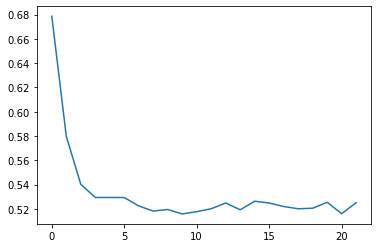

In [17]:
# plot losses
plt.plot(clf.history['loss'])

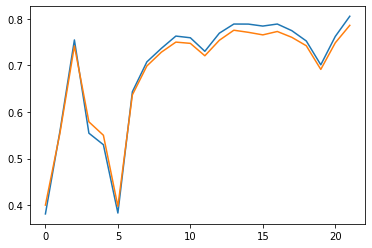

In [18]:

# plot auc
plt.plot(clf.history['train_auc'])
plt.plot(clf.history['valid_auc'])

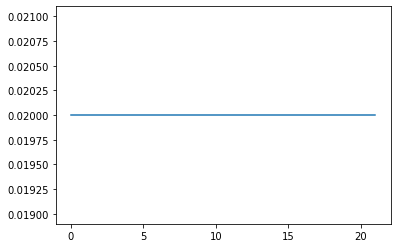

In [19]:
# plot learning rates
plt.plot(clf.history['lr'])

In [8]:

explain_matrix, masks = clf.explain(X_test)

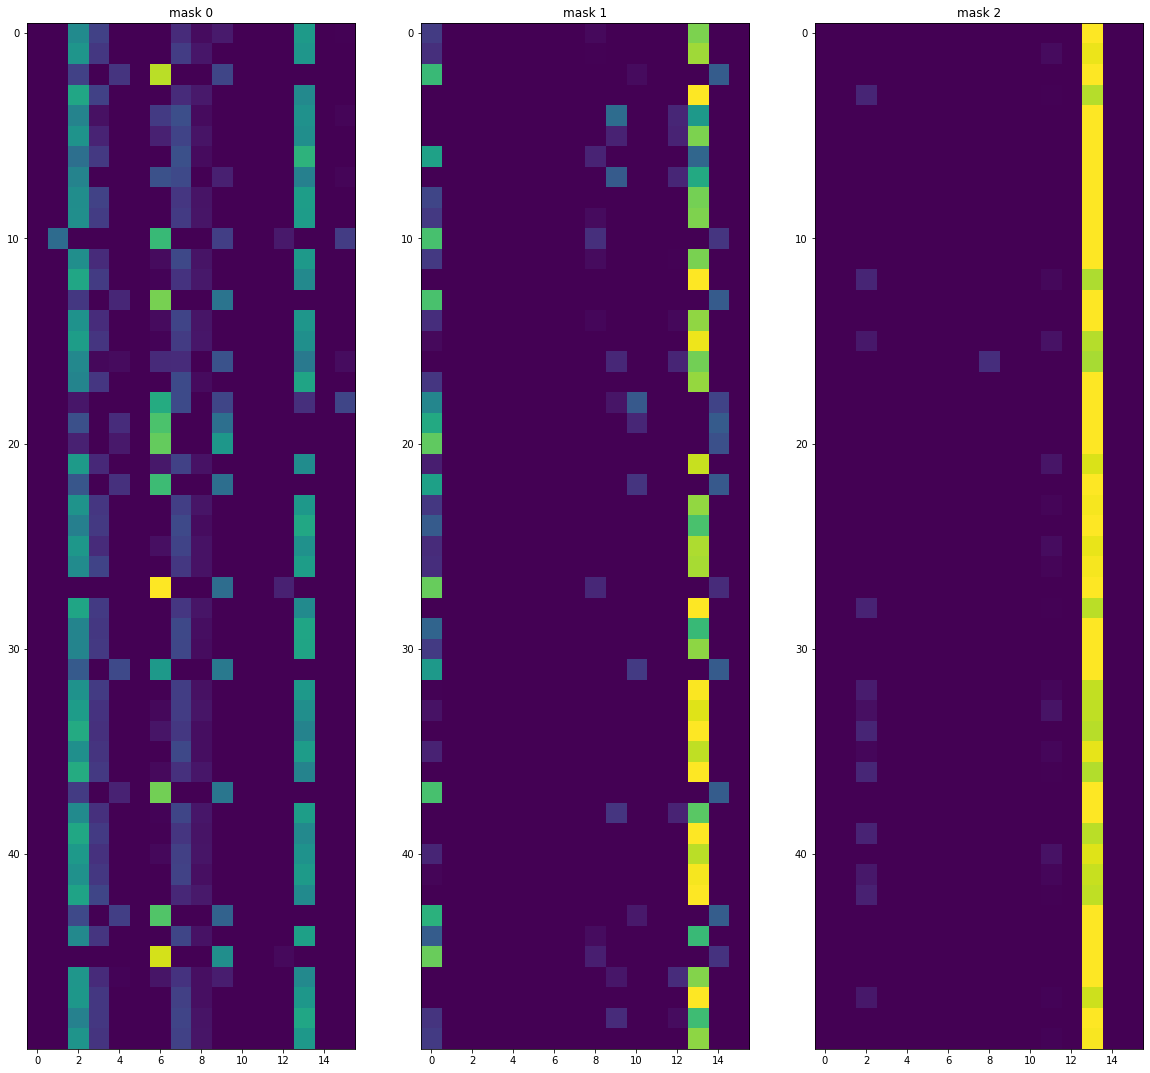

In [9]:

fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

<AxesSubplot:>

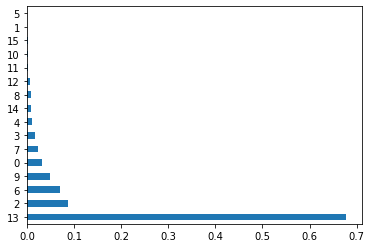

In [57]:
# find and plot feature importance
y_pred = clf.predict(X_test)
clf.feature_importances_
feat_importances = pd.Series(clf.feature_importances_)
feat_importances.nlargest(20).plot(kind='barh')

Text(0, 0.5, 'Predictoras')

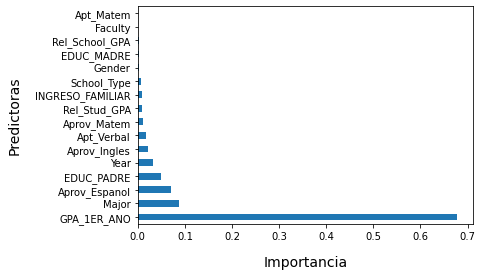

In [54]:
# find and plot feature importance
y_pred = clf.predict(X_test)
clf.feature_importances_
feat_importances = pd.Series(clf.feature_importances_, index=df.columns[1:17])
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel("Importancia", labelpad=14, size=14)
plt.ylabel("Predictoras", labelpad=14, size=14)

In [39]:
df.columns[1:16]

Index(['Year', 'Faculty', 'Major', 'Apt_Verbal', 'Aprov_Matem', 'Apt_Matem',
       'Aprov_Espanol', 'Aprov_Ingles', 'INGRESO_FAMILIAR', 'EDUC_PADRE',
       'EDUC_MADRE', 'Gender', 'School_Type', 'GPA_1ER_ANO', 'Rel_Stud_GPA'],
      dtype='object')

In [41]:
df.columns

Index(['GRAD', 'Year', 'Faculty', 'Major', 'Apt_Verbal', 'Aprov_Matem',
       'Apt_Matem', 'Aprov_Espanol', 'Aprov_Ingles', 'INGRESO_FAMILIAR',
       'EDUC_PADRE', 'EDUC_MADRE', 'Gender', 'School_Type', 'GPA_1ER_ANO',
       'Rel_Stud_GPA', 'Rel_School_GPA', 'Set'],
      dtype='object')

In [59]:
4.01969290e-06*100

0.00040196929